# Inverse loss paper

# Initial predictions

## Preprocess

In [1]:
import os
# file_path = "C:/Users/hgp/Documents/bezerkeley/research/isol-sys-database/src/paper/"
# dir_path = os.path.dirname(file_path)
# os.chdir(dir_path)

import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '../')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from doe import GP

plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=20
axis_font = 18
subt_font = 18
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
pd.options.mode.chained_assignment = None  

plt.close('all')

# main_obj = pd.read_pickle("../../data/loss/structural_db_complete_normloss.pickle")
# main_obj = pd.read_pickle("../../data/loss/structural_db_complete_spectracomments_loss.pickle")
main_obj = pd.read_pickle("../../data/loss/structural_db_complete_spectracomments_fixededp_loss.pickle")
    
main_obj.calculate_collapse()

df_raw = main_obj.ops_analysis
df_raw = df_raw.reset_index(drop=True)

# remove the singular outlier point
from scipy import stats
df = df_raw[np.abs(stats.zscore(df_raw['collapse_prob'])) < 5].copy()

# df = df.drop(columns=['index'])
# df = df_whole.head(100).copy()

df['max_isol_disp'] = pd.to_numeric(df['max_isol_disp'])
df['max_drift'] = df.PID.apply(max)
df['log_drift'] = np.log(df['max_drift'])

df['max_velo'] = df.PFV.apply(max)
df['max_accel'] = df.PFA.apply(max)

# df['T_ratio'] = df['T_m'] / df['T_fb']
df['T_ratio_e'] = df['T_m'] / df['T_fbe']
pi = 3.14159
g = 386.4

zetaRef = [0.02, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
BmRef   = [0.8, 1.0, 1.2, 1.5, 1.7, 1.9, 2.0]
df['Bm'] = np.interp(df['zeta_e'], zetaRef, BmRef)

df['gap_ratio'] = (df['constructed_moat']*4*pi**2)/ \
    (g*(df['sa_tm']/df['Bm'])*df['T_m']**2)

df['k2'] = (df['k_e']*df['D_m'] - df['Q'])/df['D_m']
df['k1'] = df['k_ratio'] * df['k2']

df['bldg_area'] = (df['num_bays']*df['L_bay'])**2 * (df['num_stories'] + 1)

df_loss = main_obj.loss_data

# max_obj = pd.read_pickle("../../data/loss/structural_db_complete_max_loss.pickle")
max_obj = pd.read_pickle("../../data/loss/structural_db_complete_spectracomments_max_loss.pickle")
df_loss_max = max_obj.max_loss

In [2]:
df

superstructure_system isolator_system num_frames       S_1       T_m  \
0                      CBF             LRB        2.0  0.860356  3.782431   
1                      CBF             LRB        2.0  0.854335  4.032884   
2                      CBF             LRB        2.0  1.098166  4.177145   
3                      CBF             TFP        2.0  1.107053  3.434884   
4                      CBF             TFP        2.0  1.077588  4.665556   
...                    ...             ...        ...       ...       ...   
1195                    MF             LRB        2.0  1.040371   3.36943   
1196                    MF             LRB        2.0  1.035533  4.483389   
1197                    MF             TFP        2.0  1.284698   3.13434   
1198                    MF             TFP        2.0   1.21879  4.135978   
1199                    MF             TFP        2.0  1.290003  3.083911   

        k_ratio moat_ampli        RI      L_bldg     h_bldg  ...  \
0     14.177556   0.558159  0.939242  169.075214    49.1329  ...   
1     10.100251   0.897928  0.673018  216.600909  74.899823  ...   
2     15.633385   0.705288  1.784974  165.355691  83.345644  ...   
3      7.537698   1.054592  1.125024  188.988397  95.302971  ...   
4     14.152593   1.116092  0.900503  126.268008  55.556545  ...   
...         ...        ...       ...         ...        ...  ...   
1195  11.632659   0.614068  0.856929  154.669271  41.343982  ...   
1196  10.880441   0.865514  2.125559  181.513276  78.104558  ...   
1197   8.831451   1.107742   1.18766   156.43828  56.710469  ...   
1198   6.347419    0.93787  1.890843  224.234529  77.111839  ...   
1199   9.139769   1.174307  2.033376   97.920487   86.96905  ...   

     collapse_prob log_collapse_prob log_drift max_velo   max_accel T_ratio_e  \
0     7.746441e-10        -20.978617 -7.022118  33.4046    0.181356    7.2792   
1     3.110685e-09        -19.588423 -6.896468  43.7502    0.194320  5.657143   
2     2.818290e-01         -1.266455 -4.018165  55.0901  110.326087  5.408282   
3     1.543937e-06        -13.381175 -6.266273  52.7303    1.433934  4.021834   
4     6.206188e-10        -21.200304 -7.041739  51.5557    0.359625  8.188305   
...            ...               ...       ...      ...         ...       ...   
1195  7.864900e-03         -4.845345 -3.154981  71.5817    3.265735  4.376637   
1196  4.690901e-05         -9.967301 -4.017762  58.6212    1.303709  3.500897   
1197  9.531833e-10        -20.771214 -4.752602  70.4581    1.349736  3.161764   
1198  6.149505e-08        -16.604309 -4.501794  59.2426    1.162847  3.262836   
1199  1.710137e-05        -10.976352 -4.100874  79.6489    0.731338  2.209653   

            Bm        k2        k1      bldg_area  
0     1.567263   0.00439  0.062235  142932.139248  
1     1.341431  0.004778  0.048258  281495.722589  
2     1.511392  0.003896  0.060911  191397.531611  
3     1.384655  0.006423  0.048413  285732.914302  
4     1.511959   0.00314  0.044445   79718.049451  
...        ...       ...       ...            ...  
1195  1.541119  0.005702   0.06633   95690.333411  
1196  1.443184  0.003573  0.038871  230629.485555  
1197  1.579043  0.006276  0.055425  122364.677689  
1198  1.405574  0.004323   0.02744  351967.867575  
1199  1.434708  0.007653  0.069945   67118.952249  

[1200 rows x 79 columns]

### Readjust for TFP

In [3]:
def wL_calc(num_stories, bldg_area):
    
    # in kip/ft^2
    LL_avg = (num_stories*50.0/1000 + 20.0/1000)/(num_stories + 1)
    W_L = LL_avg*bldg_area
    return W_L

def TFP_period_shift(W_D, W_L, bearing):
    # shift assumes that the load case is 1.0D + 0.5L
    if bearing == 'TFP':
        return (W_D/(W_D+0.5*W_L))**0.5
    else:
        return 1.0

df['W_L'] = df.apply(lambda x: wL_calc(x['num_stories'], x['bldg_area']), axis=1)
df['Tshift_coef'] = df.apply(
    lambda x: TFP_period_shift(x['W'], x['W_L'], x['isolator_system']), axis=1)

df['T_M_adj'] = pd.to_numeric(df['T_m'] * df['Tshift_coef'])

df['T_ratio'] = pd.to_numeric(df['T_M_adj']/df['T_fb'])

from gms import get_ST


df['sa_tm_adj'] = df.apply(
    lambda x: get_ST(x, x['T_M_adj'],
                      db_dir='../../resource/ground_motions/gm_db.csv',
                      spec_dir='../../resource/ground_motions/gm_spectra.csv'), 
    axis=1)

df['GR_OG'] = pd.to_numeric((df['constructed_moat']*4*pi**2)/ \
    (g*(df['sa_tm']/df['Bm'])*df['T_m']**2))
    
df['gap_ratio'] = pd.to_numeric((df['constructed_moat']*4*pi**2)/ \
    (g*(df['sa_tm_adj']/df['Bm'])*df['T_M_adj']**2))
    
df['GR_shift_coef'] = pd.to_numeric(df['gap_ratio'])/pd.to_numeric(df['GR_OG'])
# df['GR-Ad_coef'] = pd.to_numeric(df['GR_OG'])/pd.to_numeric(df['moat_ampli'])
df['sa_tm_shift'] = pd.to_numeric(df['sa_tm_adj']/df['sa_tm'])


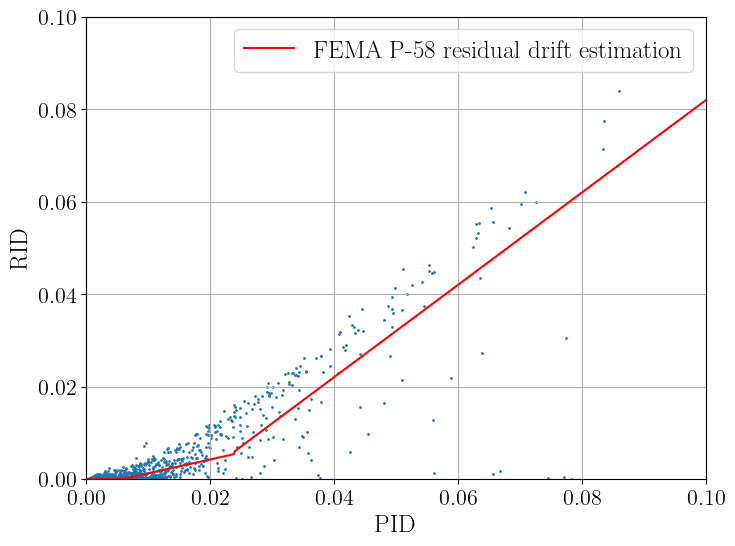

In [4]:
df_plot = df[df['run_status'] == 0]
peak_rid = df_plot['RID'].apply(lambda x: np.max(x))
peak_rid.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])

delta = np.linspace(0.0, 0.1, 500)
delta_y = 0.006
delta_r = np.where(
    delta <= delta_y, 0, np.where(
        delta <= 4*delta_y, 0.3*(delta - delta_y), delta - 3*delta_y))

fig = plt.figure(figsize=(8,6))
plt.scatter(df_plot['max_drift'], peak_rid, s=1)
plt.plot(delta, delta_r, color='red', label='FEMA P-58 residual drift estimation')
plt.legend(fontsize=18)
plt.xlabel('PID', fontsize=18)
plt.ylabel('RID', fontsize=18)
plt.xlim([0, 0.1])
plt.ylim([0, 0.1])
plt.grid()

In [5]:
bad_runs = df[df['run_status'] != 0]
peak_rid = bad_runs['RID'].apply(lambda x: np.max(x))
peak_rid.describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])


count    46.000000
mean      0.048436
std       0.031429
min       0.004972
10%       0.008275
25%       0.022452
50%       0.045394
75%       0.074122
90%       0.090702
max       0.121588
Name: RID, dtype: float64

## Main predictor function

In [6]:

def predict_DV(X, impact_pred_mdl, hit_loss_mdl, miss_loss_mdl,
               outcome='cost_50%', return_var=False):
    """Returns the expected value of the decision variable based on the total
    probability law (law of iterated expectation).
    
    E[cost] = sum_i sum_j E[cost|impact_j] Pr(impact_j) 
    
    Currently, this assumes that the models used are all GPC/GPR.
    
    Parameters
    ----------
    X: pd dataframe of design points
    impact_pred_mdl: classification model predicting impact
    hit_loss_mdl: regression model predicting outcome conditioned on yes impact
    miss_loss_mdl: regression model predicting outcome conditioned on no impact
    outcome: desired name for outcome variable
    
    Returns
    -------
    expected_DV_df: DataFrame of expected DV with single column name outcome+'_pred'
    """
        
    # get probability of impact
    if 'log_reg_kernel' in impact_pred_mdl.named_steps.keys():
        probs_imp = impact_pred_mdl.predict_proba(impact_pred_mdl.K_pr)
    else:
        probs_imp = impact_pred_mdl.predict_proba(X)

    miss_prob = probs_imp[:,0]
    hit_prob = probs_imp[:,1]
    
    hit_loss, hit_std = hit_loss_mdl.predict(X, return_std=True)
    miss_loss, miss_std = miss_loss_mdl.predict(X, return_std=True)
    
    # weight with probability of collapse
    # E[Loss] = (impact loss)*Pr(impact) + (no impact loss)*Pr(no impact)
    # run SVR_hit model on this dataset
    outcome_str = outcome+'_pred'
    expected_DV_hit = pd.DataFrame(
            {outcome_str:np.multiply(
                    hit_loss,
                    hit_prob)})
            
    
    # run miss model on this dataset
    expected_DV_miss = pd.DataFrame(
            {outcome_str:np.multiply(
                    miss_loss,
                    miss_prob)})
    
    expected_DV = expected_DV_hit + expected_DV_miss
    
    # tower variance
    # Var[cost] = E[cost^2] - E[cost]^2 = E[E(cost^2|imp)] - expected_DV^2
    # = (hit_cost^2 + var_hit_cost)*p(hit) + (miss_cost^2 + var_miss_cost)*p(miss) - expected_DV^2
    '''
    if return_var:
        expected_loss_sq = (hit_std**2 + hit_loss**2)*hit_prob + (miss_std**2 + miss_loss**2)*miss_prob
        total_var = expected_loss_sq - expected_DV**2
        return(expected_DV, total_var)
    '''
    
    if return_var:
        # get probability of impact
        gpc_obj = impact_pred_mdl._final_estimator
        base_estimator = gpc_obj.base_estimator_
        K_func = base_estimator.kernel_
        W_inv = np.diag(1/base_estimator.W_sr_**2)
        K_a = K_func(base_estimator.X_train_, base_estimator.X_train_)
        R_inv = np.linalg.inv(W_inv + K_a)
        
        # follow Eq. 3.24 to calculate latent variance
        gpc_scaler = impact_pred_mdl[0]
        X_scaled = gpc_scaler.transform(X)
        K_s = K_func(base_estimator.X_train_, X_scaled)
        k_ss = np.diagonal(K_func(X_scaled, X_scaled))
        var_f = k_ss - np.sum((R_inv @ K_s) * K_s, axis=0)
        
        # propagate uncertainty (Wikipedia example for f = ae^(bA)) and f = aA^b
        pi_ = base_estimator.pi_
        y_train_ = base_estimator.y_train_
        f_star = K_s.T.dot(y_train_ - pi_)
        gamma_ = (1 + np.exp(-f_star))
        prob_var = np.exp(-2*f_star)*var_f/(gamma_**4)
        
        # regression model variances
        hit_var = hit_std**2
        miss_var = miss_std**2
        
        # # for now, ignore correlation
        # # is there correlation? is probability of impact correlated with cost given that the building impacted
        # # propagate uncertainty (f = AB)
        
        # if miss_loss < 1e-8:
        #     miss_loss_min = 1e-3
        # else:
        #     miss_loss_min = miss_loss
            
        # impact_side_var = np.multiply(hit_loss, hit_prob)**2*(
        #     (hit_var/hit_loss**2) + (prob_var/hit_prob**2) + 0)
        
        # nonimpact_side_var = np.multiply(miss_loss_min, miss_prob)**2*(
        #     (miss_var/miss_loss_min**2) + (prob_var/miss_prob**2) + 0)
        
        # # propagate uncertainty (f = A + B)
        # total_var = impact_side_var + nonimpact_side_var + 0

        # for now, ignore correlation
        # is there correlation? is probability of impact correlated with cost given that the building impacted
        # propagate uncertainty (f = AB)
        
        # if miss_loss < 1e-8:
        #     miss_loss_min = 1e-3
        # else:
        #     miss_loss_min = miss_loss
        miss_loss_min = miss_loss
            
        impact_side_var = np.multiply(hit_loss, hit_prob)**2*(
            (hit_var/hit_loss**2) + (prob_var/hit_prob**2) + 0)
        
        nonimpact_side_var = np.multiply(miss_loss_min, miss_prob)**2*(
            (miss_var/miss_loss_min**2) + (prob_var/miss_prob**2) + 0)
        
        # # propagate uncertainty (f = A + B)
        # total_var = impact_side_var + nonimpact_side_var + 0

        # Law of Total Variance approach
        delta_term = (hit_loss - miss_loss_min)**2
        cross_p_term = np.multiply(hit_prob, miss_prob)
        total_var = (np.multiply(hit_prob, hit_var) + 
                     np.multiply(miss_prob, miss_var) + 
                     np.multiply(cross_p_term, delta_term))
        
        return(expected_DV, total_var)
    else:
        return(expected_DV)
    

### Other utility functions

In [7]:
# make a generalized 2D plotting grid, defaulted to gap and Ry
# grid is based on the bounds of input data
def make_2D_plotting_space(X, res, x_var='gap_ratio', y_var='RI', 
                           all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                           third_var_set = None, fourth_var_set = None,
                           x_bounds=None, y_bounds=None):
    if x_bounds == None:
        x_min = min(X[x_var])
        x_max = max(X[x_var])
    else:
        x_min = x_bounds[0]
        x_max = x_bounds[1]
    if y_bounds == None:
        y_min = min(X[y_var])
        y_max = max(X[y_var])
    else:
        y_min = y_bounds[0]
        y_max = y_bounds[1]
    xx, yy = np.meshgrid(np.linspace(x_min,
                                     x_max,
                                     res),
                         np.linspace(y_min,
                                     y_max,
                                     res))

    rem_vars = [i for i in all_vars if i not in [x_var, y_var]]
    third_var = rem_vars[0]
    fourth_var = rem_vars[-1]
       
    # xx = xx
    # yy = yy
    
    if third_var_set is None:
        third_var_val= X[third_var].median()
    else:
        third_var_val = third_var_set
    if fourth_var_set is None:
        fourth_var_val = X[fourth_var].median()
    else:
        fourth_var_val = fourth_var_set
    
    
    X_pl = pd.DataFrame({x_var:xx.ravel(),
                         y_var:yy.ravel(),
                         third_var:np.repeat(third_var_val,
                                             res*res),
                         fourth_var:np.repeat(fourth_var_val, 
                                              res*res)})
    X_plot = X_pl[all_vars]
                         
    return(X_plot)

def make_design_space(res, var_list=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                      fixed_var=None, bound_dict=None):
    
    if bound_dict is None:
        bound_dict = {
            'gap_ratio': (0.6, 2.0),
            'RI': (0.5, 2.25),
            'T_ratio': (2.0, 11.0),
            'zeta_e': (0.1, 0.25),
            'k_ratio': (5.0, 12.0)}
    
    fixed_val = {
        'gap_ratio': 1.0,
        'RI': 2.0,
        'T_ratio': 4.0,
        'zeta_e': 0.15,
        'k_ratio': 10.0
        }
    
    if fixed_var is None:
        xx, yy, uu, vv = np.meshgrid(np.linspace(*bound_dict[var_list[0]], res),
                                     np.linspace(*bound_dict[var_list[1]], res),
                                     np.linspace(*bound_dict[var_list[2]], res),
                                     np.linspace(*bound_dict[var_list[3]], res))
        
        X_space = pd.DataFrame({var_list[0]:xx.ravel(),
                             var_list[1]:yy.ravel(),
                             var_list[2]:uu.ravel(),
                             var_list[3]:vv.ravel()})
    else:
        fixed_val_single = fixed_val[fixed_var]
        excluded_idx = var_list.index(fixed_var)
        my_args = tuple(np.linspace(*bound_dict[var_list[i]], res) 
                                    for i in range(len(var_list)) 
                                    if i!=excluded_idx)
        
        xx, yy, uu, vv = np.meshgrid(*my_args,
                                     fixed_val_single)
        
        var_list.pop(excluded_idx)
        
        # TODO: this is unordered
        X_space = pd.DataFrame({var_list[0]:xx.ravel(),
                             var_list[1]:yy.ravel(),
                             var_list[2]:uu.ravel(),
                             fixed_var:vv.ravel()})
    return(X_space)

def moment_frame_cost(df, steel_per_unit=1.25):
    n_bays = df.num_bays
    
    # ft
    L_beam = df.L_bay
    h_story = df.h_story
    
    all_beams = df.beam
    all_cols = df.column
    
    # sum of per-length-weight of all floors
    col_wt = [float(member.split('X',1)[1]) for member in all_cols]
    beam_wt = [float(member.split('X',1)[1]) for member in all_beams] 
    
    # col_all_wt = np.array(list(map(sum, col_wt)))
    # beam_all_wt = np.array(list(map(sum, beam_wt)))
    
    # only 2 lateral frames
    n_frames = 4
    n_cols = 4*n_bays
    
    floor_col_length = np.array(n_cols*h_story, dtype=float)
    floor_beam_length = np.array(L_beam * n_bays * n_frames, dtype=float)
        
    floor_col_wt = col_wt*floor_col_length 
    floor_beam_wt = beam_wt*floor_beam_length
    
    bldg_wt = sum(floor_col_wt) + sum(floor_beam_wt)
    
    steel_cost = steel_per_unit*bldg_wt
    return(steel_cost)

def braced_frame_cost(df, brace_db, steel_per_unit=1.25):
    n_bays = df.num_bays
    
    # ft
    L_beam = df.L_bay
    h_story = df.h_story
    n_stories = df.num_stories
    
    from math import atan, cos
    theta = atan(h_story/(L_beam/2))
    L_brace = (L_beam/2)/cos(theta)
    
    all_beams = df.beam
    all_cols = df.column
    all_braces = df.brace
    
    n_braced = int(round(n_bays/2.25))
    n_braced = max(n_braced, 1)
    
    # sum of per-length-weight of all floors
    col_wt = [float(member.split('X',1)[1]) for member in all_cols]
    beam_wt = [float(member.split('X',1)[1]) for member in all_beams] 
    brace_wt = [brace_db.loc[brace_db['AISC_Manual_Label'] == brace_name]['W'].item() 
                    for brace_name in all_braces]
    
    # only 2 lateral frames
    n_frames = 4
    
    # in CBF, only count the big frames
    n_cols = 4*(n_braced+1)
    
    floor_col_length = np.array(n_cols*h_story, dtype=float)
    floor_beam_length = np.array(L_beam * n_braced * n_frames, dtype=float)
    floor_brace_length = np.array(L_brace * n_braced * n_frames, dtype=float)
    
    n_every_col = 4*n_bays
    full_frame_col_length = np.array(n_every_col*h_story, dtype=float)
    full_frame_beam_length = np.array(L_beam * n_bays * n_frames, dtype=float)
    grav_col_length = full_frame_col_length - floor_col_length
    grav_beam_length = full_frame_beam_length - floor_beam_length
    
    # assume W14x120 grav columns, W16x31 beams
    grav_col_wt = np.repeat(120.0, n_stories)*grav_col_length
    grav_beam_wt = np.repeat(31.0, n_stories)*grav_beam_length
    
    floor_col_wt = col_wt*floor_col_length 
    floor_beam_wt = beam_wt*floor_beam_length
    floor_brace_wt = brace_wt*floor_brace_length
    
    bldg_wt = (sum(floor_col_wt) + sum(floor_beam_wt) + sum(floor_brace_wt) +
               sum(grav_col_wt) + sum(grav_beam_wt))
    
    steel_cost = steel_per_unit*bldg_wt
    
    return(steel_cost)

# calc cost of existing db
def calc_steel_cost(df, brace_db, steel_per_unit=1.25):
    superstructure_system = df.superstructure_system
    
    if superstructure_system == 'MF':
        return moment_frame_cost(df, steel_per_unit=steel_per_unit)
    else:
        return braced_frame_cost(df, brace_db, steel_per_unit=steel_per_unit)

## Loss definitions

In [8]:

def loss_percentages(df_main, df_loss, df_max):
    df_main['bldg_area'] = df_main['L_bldg']**2 * (df_main['num_stories'] + 1)

    df_main['replacement_cost'] = 600.0*(df_main['bldg_area'])
    df_main['total_cmp_cost'] = df_max['cost_50%']
    df_main['cmp_replace_cost_ratio'] = df_main['total_cmp_cost']/df_main['replacement_cost']
    df_main['median_cost_ratio'] = df_loss['cost_50%']/df_main['replacement_cost']
    df_main['cmp_cost_ratio'] = df_loss['cost_50%']/df_main['total_cmp_cost']

    # but working in parallel (2x faster)
    df_main['replacement_time'] = df_main['bldg_area']/1000*365
    df_main['total_cmp_time'] = df_max['time_l_50%']
    df_main['cmp_replace_time_ratio'] = df_main['total_cmp_time']/df_main['replacement_time']
    df_main['median_time_ratio'] = df_loss['time_l_50%']/df_main['replacement_time']
    df_main['cmp_time_ratio'] = df_loss['time_l_50%']/df_main['total_cmp_time']

    df_main['replacement_freq'] = df_loss['replacement_freq']

    df_main[['B_50%', 'C_50%', 'D_50%', 'E_50%']] = df_loss[['B_50%', 'C_50%', 'D_50%', 'E_50%']]

    df_main['impacted'] = pd.to_numeric(df_main['impacted'])

    mask = df_loss['B_50%'].isnull()

    df_main['B_50%'].loc[mask] = df_max['B_50%'].loc[mask]
    df_main['C_50%'].loc[mask] = df_max['C_50%'].loc[mask]
    df_main['D_50%'].loc[mask] = df_max['D_50%'].loc[mask]
    df_main['E_50%'].loc[mask] = df_max['E_50%'].loc[mask]
    
    return(df_main)
    
df = loss_percentages(df, df_loss, df_loss_max)

cost_var = 'cmp_cost_ratio'
time_var = 'cmp_time_ratio'
repl_var= 'replacement_freq'
covariate_list = ['gap_ratio', 'RI', 'T_ratio', 'zeta_e']

db_string = '../../resource/'
brace_db = pd.read_csv(db_string+'braceShapes.csv', index_col=None, header=0)  

land_cost_per_sf = 2837/(3.28**2)

df['land_area'] = (df['L_bldg']*12 + df['constructed_moat'])**2
df['land_cost'] = land_cost_per_sf/144.0 * df['land_area']

df['steel_cost'] = df.apply(
       lambda row: calc_steel_cost(
           row, brace_db=brace_db,
           steel_per_unit=1.25),
       axis='columns', result_type='expand')

df['steel_cost_per_sf'] = df['steel_cost'] / df['bldg_area']

df['upfront_cost_per_sf'] = (df['steel_cost'] + df['land_cost'])/df['bldg_area']
df['upfront_cost_per_sm'] = df['upfront_cost_per_sf'] * 3.28**2
# df['upfront_cost_per_sf'] = df['steel_cost']/df['bldg_area'] + df['land_cost']/df['land_area']

df['system'] = df['superstructure_system'] +'-' + df['isolator_system']


## Subsetting

In [9]:

df_tfp = df[df['isolator_system'] == 'TFP']
df_lrb = df[df['isolator_system'] == 'LRB']

df_cbf = df[df['superstructure_system'] == 'CBF'].reset_index()
df_cbf['dummy_index'] = df_cbf['replacement_freq'] + df_cbf['index']*1e-9
df_mf = df[df['superstructure_system'] == 'MF'].reset_index()
df_mf['dummy_index'] = df_mf['replacement_freq'] + df_mf['index']*1e-9

df_mf_o = df_mf[df_mf['impacted'] == 0]
df_cbf_o = df_cbf[df_cbf['impacted'] == 0]
df_mf_i = df_mf[df_mf['impacted'] == 1]
df_cbf_i = df_cbf[df_cbf['impacted'] == 1]

df_tfp_o = df_tfp[df_tfp['impacted'] == 0]
df_lrb_o = df_lrb[df_lrb['impacted'] == 0]

df_mf_tfp = df_tfp[df_tfp['superstructure_system'] == 'MF']
df_mf_lrb = df_lrb[df_lrb['superstructure_system'] == 'MF']

df_cbf_tfp = df_tfp[df_tfp['superstructure_system'] == 'CBF']
df_cbf_lrb = df_lrb[df_lrb['superstructure_system'] == 'CBF']


df_mf_tfp_i = df_mf_tfp[df_mf_tfp['impacted'] == 1]
df_mf_tfp_o = df_mf_tfp[df_mf_tfp['impacted'] == 0]
df_mf_lrb_i = df_mf_lrb[df_mf_lrb['impacted'] == 1]
df_mf_lrb_o = df_mf_lrb[df_mf_lrb['impacted'] == 0]

df_cbf_tfp_i = df_cbf_tfp[df_cbf_tfp['impacted'] == 1]
df_cbf_tfp_o = df_cbf_tfp[df_cbf_tfp['impacted'] == 0]
df_cbf_lrb_i = df_cbf_lrb[df_cbf_lrb['impacted'] == 1]
df_cbf_lrb_o = df_cbf_lrb[df_cbf_lrb['impacted'] == 0]

## Impact classification

In [10]:
# for each system, make separate impact classification model

mdl_all = GP(df)
mdl_all.set_covariates(covariate_list)

mdl_impact_cbf_lrb = GP(df_cbf_lrb)
mdl_impact_cbf_lrb.set_covariates(covariate_list)
mdl_impact_cbf_lrb.set_outcome('impacted')
mdl_impact_cbf_lrb.test_train_split(0.2)

mdl_impact_cbf_tfp = GP(df_cbf_tfp)
mdl_impact_cbf_tfp.set_covariates(covariate_list)
mdl_impact_cbf_tfp.set_outcome('impacted')
mdl_impact_cbf_tfp.test_train_split(0.2)

mdl_impact_mf_lrb = GP(df_mf_lrb)
mdl_impact_mf_lrb.set_covariates(covariate_list)
mdl_impact_mf_lrb.set_outcome('impacted')
mdl_impact_mf_lrb.test_train_split(0.2)

mdl_impact_mf_tfp = GP(df_mf_tfp)
mdl_impact_mf_tfp.set_covariates(covariate_list)
mdl_impact_mf_tfp.set_outcome('impacted')
mdl_impact_mf_tfp.test_train_split(0.2)

print('======= impact classification per system ========')
import time
t0 = time.time()

mdl_impact_cbf_lrb.fit_gpc(kernel_name='rbf_iso')
mdl_impact_cbf_tfp.fit_gpc(kernel_name='rbf_iso')
mdl_impact_mf_lrb.fit_gpc(kernel_name='rbf_iso')
mdl_impact_mf_tfp.fit_gpc(kernel_name='rbf_iso')

tp = time.time() - t0

print("GPC training for impact done for 4 models in %.3f s" % tp)

# density estimation model to enable constructability 
print('======= Density estimation per system ========')

t0 = time.time()

# mdl_impact_mf_lrb.fit_kde()
# mdl_impact_cbf_lrb.fit_kde()
# mdl_impact_mf_tfp.fit_kde()
# mdl_impact_cbf_tfp.fit_kde()

mdl_impact_mf_lrb.fit_kde(bandwidth_range=np.logspace(-3,1,20))
mdl_impact_cbf_lrb.fit_kde(bandwidth_range=np.logspace(-3,1,20))
mdl_impact_mf_tfp.fit_kde(bandwidth_range=np.logspace(-3,1,20))
mdl_impact_cbf_tfp.fit_kde(bandwidth_range=np.logspace(-3,1,20))

tp = time.time() - t0

print("KDE training done for 4 models in %.3f s" % tp)


impact_classification_mdls = {'mdl_impact_cbf_lrb': mdl_impact_cbf_lrb,
                        'mdl_impact_cbf_tfp': mdl_impact_cbf_tfp,
                        'mdl_impact_mf_lrb': mdl_impact_mf_lrb,
                        'mdl_impact_mf_tfp': mdl_impact_mf_tfp}

======= impact classification per system ========
The GP training score is 0.762
The GP testing score is 0.767
The GP training score is 0.762
The GP testing score is 0.867
The GP training score is 0.767
The GP testing score is 0.833
The GP training score is 0.758
The GP testing score is 0.717
GPC training for impact done for 4 models in 0.414 s
======= Density estimation per system ========
KDE training done for 4 models in 1.273 s


## Regressions

In [11]:
#%% regression models: cost
# goal: E[cost|sys=sys, impact=impact]

mdl_cost_cbf_lrb_i = GP(df_cbf_lrb_i)
mdl_cost_cbf_lrb_i.set_covariates(covariate_list)
mdl_cost_cbf_lrb_i.set_outcome(cost_var)
mdl_cost_cbf_lrb_i.test_train_split(0.2)

mdl_cost_cbf_lrb_o = GP(df_cbf_lrb_o)
mdl_cost_cbf_lrb_o.set_covariates(covariate_list)
mdl_cost_cbf_lrb_o.set_outcome(cost_var)
mdl_cost_cbf_lrb_o.test_train_split(0.2)

mdl_cost_cbf_tfp_i = GP(df_cbf_tfp_i)
mdl_cost_cbf_tfp_i.set_covariates(covariate_list)
mdl_cost_cbf_tfp_i.set_outcome(cost_var)
mdl_cost_cbf_tfp_i.test_train_split(0.2)

mdl_cost_cbf_tfp_o = GP(df_cbf_tfp_o)
mdl_cost_cbf_tfp_o.set_covariates(covariate_list)
mdl_cost_cbf_tfp_o.set_outcome(cost_var)
mdl_cost_cbf_tfp_o.test_train_split(0.2)

mdl_cost_mf_lrb_i = GP(df_mf_lrb_i)
mdl_cost_mf_lrb_i.set_covariates(covariate_list)
mdl_cost_mf_lrb_i.set_outcome(cost_var)
mdl_cost_mf_lrb_i.test_train_split(0.2)

mdl_cost_mf_lrb_o = GP(df_mf_lrb_o)
mdl_cost_mf_lrb_o.set_covariates(covariate_list)
mdl_cost_mf_lrb_o.set_outcome(cost_var)
mdl_cost_mf_lrb_o.test_train_split(0.2)

mdl_cost_mf_tfp_i = GP(df_mf_tfp_i)
mdl_cost_mf_tfp_i.set_covariates(covariate_list)
mdl_cost_mf_tfp_i.set_outcome(cost_var)
mdl_cost_mf_tfp_i.test_train_split(0.2)

mdl_cost_mf_tfp_o = GP(df_mf_tfp_o)
mdl_cost_mf_tfp_o.set_covariates(covariate_list)
mdl_cost_mf_tfp_o.set_outcome(cost_var)
mdl_cost_mf_tfp_o.test_train_split(0.2)

print('======= cost regression per system per impact ========')
import time
t0 = time.time()

mdl_cost_cbf_lrb_i.fit_gpr(kernel_name='rbf_iso')
mdl_cost_cbf_lrb_o.fit_gpr(kernel_name='rbf_iso')
mdl_cost_cbf_tfp_i.fit_gpr(kernel_name='rbf_iso')
mdl_cost_cbf_tfp_o.fit_gpr(kernel_name='rbf_iso')
mdl_cost_mf_lrb_i.fit_gpr(kernel_name='rbf_iso')
mdl_cost_mf_lrb_o.fit_gpr(kernel_name='rbf_iso')
mdl_cost_mf_tfp_i.fit_gpr(kernel_name='rbf_iso')
mdl_cost_mf_tfp_o.fit_gpr(kernel_name='rbf_iso')

tp = time.time() - t0

print("GPR training for cost done for 8 models in %.3f s" % tp)

cost_regression_mdls = {'mdl_cost_cbf_lrb_i': mdl_cost_cbf_lrb_i,
                        'mdl_cost_cbf_lrb_o': mdl_cost_cbf_lrb_o,
                        'mdl_cost_cbf_tfp_i': mdl_cost_cbf_tfp_i,
                        'mdl_cost_cbf_tfp_o': mdl_cost_cbf_tfp_o,
                        'mdl_cost_mf_lrb_i': mdl_cost_mf_lrb_i,
                        'mdl_cost_mf_lrb_o': mdl_cost_mf_lrb_o,
                        'mdl_cost_mf_tfp_i': mdl_cost_mf_tfp_i,
                        'mdl_cost_mf_tfp_o': mdl_cost_mf_tfp_o}

#%% regression models: time
# goal: E[time|sys=sys, impact=impact]

mdl_time_cbf_lrb_i = GP(df_cbf_lrb_i)
mdl_time_cbf_lrb_i.set_covariates(covariate_list)
mdl_time_cbf_lrb_i.set_outcome(time_var)
mdl_time_cbf_lrb_i.test_train_split(0.2)

mdl_time_cbf_lrb_o = GP(df_cbf_lrb_o)
mdl_time_cbf_lrb_o.set_covariates(covariate_list)
mdl_time_cbf_lrb_o.set_outcome(time_var)
mdl_time_cbf_lrb_o.test_train_split(0.2)

mdl_time_cbf_tfp_i = GP(df_cbf_tfp_i)
mdl_time_cbf_tfp_i.set_covariates(covariate_list)
mdl_time_cbf_tfp_i.set_outcome(time_var)
mdl_time_cbf_tfp_i.test_train_split(0.2)

mdl_time_cbf_tfp_o = GP(df_cbf_tfp_o)
mdl_time_cbf_tfp_o.set_covariates(covariate_list)
mdl_time_cbf_tfp_o.set_outcome(time_var)
mdl_time_cbf_tfp_o.test_train_split(0.2)

mdl_time_mf_lrb_i = GP(df_mf_lrb_i)
mdl_time_mf_lrb_i.set_covariates(covariate_list)
mdl_time_mf_lrb_i.set_outcome(time_var)
mdl_time_mf_lrb_i.test_train_split(0.2)

mdl_time_mf_lrb_o = GP(df_mf_lrb_o)
mdl_time_mf_lrb_o.set_covariates(covariate_list)
mdl_time_mf_lrb_o.set_outcome(time_var)
mdl_time_mf_lrb_o.test_train_split(0.2)

mdl_time_mf_tfp_i = GP(df_mf_tfp_i)
mdl_time_mf_tfp_i.set_covariates(covariate_list)
mdl_time_mf_tfp_i.set_outcome(time_var)
mdl_time_mf_tfp_i.test_train_split(0.2)

mdl_time_mf_tfp_o = GP(df_mf_tfp_o)
mdl_time_mf_tfp_o.set_covariates(covariate_list)
mdl_time_mf_tfp_o.set_outcome(time_var)
mdl_time_mf_tfp_o.test_train_split(0.2)

print('======= downtime regression per system per impact ========')
import time
t0 = time.time()

mdl_time_cbf_lrb_i.fit_gpr(kernel_name='rbf_iso')
mdl_time_cbf_lrb_o.fit_gpr(kernel_name='rbf_iso')
mdl_time_cbf_tfp_i.fit_gpr(kernel_name='rbf_iso')
mdl_time_cbf_tfp_o.fit_gpr(kernel_name='rbf_iso')
mdl_time_mf_lrb_i.fit_gpr(kernel_name='rbf_iso')
mdl_time_mf_lrb_o.fit_gpr(kernel_name='rbf_iso')
mdl_time_mf_tfp_i.fit_gpr(kernel_name='rbf_iso')
mdl_time_mf_tfp_o.fit_gpr(kernel_name='rbf_iso')

tp = time.time() - t0

print("GPR training for time done for 8 models in %.3f s" % tp)

time_regression_mdls = {'mdl_time_cbf_lrb_i': mdl_time_cbf_lrb_i,
                        'mdl_time_cbf_lrb_o': mdl_time_cbf_lrb_o,
                        'mdl_time_cbf_tfp_i': mdl_time_cbf_tfp_i,
                        'mdl_time_cbf_tfp_o': mdl_time_cbf_tfp_o,
                        'mdl_time_mf_lrb_i': mdl_time_mf_lrb_i,
                        'mdl_time_mf_lrb_o': mdl_time_mf_lrb_o,
                        'mdl_time_mf_tfp_i': mdl_time_mf_tfp_i,
                        'mdl_time_mf_tfp_o': mdl_time_mf_tfp_o}

#%% regression models: repl
# goal: E[repl|sys=sys, impact=impact]

mdl_repl_cbf_lrb_i = GP(df_cbf_lrb_i)
mdl_repl_cbf_lrb_i.set_covariates(covariate_list)
mdl_repl_cbf_lrb_i.set_outcome('replacement_freq')
mdl_repl_cbf_lrb_i.test_train_split(0.2)

mdl_repl_cbf_lrb_o = GP(df_cbf_lrb_o)
mdl_repl_cbf_lrb_o.set_covariates(covariate_list)
mdl_repl_cbf_lrb_o.set_outcome('replacement_freq')
mdl_repl_cbf_lrb_o.test_train_split(0.2)

mdl_repl_cbf_tfp_i = GP(df_cbf_tfp_i)
mdl_repl_cbf_tfp_i.set_covariates(covariate_list)
mdl_repl_cbf_tfp_i.set_outcome('replacement_freq')
mdl_repl_cbf_tfp_i.test_train_split(0.2)

mdl_repl_cbf_tfp_o = GP(df_cbf_tfp_o)
mdl_repl_cbf_tfp_o.set_covariates(covariate_list)
mdl_repl_cbf_tfp_o.set_outcome('replacement_freq')
mdl_repl_cbf_tfp_o.test_train_split(0.2)

mdl_repl_mf_lrb_i = GP(df_mf_lrb_i)
mdl_repl_mf_lrb_i.set_covariates(covariate_list)
mdl_repl_mf_lrb_i.set_outcome('replacement_freq')
mdl_repl_mf_lrb_i.test_train_split(0.2)

mdl_repl_mf_lrb_o = GP(df_mf_lrb_o)
mdl_repl_mf_lrb_o.set_covariates(covariate_list)
mdl_repl_mf_lrb_o.set_outcome('replacement_freq')
mdl_repl_mf_lrb_o.test_train_split(0.2)

mdl_repl_mf_tfp_i = GP(df_mf_tfp_i)
mdl_repl_mf_tfp_i.set_covariates(covariate_list)
mdl_repl_mf_tfp_i.set_outcome('replacement_freq')
mdl_repl_mf_tfp_i.test_train_split(0.2)

mdl_repl_mf_tfp_o = GP(df_mf_tfp_o)
mdl_repl_mf_tfp_o.set_covariates(covariate_list)
mdl_repl_mf_tfp_o.set_outcome('replacement_freq')
mdl_repl_mf_tfp_o.test_train_split(0.2)

t0 = time.time()

print('======= replacement regression per system per impact ========')

mdl_repl_cbf_lrb_i.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_cbf_lrb_o.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_cbf_tfp_i.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_cbf_tfp_o.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_mf_lrb_i.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_mf_lrb_o.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_mf_tfp_i.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)
mdl_repl_mf_tfp_o.fit_gpr(kernel_name='rbf_iso', noise_bound=(1e-13, 1e2),
                         const_lower_bound=1e-10)

tp = time.time() - t0

print("GPR training for replacement done for 8 models in %.3f s" % tp)

repl_regression_mdls = {'mdl_repl_cbf_lrb_i': mdl_repl_cbf_lrb_i,
                        'mdl_repl_cbf_lrb_o': mdl_repl_cbf_lrb_o,
                        'mdl_repl_cbf_tfp_i': mdl_repl_cbf_tfp_i,
                        'mdl_repl_cbf_tfp_o': mdl_repl_cbf_tfp_o,
                        'mdl_repl_mf_lrb_i': mdl_repl_mf_lrb_i,
                        'mdl_repl_mf_lrb_o': mdl_repl_mf_lrb_o,
                        'mdl_repl_mf_tfp_i': mdl_repl_mf_tfp_i,
                        'mdl_repl_mf_tfp_o': mdl_repl_mf_tfp_o}

# moment frames that do not impact the wall do not have high replacement


======= cost regression per system per impact ========
GPR training for cost done for 8 models in 2.030 s
======= downtime regression per system per impact ========
GPR training for time done for 8 models in 1.990 s
======= replacement regression per system per impact ========
GPR training for replacement done for 8 models in 2.058 s


# Plots

## Collapse definitions

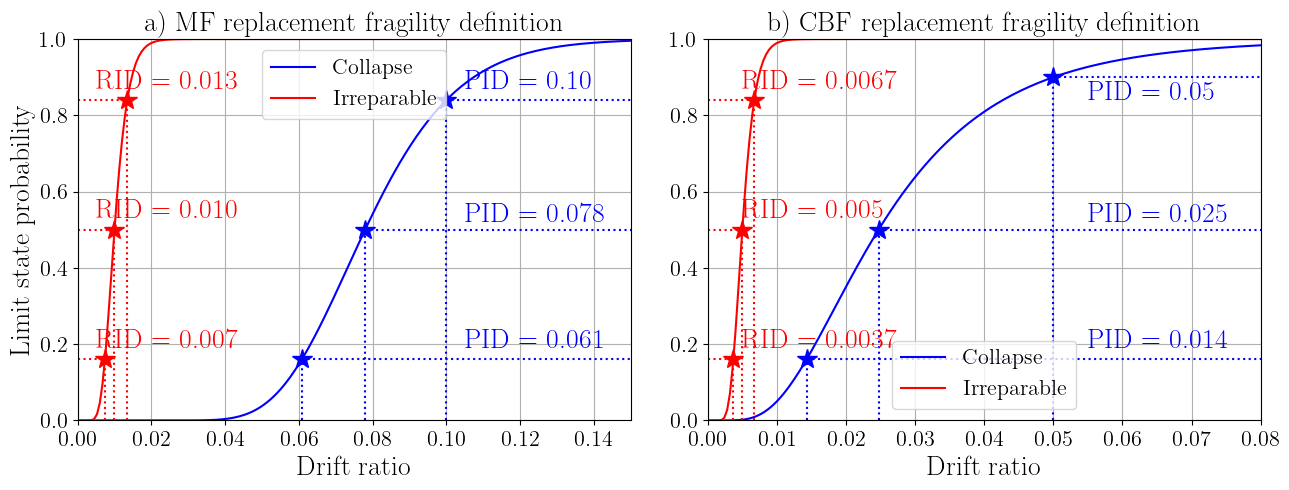

In [12]:

# TODO: definitions
import numpy as np
from scipy.stats import norm
inv_norm = norm.ppf(0.84)
# collapse as a probability
from scipy.stats import lognorm
from math import log, exp

plt.rcParams["text.usetex"] = True
x = np.linspace(0, 0.15, 200)
mu = log(0.1)- 0.25*inv_norm
sigma = 0.25

ln_dist = lognorm(s=sigma, scale=exp(mu))
p = ln_dist.cdf(np.array(x))

# plt.close('all')
fig = plt.figure(figsize=(13, 5))
ax = fig.add_subplot(1, 2, 1)
# ax = plt.subplots(1, 1, figsize=(8,6))

ax.plot(x, p, label='Collapse', color='blue')

mu_irr = log(0.01)
ln_dist_irr = lognorm(s=0.3, scale=exp(mu_irr))
p_irr = ln_dist_irr.cdf(np.array(x))

ax.plot(x, p_irr, color='red', label='Irreparable')

axis_font = 20
subt_font = 18
xleft = 0.15
ax.set_ylim([0,1])
ax.set_xlim([0, xleft])
ax.set_ylabel('Limit state probability', fontsize=axis_font)
ax.set_xlabel('Drift ratio', fontsize=axis_font)

ax.vlines(x=exp(mu), ymin=0, ymax=0.5, color='blue', linestyle=":")
ax.hlines(y=0.5, xmin=exp(mu), xmax=0.15, color='blue', linestyle=":")
ax.text(0.105, 0.52, r'PID = 0.078', fontsize=axis_font, color='blue')
ax.plot([exp(mu)], [0.5], marker='*', markersize=15, color="blue", linestyle=":")

ax.vlines(x=0.1, ymin=0, ymax=0.84, color='blue', linestyle=":")
ax.hlines(y=0.84, xmin=0.1, xmax=xleft, color='blue', linestyle=":")
ax.text(0.105, 0.87, r'PID = 0.10', fontsize=axis_font, color='blue')
ax.plot([0.10], [0.84], marker='*', markersize=15, color="blue", linestyle=":")

lower= ln_dist.ppf(0.16)
ax.vlines(x=lower, ymin=0, ymax=0.16, color='blue', linestyle=":")
ax.hlines(y=0.16, xmin=lower, xmax=xleft, color='blue', linestyle=":")
ax.text(0.105, 0.19, r'PID = 0.061', fontsize=axis_font, color='blue')
ax.plot([lower], [0.16], marker='*', markersize=15, color="blue", linestyle=":")


ax.hlines(y=0.5, xmin=0.0, xmax=exp(mu_irr), color='red', linestyle=":")
lower = ln_dist_irr.ppf(0.16)
ax.hlines(y=0.16, xmin=0.0, xmax=lower, color='red', linestyle=":")
upper = ln_dist_irr.ppf(0.84)
ax.hlines(y=0.84, xmin=0.0, xmax=upper, color='red', linestyle=":")
ax.plot([lower], [0.16], marker='*', markersize=15, color="red", linestyle=":")
ax.plot([0.01], [0.5], marker='*', markersize=15, color="red", linestyle=":")
ax.plot([upper], [0.84], marker='*', markersize=15, color="red", linestyle=":")
ax.vlines(x=upper, ymin=0, ymax=0.84, color='red', linestyle=":")
ax.vlines(x=0.01, ymin=0, ymax=0.5, color='red', linestyle=":")
ax.vlines(x=lower, ymin=0, ymax=0.16, color='red', linestyle=":")

ax.text(0.005, 0.19, r'RID = 0.007', fontsize=axis_font, color='red')
ax.text(0.005, 0.87, r'RID = 0.013', fontsize=axis_font, color='red')
ax.text(0.005, 0.53, r'RID = 0.010', fontsize=axis_font, color='red')

ax.set_title('a) MF replacement fragility definition', fontsize=axis_font)
ax.grid()
label_size = 16
clabel_size = 12

ax.legend(fontsize=label_size, loc='upper center')

# cbf
inv_norm = norm.ppf(0.9)
# collapse as a probability

x = np.linspace(0, 0.08, 200)
mu = log(0.05)- 0.55*inv_norm
sigma = 0.55

ln_dist = lognorm(s=sigma, scale=exp(mu))
p = ln_dist.cdf(np.array(x))

# plt.close('all')
ax = fig.add_subplot(1, 2, 2)

ax.plot(x, p, label='Collapse', color='blue')

mu_irr = log(0.005)
ln_dist_irr = lognorm(s=0.3, scale=exp(mu_irr))
p_irr = ln_dist_irr.cdf(np.array(x))

ax.plot(x, p_irr, color='red', label='Irreparable')

axis_font = 20
subt_font = 18
xleft = 0.08
ax.set_ylim([0,1])
ax.set_xlim([0, xleft])
# ax.set_ylabel('Limit state probability', fontsize=axis_font)
ax.set_xlabel('Drift ratio', fontsize=axis_font)

ax.vlines(x=exp(mu), ymin=0, ymax=0.5, color='blue', linestyle=":")
ax.hlines(y=0.5, xmin=exp(mu), xmax=0.15, color='blue', linestyle=":")
ax.text(0.055, 0.52, r'PID = 0.025', fontsize=axis_font, color='blue')
ax.plot([exp(mu)], [0.5], marker='*', markersize=15, color="blue", linestyle=":")

ax.vlines(x=0.05, ymin=0, ymax=0.9, color='blue', linestyle=":")
ax.hlines(y=0.9, xmin=0.05, xmax=xleft, color='blue', linestyle=":")
ax.text(0.055, 0.84, r'PID = 0.05', fontsize=axis_font, color='blue')
ax.plot([0.05], [0.9], marker='*', markersize=15, color="blue", linestyle=":")

lower= ln_dist.ppf(0.16)
ax.vlines(x=lower, ymin=0, ymax=0.16, color='blue', linestyle=":")
ax.hlines(y=0.16, xmin=lower, xmax=xleft, color='blue', linestyle=":")
ax.text(0.055, 0.19, r'PID = 0.014', fontsize=axis_font, color='blue')
ax.plot([lower], [0.16], marker='*', markersize=15, color="blue", linestyle=":")


ax.hlines(y=0.5, xmin=0.0, xmax=exp(mu_irr), color='red', linestyle=":")
lower = ln_dist_irr.ppf(0.16)
ax.hlines(y=0.16, xmin=0.0, xmax=lower, color='red', linestyle=":")
upper = ln_dist_irr.ppf(0.84)
ax.hlines(y=0.84, xmin=0.0, xmax=upper, color='red', linestyle=":")
ax.plot([lower], [0.16], marker='*', markersize=15, color="red", linestyle=":")
ax.plot([0.005], [0.5], marker='*', markersize=15, color="red", linestyle=":")
ax.plot([upper], [0.84], marker='*', markersize=15, color="red", linestyle=":")
ax.vlines(x=upper, ymin=0, ymax=0.84, color='red', linestyle=":")
ax.vlines(x=0.005, ymin=0, ymax=0.5, color='red', linestyle=":")
ax.vlines(x=lower, ymin=0, ymax=0.16, color='red', linestyle=":")

ax.text(0.005, 0.19, r'RID = 0.0037', fontsize=axis_font, color='red')
ax.text(0.005, 0.87, r'RID = 0.0067', fontsize=axis_font, color='red')
ax.text(0.005, 0.53, r'RID = 0.005', fontsize=axis_font, color='red')

ax.set_title('b) CBF replacement fragility definition', fontsize=axis_font)
ax.grid()
label_size = 16
clabel_size = 12

ax.legend(fontsize=label_size, loc='lower center')
fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_3_replacement_def_jse.pdf')

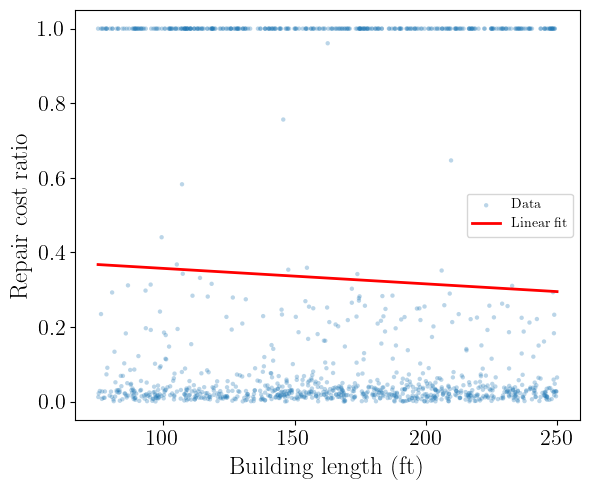

In [13]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# Example: assuming df['L_bldg'] and df[cost_var] exist
X = df['L_bldg'].values.reshape(-1, 1)
y = df[cost_var].values

# --- Fit linear regression (no intercept) ---
model = LinearRegression(fit_intercept=True)
model.fit(X, y)

# Predicted line
x_fit = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_fit = model.predict(x_fit)

# --- Plot ---
plt.figure(figsize=(6, 5))

# Scatter plot with alpha to handle dense points
plt.scatter(X, y, s=10, alpha=0.3, edgecolors='none', color='tab:blue', label='Data')
# Regression line
plt.plot(x_fit, y_fit, color='red', linewidth=2, label='Linear fit')

# Labels
plt.xlabel('Building length (ft)', fontsize=18)
plt.ylabel('Repair cost ratio', fontsize=18)
# plt.title('Linear Regression (no intercept)')
plt.legend()
plt.tight_layout()
plt.show()

## Impact difference

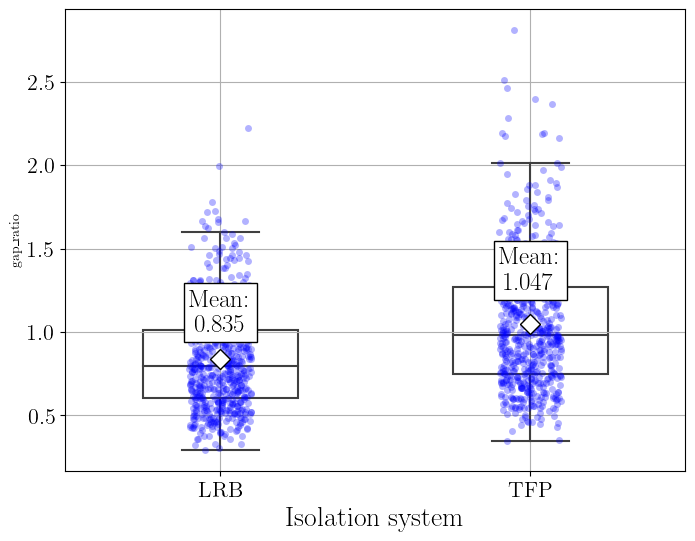

In [14]:
# plt.figure(figsize=(8,6))
# plt.scatter(df['gap_ratio'], df['T_ratio'])
# # plt.xlim([0.5,2.0])
# # plt.ylim([0.5, 2.25])
# plt.xlabel('$GR$', fontsize=axis_font)
# plt.ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# plt.grid(True)
# # plt.title('Collapse risk using full 400 points', fontsize=axis_font)
# plt.show()

from scipy import stats
# df_test = df[np.abs(stats.zscore(df['max_isol_disp'])) < 1.].copy()
# df_test = df[df['impacted'] == 0]
df_test = df.copy()
df_tfp_test = df_test[df_test['isolator_system'] == 'TFP']
df_lrb_test = df_test[df_test['isolator_system'] == 'LRB']
# df_test = df.copy()
plt.close('all')
fig = plt.figure(figsize=(8,6))
import seaborn as sns
my_var = 'gap_ratio'
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=10,
                      markerfacecolor='white', zorder=20)
ax = fig.add_subplot(1, 1, 1)
bx = sns.boxplot(y=my_var, x= "isolator_system", data=df_test,  showfliers=False,
            boxprops={'facecolor': 'none'},showmeans=True, meanprops=meanpointprops,
            width=0.5, ax=ax)
sp = sns.stripplot(x='isolator_system', y=my_var, data=df_test, ax=ax, jitter=True,
              alpha=0.3, s=5, color='blue')

val = df_tfp_test[my_var].mean()
ax.text(1, val*1.2, f'Mean: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
# ax.annotate("", (0, val),(0.25, 0.45),  arrowprops={'arrowstyle':'->'})

val = df_lrb_test[my_var].mean()
ax.text(0, val*1.2, f'Mean: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
# ax.annotate("", (1, val),(0.85, 0.45),  arrowprops={'arrowstyle':'->'})
# ax.set_zlim([-0.05, 0.2])
# ax.set_ylim([0, 40.])
ax.grid('True', zorder=0)
plt.xlabel('Isolation system', fontsize=axis_font)
# plt.ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
plt.show()

In [15]:

# import numpy as np
# import statsmodels.api as sm
# my_var = 'k2'
# var_array = df_tfp_test[my_var]
# var_array_2 = df_lrb_test[my_var]
# # plt.close('all')
# fig = plt.figure(figsize=(10,6))
# ax = fig.add_subplot(1, 2, 1)
# sm.qqplot(var_array, line='45', loc=np.mean(var_array), scale=np.std(var_array), ax=ax)
# ax.set_title('TFPs')
# # plt.show()
# ax = fig.add_subplot(1, 2, 2)
# sm.qqplot(var_array_2, line='45', loc=np.mean(var_array), scale=np.std(var_array), ax=ax)
# ax.set_title('LRBs')
# plt.show()


## EDP results

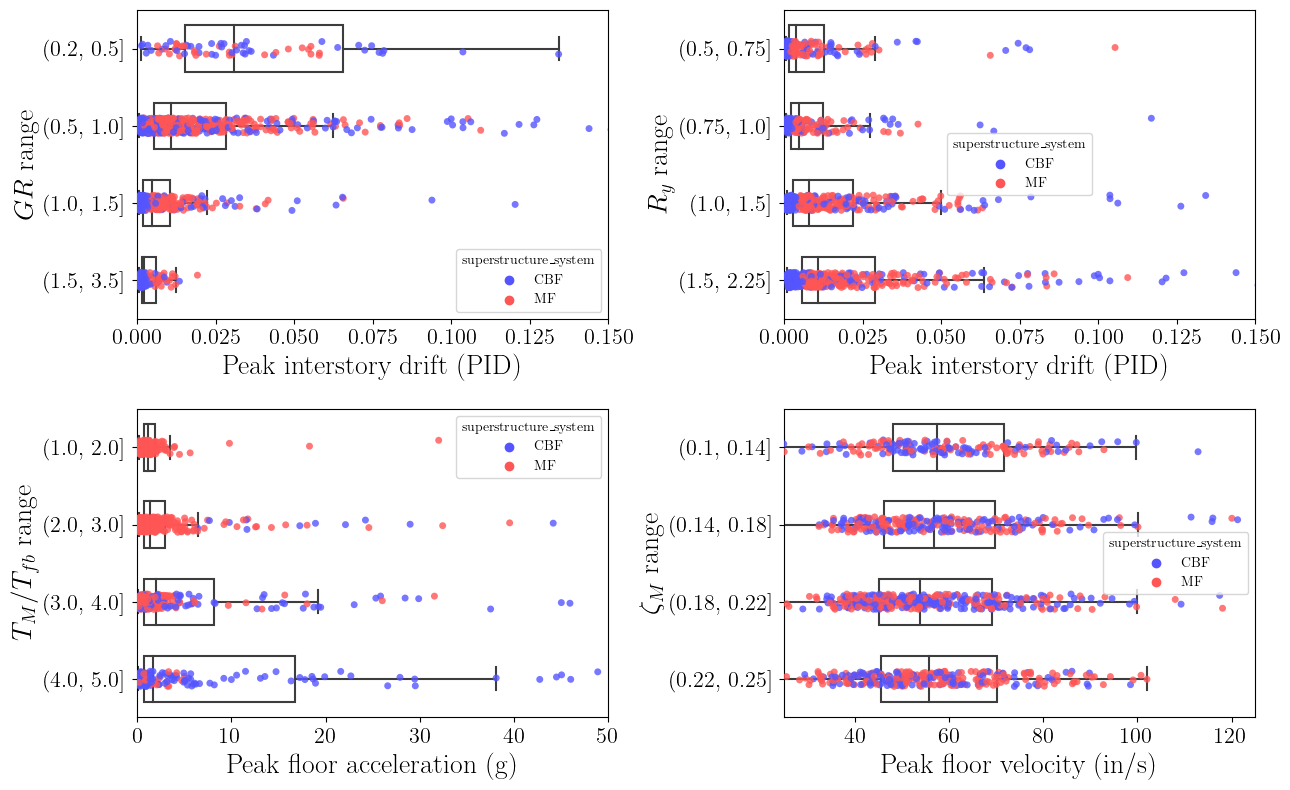

In [16]:

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 20
subt_font = 18
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# plt.close('all')
fig = plt.figure(figsize=(13, 8))

bins = pd.IntervalIndex.from_tuples([(0.2, 0.5), (0.5, 1.0), (1.0, 1.5), (1.5, 3.5)])
labels=['tiny', 'small', 'okay', 'large']
df['bin'] = pd.cut(df['gap_ratio'], bins=bins, labels=labels)


ax = fig.add_subplot(2, 2, 1)
import seaborn as sns
sns.stripplot(data=df, x="max_drift", y="bin", orient="h", alpha=0.8, size=5,
              hue='superstructure_system', ax=ax, legend='brief', palette='seismic')
sns.boxplot(y="bin", x= "max_drift", data=df,  showfliers=False,
            boxprops={'facecolor': 'none'}, meanprops={'color': 'black'},
            width=0.6, ax=ax)

ax.set_ylabel('$GR$ range', fontsize=axis_font)
ax.set_xlabel('Peak interstory drift (PID)', fontsize=axis_font)
plt.xlim([0.0, 0.15])

#####
bins = pd.IntervalIndex.from_tuples([(0.5, 0.75), (0.75, 1.0), (1.0, 1.5), (1.5, 2.25)])
labels=['tiny', 'small', 'okay', 'large']
df['bin'] = pd.cut(df['RI'], bins=bins, labels=labels)


ax = fig.add_subplot(2, 2, 2)
import seaborn as sns
sns.stripplot(data=df, x="max_drift", y="bin", orient="h", size=5, alpha=0.8,
              hue='superstructure_system', ax=ax, legend='brief', palette='seismic')
sns.boxplot(y="bin", x= "max_drift", data=df,  showfliers=False,
            boxprops={'facecolor': 'none'}, meanprops={'color': 'black'},
            width=0.6, ax=ax)


ax.set_ylabel('$R_y$ range', fontsize=axis_font)
ax.set_xlabel('Peak interstory drift (PID)', fontsize=axis_font)
plt.xlim([0.0, 0.15])



#####
bins = pd.IntervalIndex.from_tuples([(1.0, 2.0), (2.0, 3.0), (3.0, 4.0), (4.0, 5.0)])
labels=['tiny', 'small', 'okay', 'large']
df['bin'] = pd.cut(df['T_ratio'], bins=bins, labels=labels)


ax = fig.add_subplot(2, 2, 3)
import seaborn as sns
sns.stripplot(data=df, x="max_accel", y="bin", orient="h", size=5, alpha=0.8,
              hue='superstructure_system', ax=ax, legend='brief', palette='seismic')
sns.boxplot(y="bin", x= "max_accel", data=df,  showfliers=False,
            boxprops={'facecolor': 'none'}, meanprops={'color': 'black'},
            width=0.6, ax=ax)


ax.set_ylabel('$T_M/T_{fb}$ range', fontsize=axis_font)
ax.set_xlabel('Peak floor acceleration (g)', fontsize=axis_font)
plt.xlim([0.0, 50.0])

#####
bins = pd.IntervalIndex.from_tuples([(0.1, 0.14), (0.14, 0.18), (0.18, 0.22), (0.22, 0.25)])
labels=['tiny', 'small', 'okay', 'large']
df['bin'] = pd.cut(df['zeta_e'], bins=bins, labels=labels)


ax = fig.add_subplot(2, 2, 4)
import seaborn as sns
sns.stripplot(data=df, x="max_velo", y="bin", orient="h", size=5, alpha=0.8,
              hue='superstructure_system', ax=ax, legend='brief', palette='seismic')
sns.boxplot(y="bin", x= "max_velo", data=df,  showfliers=False,
            boxprops={'facecolor': 'none'}, meanprops={'color': 'black'},
            width=0.6, ax=ax)


ax.set_ylabel('$\zeta_M$ range', fontsize=axis_font)
ax.set_xlabel('Peak floor velocity (in/s)', fontsize=axis_font)
plt.xlim([25, 125.0])
fig.tight_layout(h_pad=2.0)
plt.show()

## Scatterhist

(0.1, 0.25)

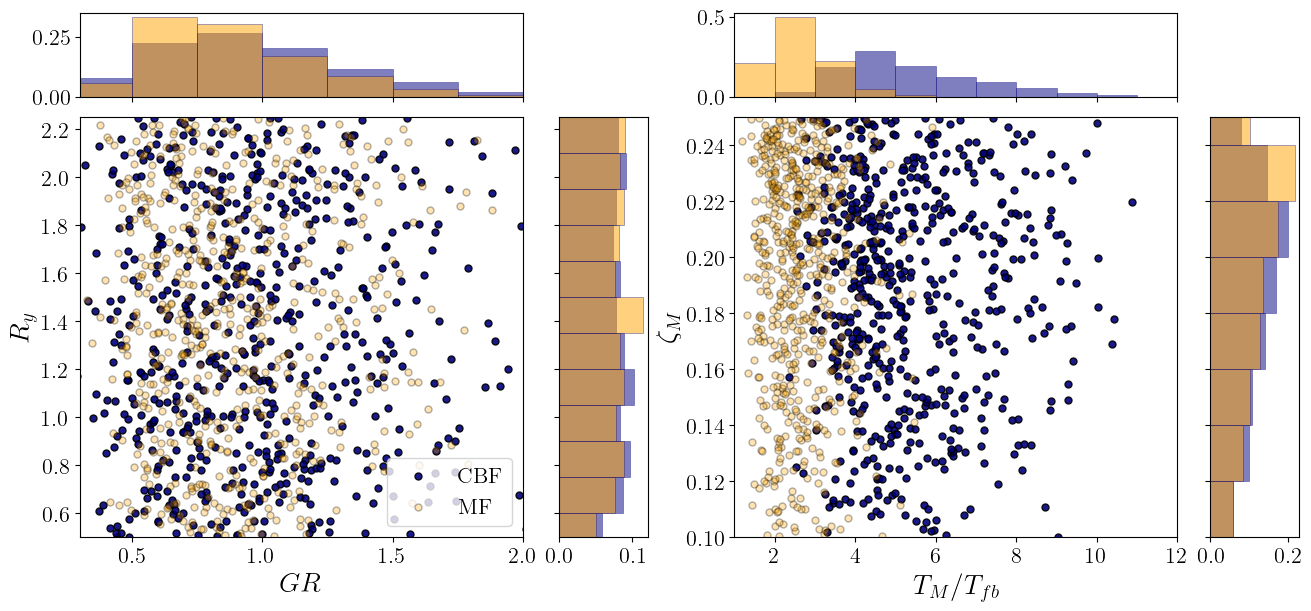

In [17]:
# TODO: scatterhist

def scatter_hist(x, y, c, alpha, ax, ax_histx, ax_histy, label=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha=alpha, edgecolors='black', s=25, facecolors=c,
               label=label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    if y.name == 'zeta_e':
        binwidth = 0.02
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    elif y.name == 'RI':
        binwidth = 0.15
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    elif y.name=='T_ratio' or y.name=='T_ratio_e' or 'k_ratio':
        binwidth = 1.0
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    if x.name == 'Q':
        binwidth = 0.01
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_x = np.arange(-lim, lim + binwidth, binwidth)
    elif x.name == 'T_ratio' or x.name=='T_ratio_e':
        binwidth = 1.0
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_x = np.arange(-lim, lim + binwidth, binwidth)
    else:
        bin_x = bins
    ax_histx.hist(x, bins=bin_x, alpha = 0.5, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='navy', linewidth=0.5)
    ax_histy.hist(y, bins=bin_y, orientation='horizontal', alpha = 0.5, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='navy', linewidth=0.5)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 20
subt_font = 18
import matplotlib as mpl
label_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# plt.close('all')
# Start with a square Figure.
fig = plt.figure(figsize=(13, 6), layout='constrained')

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 4,  width_ratios=(5, 1, 5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0., hspace=0.)
# # Create the Axes.
# fig = plt.figure(figsize=(13, 10))
# ax1=fig.add_subplot(2, 2, 1)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(df_cbf['gap_ratio'], df_cbf['RI'], 'navy', 0.9, ax, ax_histx, ax_histy,
             label='CBF')
scatter_hist(df_mf['gap_ratio'], df_mf['RI'], 'orange', 0.3, ax, ax_histx, ax_histy,
             label='MF')
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_xlim([0.3, 2.0])
ax.set_ylim([0.5, 2.25])
ax.legend(fontsize=label_size)

ax = fig.add_subplot(gs[1, 2])
ax_histx = fig.add_subplot(gs[0, 2], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 3], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(df_cbf['T_ratio'], df_cbf['zeta_e'], 'navy', 0.9, ax, ax_histx, ax_histy)
scatter_hist(df_mf['T_ratio'], df_mf['zeta_e'], 'orange', 0.3, ax, ax_histx, ax_histy)

ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)
ax.set_xlim([1.0, 12.0])
ax.set_ylim([0.1, 0.25])

# plt.savefig('./eng_struc_figures/spectracomments/input_scatterhist.pdf')

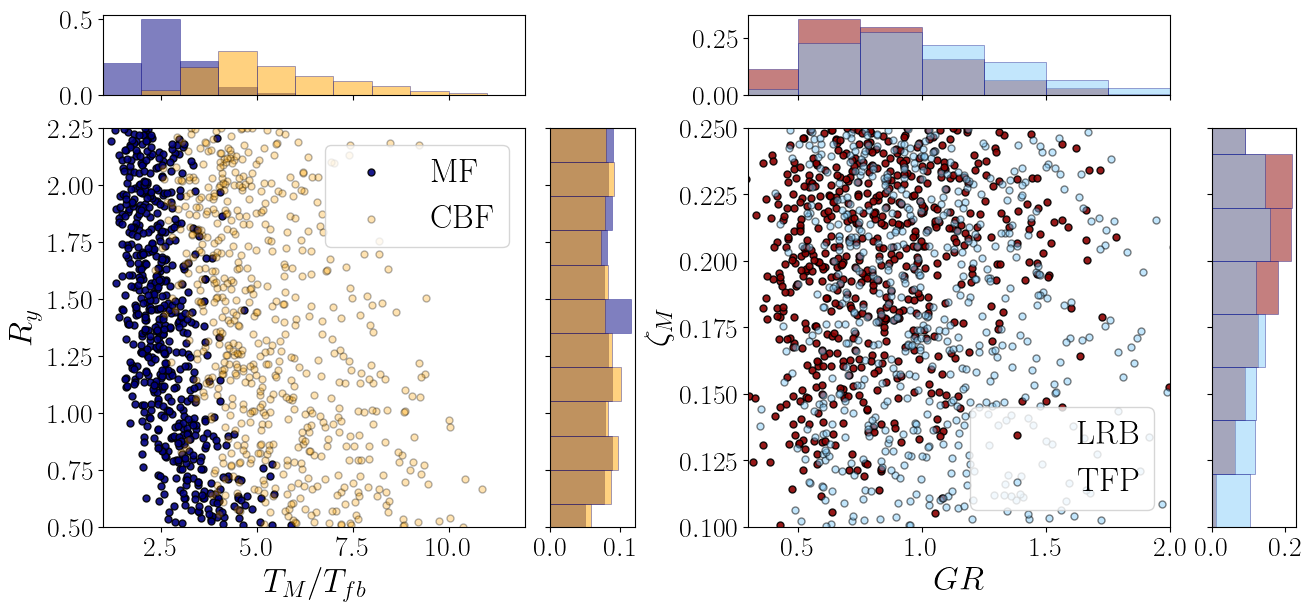

In [18]:

def scatter_hist(x, y, c, alpha, ax, ax_histx, ax_histy, label=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    ax.scatter(x, y, alpha=alpha, edgecolors='black', s=25, facecolors=c,
                label=label)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    lim = (int(xymax/binwidth) + 1) * binwidth

    bins = np.arange(-lim, lim + binwidth, binwidth)
    
    if y.name == 'zeta_e':
        binwidth = 0.02
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    elif y.name == 'RI':
        binwidth = 0.15
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    elif y.name=='T_ratio' or y.name=='T_ratio_e' or 'k_ratio':
        binwidth = 1.0
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_y = np.arange(-lim, lim + binwidth, binwidth)
        
    if x.name == 'Q':
        binwidth = 0.01
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_x = np.arange(-lim, lim + binwidth, binwidth)
    elif x.name == 'T_ratio' or x.name=='T_ratio_e':
        binwidth = 1.0
        xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
        lim = (int(xymax/binwidth) + 1) * binwidth
        
        bin_x = np.arange(-lim, lim + binwidth, binwidth)
    else:
        bin_x = bins
    ax_histx.hist(x, bins=bin_x, alpha = 0.5, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='navy', linewidth=0.5)
    ax_histy.hist(y, bins=bin_y, orientation='horizontal', alpha = 0.5, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='navy', linewidth=0.5)

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 22
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# plt.close('all')
# Start with a square Figure.
fig = plt.figure(figsize=(13, 6), layout='constrained')

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 4,  width_ratios=(5, 1, 5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0., hspace=0.)
# # Create the Axes.
# fig = plt.figure(figsize=(13, 10))
# ax1=fig.add_subplot(2, 2, 1)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(df_mf['T_ratio'], df_mf['RI'], 'navy', 0.9, ax, ax_histx, ax_histy,
             label='MF')
scatter_hist(df_cbf['T_ratio'], df_cbf['RI'], 'orange', 0.3, ax, ax_histx, ax_histy,
             label='CBF')
ax.legend(fontsize=axis_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_xlim([1.0, 12.0])
ax.set_ylim([0.5, 2.25])

ax = fig.add_subplot(gs[1, 2])
ax_histx = fig.add_subplot(gs[0, 2], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 3], sharey=ax)
# Draw the scatter plot and marginals.
scatter_hist(df_lrb['gap_ratio'], df_lrb['zeta_e'], 'darkred', 0.9, ax, ax_histx, ax_histy,
              label='LRB')
scatter_hist(df_tfp['gap_ratio'], df_tfp['zeta_e'], 'lightskyblue', 0.5, ax, ax_histx, ax_histy,
              label='TFP')
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)
ax.set_xlim([0.3, 2.0])
ax.set_ylim([0.1, 0.25])

ax.legend(fontsize=axis_font)

plt.savefig('./eng_struc_figures/spectracomments/fig_5_input_scatterhist_mix_spectracomments.pdf')

## Non impact DVs

c:\Users\giraf\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\giraf\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\giraf\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\giraf\anaconda3\envs\sklearn_env\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


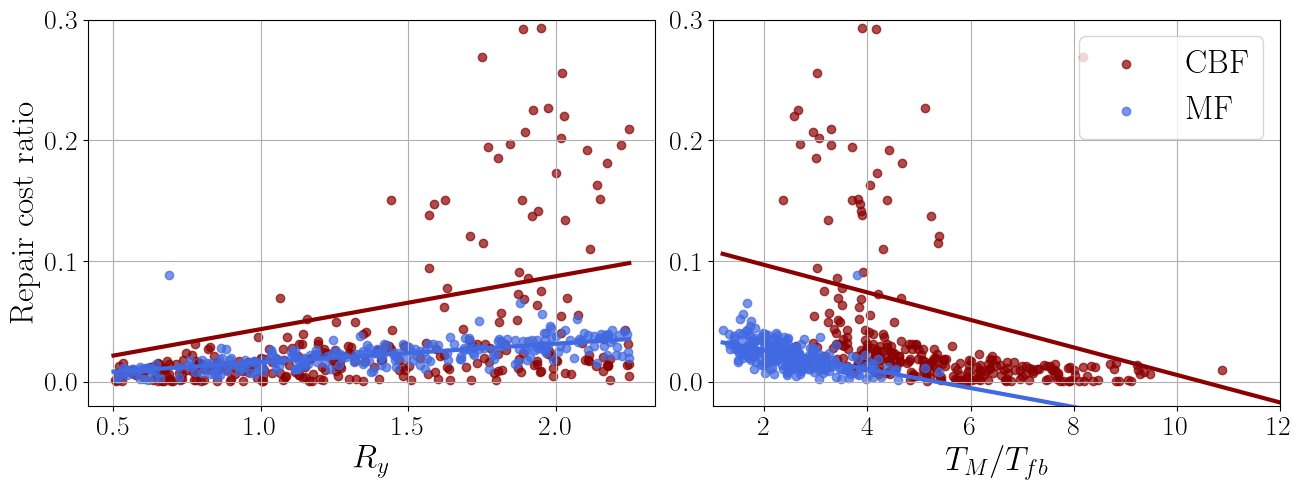

In [19]:

mf_tfp_color = 'royalblue'
mf_lrb_color = 'cornflowerblue'
cbf_tfp_color = 'darkred'
cbf_lrb_color = 'firebrick'

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 20
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
plt.close('all')
fig = plt.figure(figsize=(13, 5))
cmap = plt.cm.tab10

from sklearn import linear_model
regr = linear_model.LinearRegression()

# ax = fig.add_subplot(2, 2, 3)
# xvar = 'gap_ratio'
# x_1d = np.linspace(df[xvar].min(), df[xvar].max(), 200).reshape(-1, 1)
# ax.scatter(df_cbf_o[xvar], df_cbf_o[cost_var], alpha=0.7, color=cbf_tfp_color, label='CBF')
# regr.fit(df_cbf_o[[xvar]], df_cbf_o[[cost_var]])
# y_pred = regr.predict(x_1d)
# plt.plot(x_1d, y_pred, color=cbf_tfp_color, linewidth=3)

# ax.scatter(df_mf_o[xvar], df_mf_o[cost_var], alpha=0.7, color=mf_tfp_color, label='MF')
# regr.fit(df_mf_o[[xvar]], df_mf_o[[cost_var]])
# y_pred = regr.predict(x_1d)
# plt.plot(x_1d, y_pred, color=mf_tfp_color, linewidth=3)
# ax.set_xlabel("$GR$", fontsize=axis_font)

# ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
# ax.set_ylim([-0.02, 0.3])
# ax.grid()

ax = fig.add_subplot(1, 2, 1)
xvar = 'RI'
x_1d = np.linspace(df[xvar].min(), df[xvar].max(), 200).reshape(-1, 1)
ax.scatter(df_cbf_o[xvar], df_cbf_o[cost_var], alpha=0.7, color=cbf_tfp_color, label='CBF')
regr.fit(df_cbf_o[[xvar]], df_cbf_o[[cost_var]])
y_pred = regr.predict(x_1d)
plt.plot(x_1d, y_pred, color=cbf_tfp_color, linewidth=3)

ax.scatter(df_mf_o[xvar], df_mf_o[cost_var], alpha=0.7, color=mf_tfp_color, label='MF')
regr.fit(df_mf_o[[xvar]], df_mf_o[[cost_var]])
y_pred = regr.predict(x_1d)
plt.plot(x_1d, y_pred, color=mf_tfp_color, linewidth=3)
ax.set_xlabel("$R_y$", fontsize=axis_font)
ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
ax.set_ylim([-0.02, 0.3])
ax.grid()


ax = fig.add_subplot(1, 2, 2)
xvar = 'T_ratio'
x_1d = np.linspace(df[xvar].min(), df[xvar].max(), 200).reshape(-1, 1)
ax.scatter(df_cbf_o[xvar], df_cbf_o[cost_var], alpha=0.7, color=cbf_tfp_color, label='CBF')
regr.fit(df_cbf_o[[xvar]], df_cbf_o[[cost_var]])
y_pred = regr.predict(x_1d)
plt.plot(x_1d, y_pred, color=cbf_tfp_color, linewidth=3)

ax.scatter(df_mf_o[xvar], df_mf_o[cost_var], alpha=0.7, color=mf_tfp_color, label='MF')
regr.fit(df_mf_o[[xvar]], df_mf_o[[cost_var]])
y_pred = regr.predict(x_1d)
plt.plot(x_1d, y_pred, color=mf_tfp_color, linewidth=3)
ax.set_xlabel("$T_M/T_{fb}$", fontsize=axis_font)
ax.set_ylim([-0.02, 0.3])
ax.set_xlim([1.0, 12.0])
ax.grid()

ax.legend(fontsize=axis_font, loc='upper right')
# ax = fig.add_subplot(2, 2, 4)
# xvar = 'zeta_e'
# x_1d = np.linspace(df[xvar].min(), df[xvar].max(), 200).reshape(-1, 1)
# ax.scatter(df_cbf_o[xvar], df_cbf_o[cost_var], alpha=0.7, color=cbf_tfp_color, label='CBF')
# regr.fit(df_cbf_o[[xvar]], df_cbf_o[[cost_var]])
# y_pred = regr.predict(x_1d)
# plt.plot(x_1d, y_pred, color=cbf_tfp_color, linewidth=3)

# ax.scatter(df_mf_o[xvar], df_mf_o[cost_var], alpha=0.7, color=mf_tfp_color, label='MF')
# regr.fit(df_mf_o[[xvar]], df_mf_o[[cost_var]])
# y_pred = regr.predict(x_1d)
# plt.plot(x_1d, y_pred, color=mf_tfp_color, linewidth=3)
# ax.set_xlabel("$\zeta_M$", fontsize=axis_font)
# ax.set_ylim([-0.02, 0.3])
# ax.grid()

fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_7_nonimpact_dvs_spectra.pdf')


## Impact DV breakdown

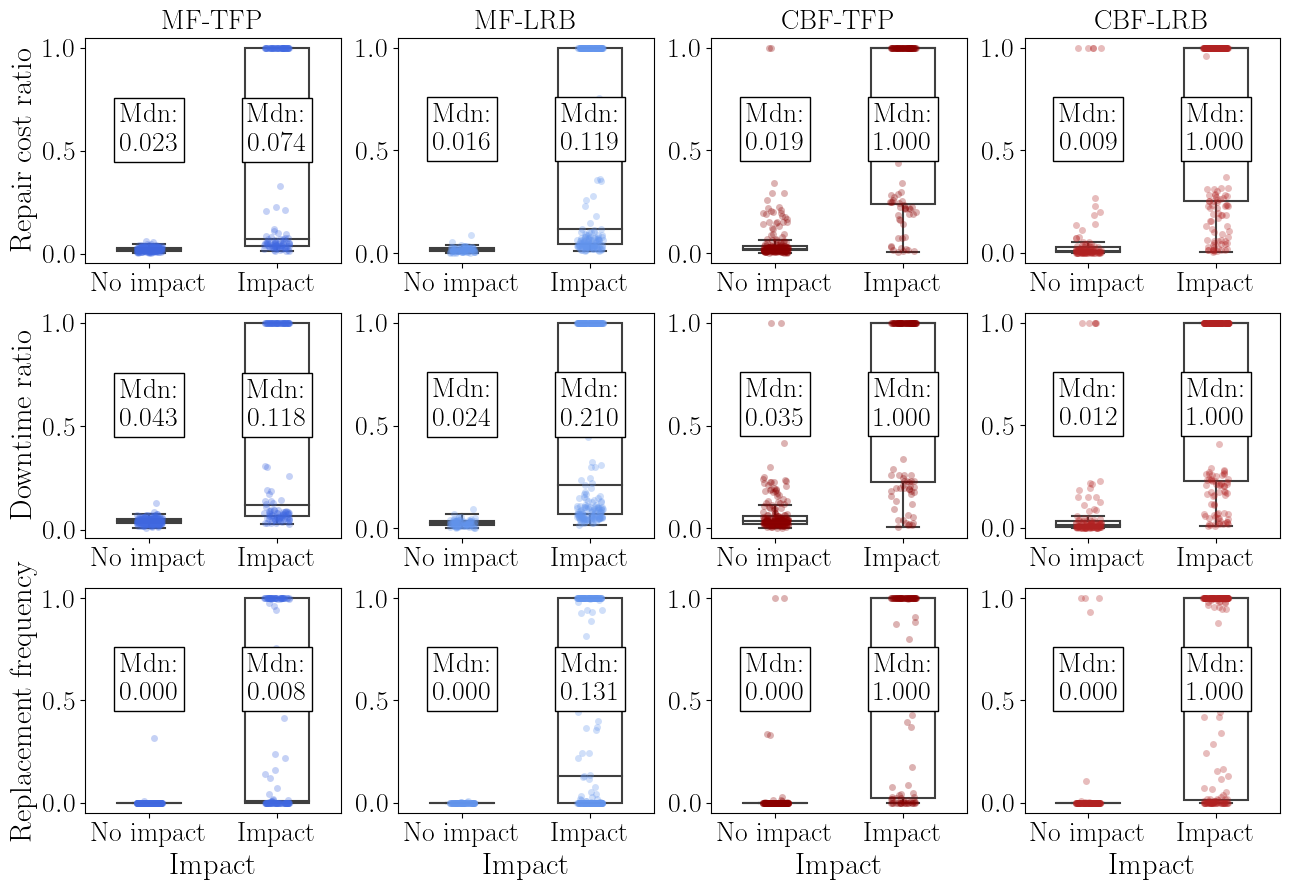

In [20]:

# TODO: breakdown

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 22
subt_font = 20
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# plt.close('all')
import seaborn as sns

# make grid and plot classification predictions

fig = plt.figure(figsize=(13, 9))

cats = ['No impact', 'Impact']

### cost
ax = fig.add_subplot(3, 4, 1)
bx = sns.boxplot(y=cost_var, x= "impacted", data=df_mf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sp = sns.stripplot(x='impacted', y=cost_var, data=df_mf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_tfp_color)


val = df_mf_tfp_o[cost_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_tfp_i[cost_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))


bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
ax.set_title('MF-TFP', fontsize=subt_font)
ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 2)
bx = sns.boxplot(y=cost_var, x= "impacted", data=df_mf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=cost_var, data=df_mf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_lrb_color)

val = df_mf_lrb_o[cost_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_lrb_i[cost_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
ax.set_title('MF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 3)
bx = sns.boxplot(y=cost_var, x= "impacted", data=df_cbf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=cost_var, data=df_cbf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_tfp_color)

val = df_cbf_tfp_o[cost_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_tfp_i[cost_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))


bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
ax.set_title('CBF-TFP', fontsize=subt_font)
# ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 4)
bx = sns.boxplot(y=cost_var, x= "impacted", data=df_cbf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=cost_var, data=df_cbf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_lrb_color)

val = df_cbf_lrb_o[cost_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_lrb_i[cost_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))



bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
ax.set_title('CBF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair cost ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

## time
ax = fig.add_subplot(3, 4, 5)
bx = sns.boxplot(y=time_var, x= "impacted", data=df_mf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sp = sns.stripplot(x='impacted', y=time_var, data=df_mf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_tfp_color)

val = df_mf_tfp_o[time_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_tfp_i[time_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))


bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('MF-TFP', fontsize=subt_font)
ax.set_ylabel('Downtime ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 6)
bx = sns.boxplot(y=time_var, x= "impacted", data=df_mf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=time_var, data=df_mf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_lrb_color)

val = df_mf_lrb_o[time_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_lrb_i[time_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))


bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('MF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair time ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 7)
bx = sns.boxplot(y=time_var, x= "impacted", data=df_cbf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=time_var, data=df_cbf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_tfp_color)

val = df_cbf_tfp_o[time_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_tfp_i[time_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('CBF-TFP', fontsize=subt_font)
# ax.set_ylabel('Repair time ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 8)
bx = sns.boxplot(y=time_var, x= "impacted", data=df_cbf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=time_var, data=df_cbf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_lrb_color)

val = df_cbf_lrb_o[time_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_lrb_i[time_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('CBF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair time ratio', fontsize=axis_font)
# ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')


## time
ax = fig.add_subplot(3, 4, 9)
bx = sns.boxplot(y=repl_var, x= "impacted", data=df_mf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sp = sns.stripplot(x='impacted', y=repl_var, data=df_mf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_tfp_color)

val = df_mf_tfp_o[repl_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_tfp_i[repl_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('MF-TFP', fontsize=subt_font)
ax.set_ylabel('Replacement frequency', fontsize=axis_font)
ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 10)
bx = sns.boxplot(y=repl_var, x= "impacted", data=df_mf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=repl_var, data=df_mf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=mf_lrb_color)

val = df_mf_lrb_o[repl_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_mf_lrb_i[repl_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.45))


bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('MF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair repl ratio', fontsize=axis_font)
ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 11)
bx = sns.boxplot(y=repl_var, x= "impacted", data=df_cbf_tfp,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=repl_var, data=df_cbf_tfp, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_tfp_color)

val = df_cbf_tfp_o[repl_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_tfp_i[repl_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('CBF-TFP', fontsize=subt_font)
# ax.set_ylabel('Repair repl ratio', fontsize=axis_font)
ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

ax = fig.add_subplot(3, 4, 12)
bx = sns.boxplot(y=repl_var, x= "impacted", data=df_cbf_lrb,  showfliers=False,
            boxprops={'facecolor': 'none'},
            width=0.5, ax=ax)
sns.stripplot(x='impacted', y=repl_var, data=df_cbf_lrb, ax=ax, jitter=True,
              alpha=0.3, s=5, color=cbf_lrb_color)

val = df_cbf_lrb_o[repl_var].median()
ax.text(0, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (0, val),(0.25, 0.45))

val = df_cbf_lrb_i[repl_var].median()
ax.text(1, 0.5, f'Mdn: \n{val:,.3f}', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))
ax.annotate("", (1, val),(0.85, 0.8))

bx.set(xlabel=None)
bx.set(ylabel=None)
ax.set_xticklabels(cats)
# ax.set_title('CBF-LRB', fontsize=subt_font)
# ax.set_ylabel('Repair repl ratio', fontsize=axis_font)
ax.set_xlabel('Impact', fontsize=axis_font)
# ax.set_yscale('log')

fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_6_impact_dvs_spectracomments.pdf')

plt.show()


## Impact classification plot

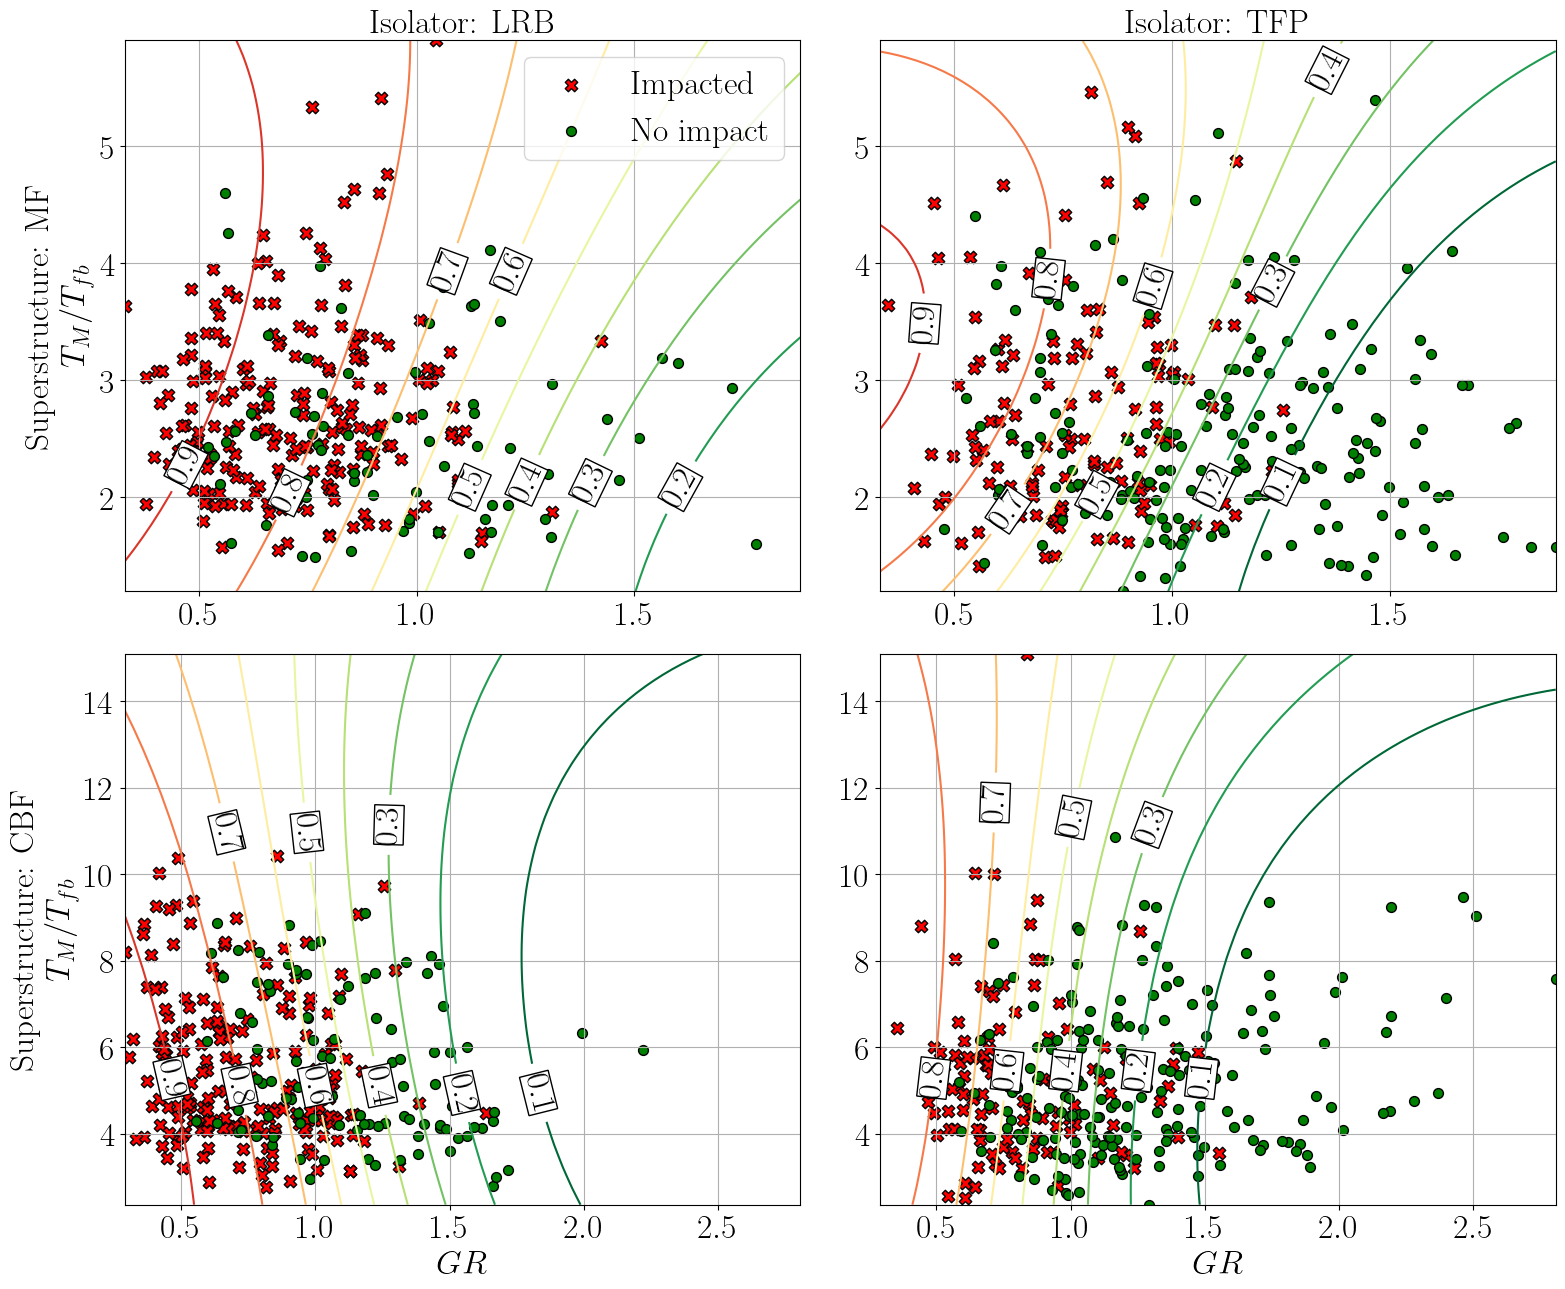

In [21]:

# TODO: impact classification plot

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
title_font = 24
subt_font = 24
import matplotlib as mpl
label_size = 24
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

plt.close('all')
# make grid and plot classification predictions

fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(2, 2, 1)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.0, fourth_var_set = 0.18)
xx = X_plot[xvar]
yy = X_plot[yvar]

# GPC impact prediction
Z = mdl_impact_mf_lrb.gpc.predict_proba(X_plot)[:,1]


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

# plt.imshow(
#         Z_classif,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.RdYlGn_r,
#     )
plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r',
                  levels=np.linspace(0.1,1.0,num=10))
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_lrb_i[xvar][:plt_density],
            df_mf_lrb_i[yvar][:plt_density],
            s=80, c='red', marker='X', edgecolors='black', label='Impacted')

ax.scatter(df_mf_lrb_o[xvar][:plt_density],
            df_mf_lrb_o[yvar][:plt_density],
            s=50, c='green', edgecolors='black', label='No impact')
ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'Isolator: LRB', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel('Superstructure: MF \n $T_M/T_{fb}$', fontsize=axis_font, multialignment='center')
ax.grid('on', zorder=0)
####

ax = fig.add_subplot(2, 2, 2)

res = 75
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.0, fourth_var_set = 0.18)
xx = X_plot[xvar]
yy = X_plot[yvar]

# GPC impact prediction
Z = mdl_impact_mf_tfp.gpc.predict_proba(X_plot)[:,1]


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

# plt.imshow(
#         Z_classif,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.RdYlGn_r,
#     )
plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r',
                  levels=np.linspace(0.1,1.0,num=10))
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_tfp_i[xvar][:plt_density],
            df_mf_tfp_i[yvar][:plt_density],
            s=80, c='red', marker='X', edgecolors='black', label='Impacted')

ax.scatter(df_mf_tfp_o[xvar][:plt_density],
            df_mf_tfp_o[yvar][:plt_density],
            s=50, c='green', edgecolors='black', label='No impact')
# plt.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'Isolator: TFP', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)

ax.grid('on', zorder=0)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks

# plt.show()



ax = fig.add_subplot(2, 2, 3)


res = 75
X_plot = make_2D_plotting_space(df_cbf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.0, fourth_var_set = 0.18)
xx = X_plot[xvar]
yy = X_plot[yvar]

# GPC impact prediction
Z = mdl_impact_cbf_lrb.gpc.predict_proba(X_plot)[:,1]


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

# plt.imshow(
#         Z_classif,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.RdYlGn_r,
#     )
plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r',
                  levels=np.linspace(0.1,1.0,num=10))
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_lrb_i[xvar][:plt_density],
            df_cbf_lrb_i[yvar][:plt_density],
            s=80, c='red', marker='X', edgecolors='black', label='Impacted')

ax.scatter(df_cbf_lrb_o[xvar][:plt_density],
            df_cbf_lrb_o[yvar][:plt_density],
            s=50, c='green', edgecolors='black', label='No impact')
# plt.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
# ax.set_title(r'LRB impact', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel('Superstructure: CBF \n $T_M/T_{fb}$', fontsize=axis_font, multialignment='center')
ax.grid('on', zorder=0)
####

ax = fig.add_subplot(2, 2, 4)

res = 75
X_plot = make_2D_plotting_space(df_cbf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.0, fourth_var_set = 0.18)
xx = X_plot[xvar]
yy = X_plot[yvar]

# GPC impact prediction
Z = mdl_impact_cbf_tfp.gpc.predict_proba(X_plot)[:,1]


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

# plt.imshow(
#         Z_classif,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.RdYlGn_r,
#     )
plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r',
                  levels=np.linspace(0.1,1.0,num=10))
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_tfp_i[xvar][:plt_density],
            df_cbf_tfp_i[yvar][:plt_density],
            s=80, c='red', marker='X', edgecolors='black', label='Impacted')

ax.scatter(df_cbf_tfp_o[xvar][:plt_density],
            df_cbf_tfp_o[yvar][:plt_density],
            s=50, c='green', edgecolors='black', label='No impact')
# plt.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
# ax.set_title(r'TFP impact', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)

ax.grid('on', zorder=0)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks
fig.tight_layout()
plt.savefig('./eng_struc_figures/spectracomments/fig_8_impact_classif_spectracomments.pdf')
plt.show()


## Variance and LOOCV study

In [22]:
# from doe import GP
# mdl_cost_mf_lrb_o = GP(df_mf_lrb_o)
# mdl_cost_mf_lrb_o.set_covariates(covariate_list)
# mdl_cost_mf_lrb_o.set_outcome(cost_var)
# mdl_cost_mf_lrb_o.test_train_split(0.2)

# mdl_cost_mf_lrb_o.fit_gpr(kernel_name='rbf_iso')
import numpy as np
import pandas as pd

def smooth_LOOCV_error(mdl, df_plot):

    xvar = 'gap_ratio'
    yvar = 'RI'


    res = 100
    X_plot = make_2D_plotting_space(
        df_plot[covariate_list], res, x_var=xvar, y_var=yvar, 
        all_vars=covariate_list, 
        third_var_set = df_plot['T_ratio'].median(), 
        fourth_var_set = df_plot['zeta_e'].median())
    
    xx = X_plot[xvar]
    yy = X_plot[yvar]


    # get trained GP info
    try:
        gp_obj = mdl.gpr._final_estimator
        X_train = gp_obj.X_train_
    except:
        gp_obj = mdl.gpc._final_estimator
        X_train = mdl.X_train
        

    # isotropic RBF, probably
    # use decaying distance metric
    point = np.array(np.asarray(X_plot))
    # point = np.array([[0.5, 0.5, 2.4, 0.2]])
    from scipy.spatial.distance import cdist

    if len(gp_obj.kernel_.theta < 4):
        lengthscale = gp_obj.kernel_.theta[1]
    # ARD RBF, probably
    else:
        lengthscale = gp_obj.kernel_.theta[1:5]


    dist_list = cdist(point/lengthscale, X_train/lengthscale)

    # calculate LOOCV error of training set (Kyprioti)
    L = gp_obj.L_
    K_mat = L @ L.T
    alpha_ = gp_obj.alpha_.flatten()
    K_inv_diag = np.linalg.inv(K_mat).diagonal()
    e_cv = np.divide(alpha_, K_inv_diag)
    e_cv_sq = np.divide(alpha_, K_inv_diag)**2

    return (xx, yy, dist_list @ e_cv)

def point_LOO_resid(mdl, df_plot):

    xvar = 'gap_ratio'
    yvar = 'RI'

    # get trained GP info
    try:
        gp_obj = mdl.gpr._final_estimator
        X_train = gp_obj.X_train_
    except:
        gp_obj = mdl.gpc._final_estimator
        X_train = mdl.X_train
        


    # calculate LOOCV error of training set (Kyprioti)
    L = gp_obj.L_
    K_mat = L @ L.T
    alpha_ = gp_obj.alpha_.flatten()
    K_inv_diag = np.linalg.inv(K_mat).diagonal()
    e_cv = np.divide(alpha_, K_inv_diag)
    e_cv_sq = np.divide(alpha_, K_inv_diag)**2

    return (e_cv)

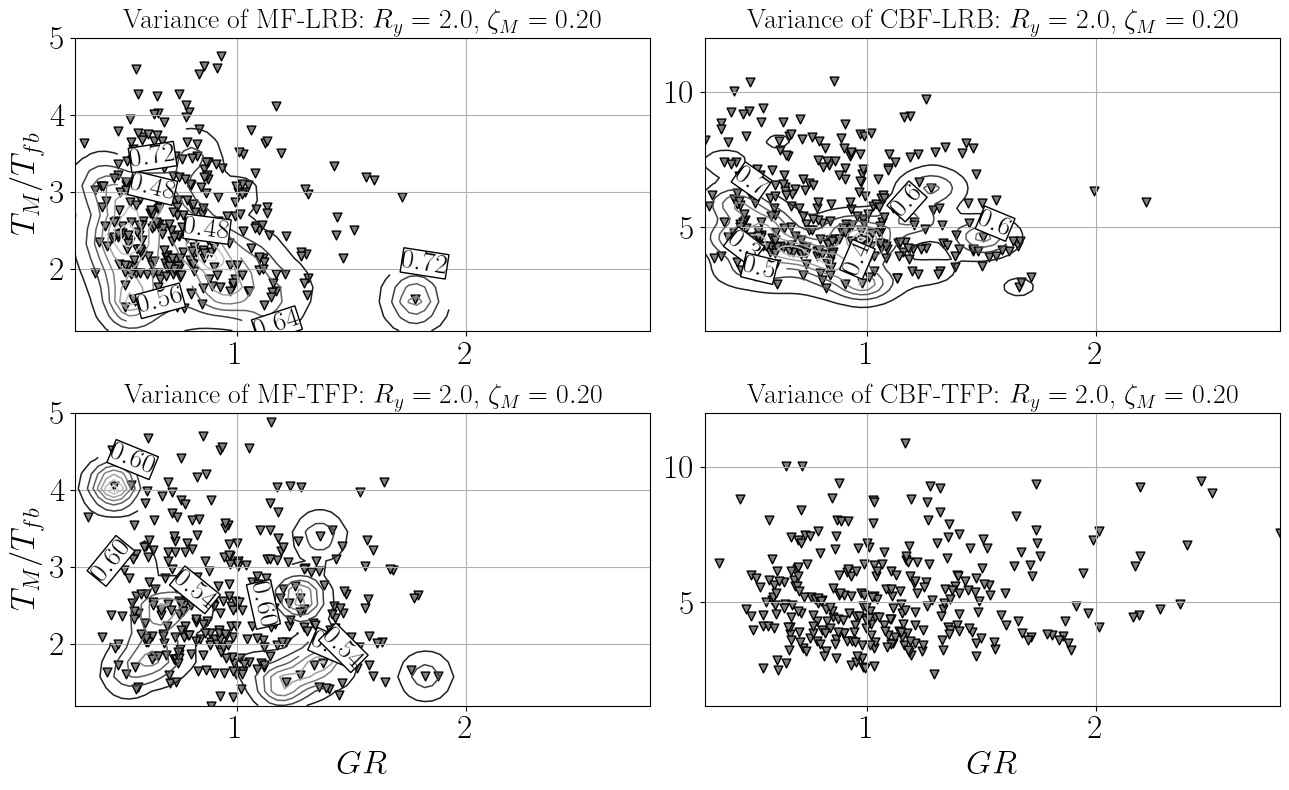

In [23]:
# TODO: KDE

fig = plt.figure(figsize=(13,8))

title_font = 20
ax=fig.add_subplot(2, 2, 1)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

# Variance estimation

mdl_test = GP(df_mf_lrb)
mdl_test.set_covariates(covariate_list)
mdl_test.set_outcome('impacted')
mdl_test.test_train_split(0.2)
mdl_test.fit_gpr(kernel_name='rbf_iso', noiseless=True)

dummy, Z_dens = mdl_test.gpr.predict(X_plot, return_std=True)

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = Z_dens.reshape(xx_pl.shape)


lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_lrb[xvar],
            df_mf_lrb[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Variance of MF-LRB: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=5)
ax.grid()

ax=fig.add_subplot(2, 2, 2)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

mdl_test = GP(df_cbf_lrb)
mdl_test.set_covariates(covariate_list)
mdl_test.set_outcome('impacted')
mdl_test.test_train_split(0.2)
mdl_test.fit_gpr(kernel_name='rbf_iso', noiseless=True)

dummy, Z_dens = mdl_test.gpr.predict(X_plot, return_std=True)

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = Z_dens.reshape(xx_pl.shape)

plt_Variance = 200

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_lrb[xvar],
            df_cbf_lrb[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Variance of CBF-LRB: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=12)
ax.grid()


#### TFPs

ax=fig.add_subplot(2, 2, 3)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]


mdl_test = GP(df_mf_tfp)
mdl_test.set_covariates(covariate_list)
mdl_test.set_outcome('impacted')
mdl_test.test_train_split(0.2)
mdl_test.fit_gpr(kernel_name='rbf_iso', noiseless=True)

dummy, Z_dens = mdl_test.gpr.predict(X_plot, return_std=True)

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = Z_dens.reshape(xx_pl.shape)

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_tfp[xvar],
            df_mf_tfp[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Variance of MF-TFP: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=5)
ax.grid()

ax=fig.add_subplot(2, 2, 4)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]


# # kernel logistic impact prediction
# K_space = mdl_impact.get_kernel(X_plot, kernel_name='rbf', gamma=0.25)
# probs_imp = mdl_impact.log_reg_kernel.predict_proba(K_space)
# Z = probs_imp[:,1]

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

mdl_test = GP(df_cbf_tfp)
mdl_test.set_covariates(covariate_list)
mdl_test.set_outcome('impacted')
mdl_test.test_train_split(0.2)
mdl_test.fit_gpr(kernel_name='rbf_iso', noiseless=True)

dummy, Z_dens = mdl_test.gpr.predict(X_plot, return_std=True)

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = Z_dens.reshape(xx_pl.shape)

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_tfp[xvar],
            df_cbf_tfp[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Variance of CBF-TFP: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylim(top=12)
# ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.grid()
fig.tight_layout()

plt.show()

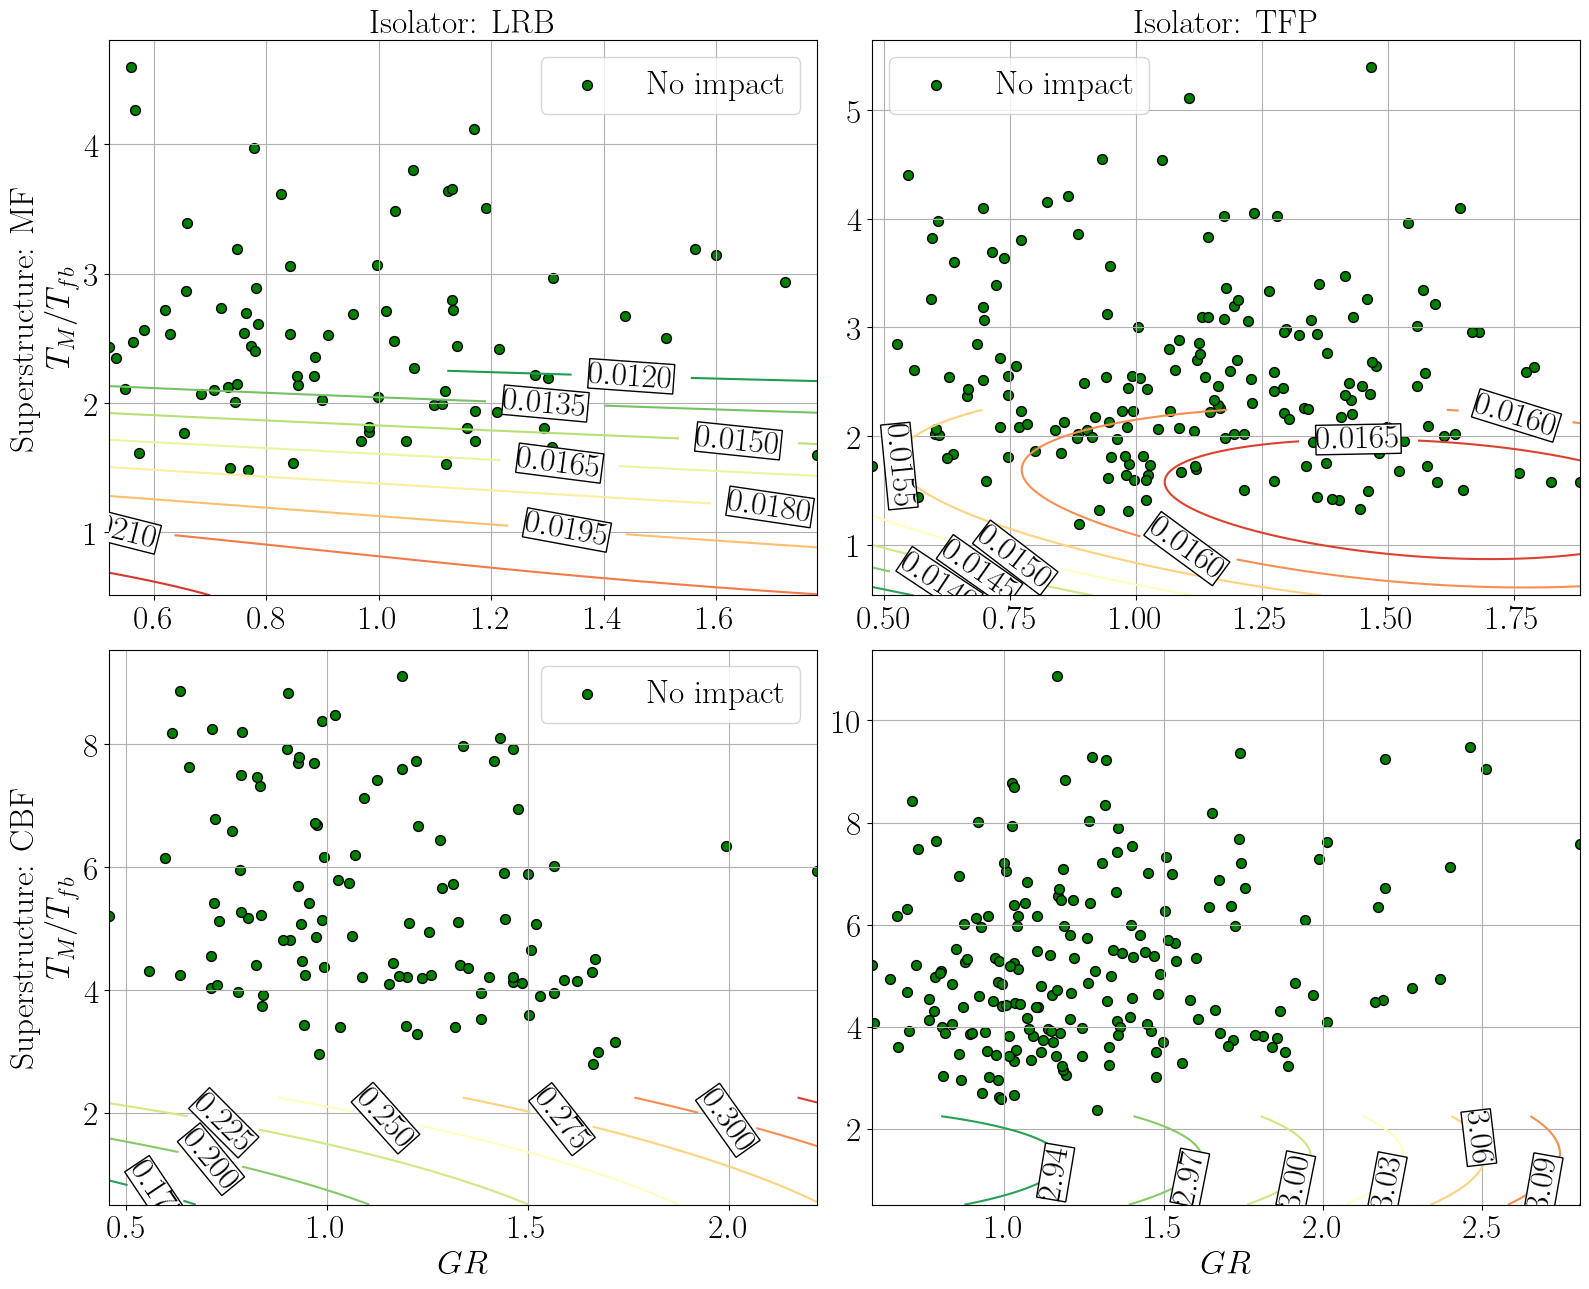

In [24]:

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
title_font = 24
subt_font = 24
import matplotlib as mpl
label_size = 24
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

plt.close('all')
# make grid and plot classification predictions

fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(2, 2, 1)

# GPC impact prediction
df_plot = df_mf_lrb_o.copy()
mdl_cur = mdl_cost_mf_lrb_o
xx, yy, Z = smooth_LOOCV_error(mdl_cur, df_plot)


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r')
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_plot[xvar], df_plot[yvar],
            s=50, c='green', edgecolors='black', label='No impact')
ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'Isolator: LRB', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel('Superstructure: MF \n $T_M/T_{fb}$', fontsize=axis_font, multialignment='center')
ax.grid('on', zorder=0)
####

ax = fig.add_subplot(2, 2, 2)

# GPC impact prediction
df_plot = df_mf_tfp_o.copy()
mdl_cur = mdl_cost_mf_tfp_o
xx, yy, Z = smooth_LOOCV_error(mdl_cur, df_plot)


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r')
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_plot[xvar], df_plot[yvar],
            s=50, c='green', edgecolors='black', label='No impact')
ax.legend(fontsize=axis_font)
# plt.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'Isolator: TFP', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)

ax.grid('on', zorder=0)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks

# plt.show()



ax = fig.add_subplot(2, 2, 3)


# GPC impact prediction
df_plot = df_cbf_lrb_o.copy()
mdl_cur = mdl_cost_cbf_lrb_o
xx, yy, Z = smooth_LOOCV_error(mdl_cur, df_plot)


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r')
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_plot[xvar], df_plot[yvar],
            s=50, c='green', edgecolors='black', label='No impact')
ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
# ax.set_title(r'LRB impact', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel('Superstructure: CBF \n $T_M/T_{fb}$', fontsize=axis_font, multialignment='center')
ax.grid('on', zorder=0)
####

ax = fig.add_subplot(2, 2, 4)


# GPC impact prediction
df_plot = df_cbf_tfp_o.copy()
mdl_cur = mdl_cost_cbf_tfp_o
xx, yy, Z = smooth_LOOCV_error(mdl_cur, df_plot)


x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_classif = Z.reshape(xx_pl.shape)

plt_density = 200
cs = plt.contour(xx_pl, yy_pl, Z_classif, linewidths=1.5, cmap='RdYlGn_r')
clabels = plt.clabel(cs, fontsize=subt_font, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_plot[xvar], df_plot[yvar],
            s=50, c='green', edgecolors='black', label='No impact')
# plt.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
# ax.set_title(r'TFP impact', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)

ax.grid('on', zorder=0)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks
fig.tight_layout()
plt.show()

# plt.savefig('./eng_struc_figures/spectracomments/impact_classif.pdf')

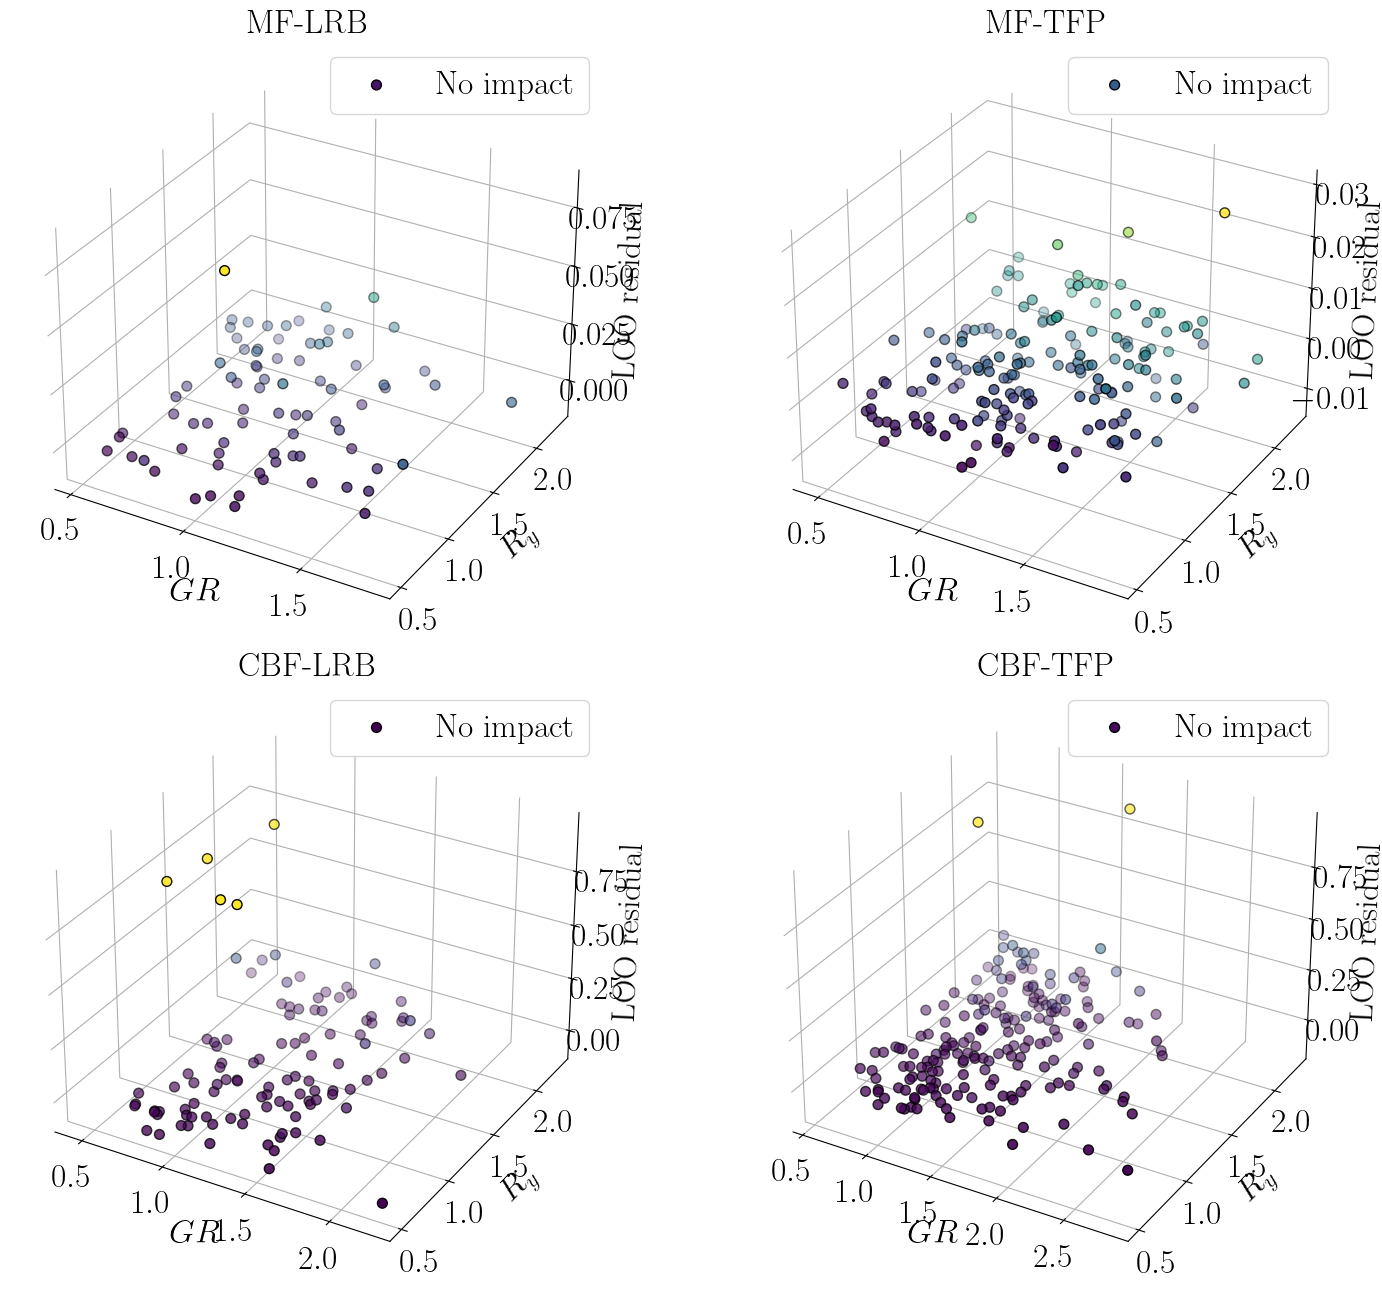

In [25]:

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
title_font = 24
subt_font = 24
import matplotlib as mpl
label_size = 24
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

plt.close('all')
# make grid and plot classification predictions

xvar = 'gap_ratio'
yvar = 'RI'

fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(2, 2, 1, projection='3d')

# GPC impact prediction
df_plot = df_mf_lrb_o.copy()
mdl_cur = mdl_cost_mf_lrb_o
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='No impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'MF-LRB', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
ax.grid('on', zorder=0)
####

ax = fig.add_subplot(2, 2, 2, projection='3d')

# GPC impact prediction
df_plot = df_mf_tfp_o.copy()
mdl_cur = mdl_cost_mf_tfp_o
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='No impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'MF-TFP', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)

# plt.show()



ax = fig.add_subplot(2, 2, 3, projection='3d')


# GPC impact prediction
df_plot = df_cbf_lrb_o.copy()
mdl_cur = mdl_cost_cbf_lrb_o
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='No impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

# ax.set_xlim(0.3, 2.0)
ax.set_title(r'CBF-LRB', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
####

ax = fig.add_subplot(2, 2, 4, projection='3d')


# GPC impact prediction
df_plot = df_cbf_tfp_o.copy()
mdl_cur = mdl_cost_cbf_tfp_o
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='No impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

ax.set_title(r'CBF-TFP', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
ax.grid('on', zorder=0)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks
fig.tight_layout()
plt.show()

# plt.savefig('./eng_struc_figures/spectracomments/impact_classif.pdf')

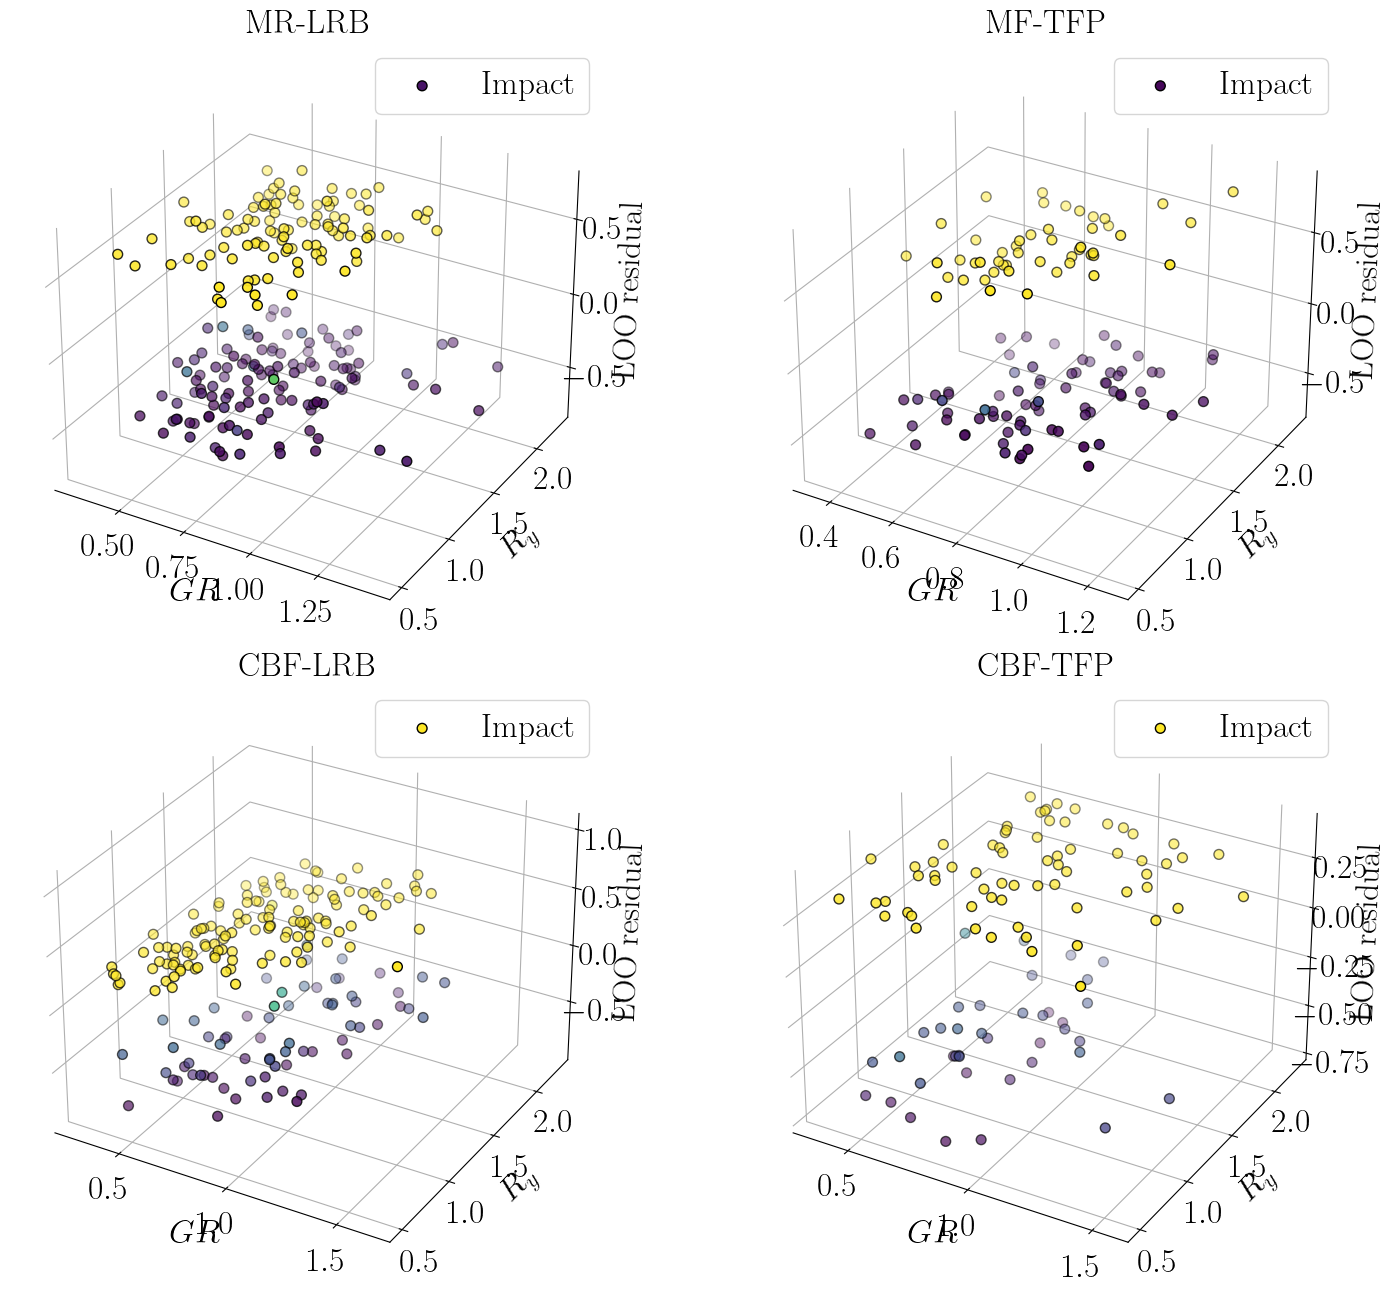

In [26]:

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
title_font = 24
subt_font = 24
import matplotlib as mpl
label_size = 24
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

plt.close('all')
# make grid and plot classification predictions

fig = plt.figure(figsize=(16, 13))
ax = fig.add_subplot(2, 2, 1, projection='3d')

xvar = 'gap_ratio'
yvar = 'RI'

# GPC impact prediction
df_plot = df_mf_lrb_i.copy()
mdl_cur = mdl_cost_mf_lrb_i
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='Impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

ax.set_title(r'MR-LRB', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
####

ax = fig.add_subplot(2, 2, 2, projection='3d')

# GPC impact prediction
df_plot = df_mf_tfp_i.copy()
mdl_cur = mdl_cost_mf_tfp_i
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='Impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

ax.set_title(r'MF-TFP', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks

# plt.show()



ax = fig.add_subplot(2, 2, 3, projection='3d')


# GPC impact prediction
df_plot = df_cbf_lrb_i.copy()
mdl_cur = mdl_cost_cbf_lrb_i
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='Impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

ax.set_title(r'CBF-LRB', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
####

ax = fig.add_subplot(2, 2, 4, projection='3d')


# GPC impact prediction
df_plot = df_cbf_tfp_i.copy()
mdl_cur = mdl_cost_cbf_tfp_i
Z = point_LOO_resid(mdl_cur, df_plot)

ax.scatter(df_plot[xvar], df_plot[yvar], Z, c=df_plot[cost_var],
            s=50, cmap='viridis', edgecolors='black', label='Impact')


ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))

ax.legend(fontsize=axis_font)

ax.set_title(r'CBF-TFP', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)
ax.set_zlabel(r'LOO residual', fontsize=axis_font)
# plt.tick_params(left=False, labelleft=False, bottom=False, labelbottom=False) #remove ticks
fig.tight_layout()
plt.show()

# plt.savefig('./eng_struc_figures/spectracomments/impact_classif.pdf')

## Targeted contours

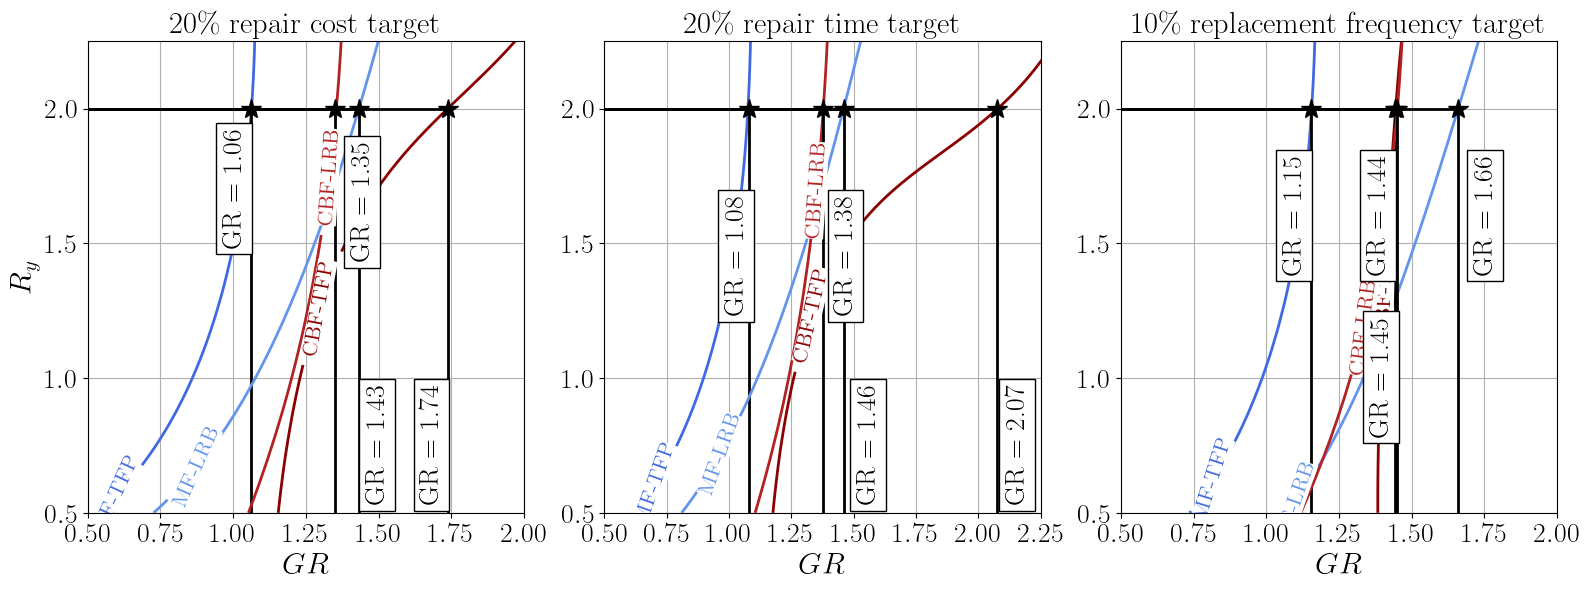

In [27]:

# Figure caption needs to state the fixed variables

# TODO: contour

def design_line(level, xoffset=0.05, y_loc=0.55, Ry_target=2.0):
    from scipy.interpolate import RegularGridInterpolator
    xq = np.linspace(0.7, 2.5, 200)
    interp = RegularGridInterpolator((y_pl, x_pl), Z_cont)
    pts = np.zeros((200,2))
    pts[:,1] = xq
    pts[:,0] = Ry_target

    lq = interp(pts)

    theGapIdx = np.argmin(abs(lq - level))

    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='black',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='black', linewidth=2.0)
    ax.text(theGap+xoffset, y_loc, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'),
              zorder=20)
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='black')

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=22
axis_font = 22
subt_font = 20
label_size = 20
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

fig = plt.figure(figsize=(16, 6))

#################################
xvar = 'gap_ratio'
yvar = 'RI'

lvls = np.array([0.2])

res = 100
X_plot = make_2D_plotting_space(df[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 3.0, fourth_var_set = 0.2)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

## MF-TFP

ax = fig.add_subplot(1, 3, 1)
plt.setp(ax, xticks=np.arange(0.5, 3.0, step=0.25))
plt.setp(ax, yticks=np.arange(0.5, 3.0, step=0.5))
grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=mf_tfp_color, vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

# manual_locations = [(0.5, 1.0), (1.05, 1.25), (0.8, 1.25), (0.85, 0.85)]
# plt.clabel(cs, inline=1, fontsize=clabel_size, manual=manual_locations)

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
# [txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=-0.1, y_loc=1.5, Ry_target=2.0)

## MF-LRB
grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_cost_mf_lrb_i.gpr,
                       mdl_cost_mf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[mf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, manual=[(0.75, 0.7)], inline_spacing=-10.0)
[txt.set_bbox(dict(boxstyle='square, pad=0', facecolor='white', edgecolor='none')) for txt in clabels]
design_line(0.2, xoffset=0.02, y_loc=0.55, Ry_target=2.0)

## CBF-TFP
grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_cost_cbf_tfp_i.gpr,
                       mdl_cost_cbf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_tfp_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=-0.1, y_loc=0.55, Ry_target=2.0)

## CBF-LRB
grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_cost_cbf_lrb_i.gpr,
                       mdl_cost_cbf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, manual=[(1.2, 1.75)])
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=0.05, y_loc=1.45, Ry_target=2.0)

ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_title(r'20\% repair cost target', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

######

ax = fig.add_subplot(1, 3, 2)
plt.setp(ax, xticks=np.arange(0.5, 3.0, step=0.25))
plt.setp(ax, yticks=np.arange(0.5, 3.0, step=0.5))
grid_time = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_time_mf_tfp_i.gpr,
                       mdl_time_mf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=mf_tfp_color, vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=-0.1, y_loc=1.25, Ry_target=2.0)

## MF-LRB
grid_time = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_time_mf_lrb_i.gpr,
                       mdl_time_mf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[mf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0,
                    manual=[(0.8, 0.75)])
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=.05, y_loc=0.55, Ry_target=2.0)

## CBF-TFP
grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_time_cbf_tfp_i.gpr,
                       mdl_time_cbf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_tfp_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=0.03, y_loc=0.55, Ry_target=2.0)

## CBF-LRB
grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_time_cbf_lrb_i.gpr,
                       mdl_time_cbf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0,
                    manual=[(1.25, 1.7)])
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.2, xoffset=0.04, y_loc=1.25, Ry_target=2.0)

ax.set_xlim([0.5, 2.25])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_title(r'20\% repair time target', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)

######

lvls = [0.1]
ax = fig.add_subplot(1, 3, 3)
plt.setp(ax, xticks=np.arange(0.5, 3.0, step=0.25))
plt.setp(ax, yticks=np.arange(0.5, 3.0, step=0.5))

grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=mf_tfp_color, vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.1, xoffset=-.1, y_loc=1.4, Ry_target=2.0)

## MF-LRB
grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_repl_mf_lrb_i.gpr,
                       mdl_repl_mf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[mf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['MF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.1, xoffset=.05, y_loc=1.4, Ry_target=2.0)

## CBF-TFP
grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_repl_cbf_tfp_i.gpr,
                       mdl_repl_cbf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_tfp_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-TFP']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.1, xoffset=-0.1, y_loc=1.4, Ry_target=2.0)

## CBF-LRB
grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_repl_cbf_lrb_i.gpr,
                       mdl_repl_cbf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, colors=[cbf_lrb_color], vmin=-1,
                 levels=lvls)
fmt = {}
strs = ['CBF-LRB']
for l, s in zip(cs.levels, strs):
    fmt[l] = s

clabels = ax.clabel(cs, cs.levels[::2], fmt=fmt, fontsize=clabel_size, inline_spacing=-10.0)
[txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]
design_line(0.1, xoffset=-.1, y_loc=0.8, Ry_target=2.0)

ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_title(r'10\% replacement frequency target', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


fig.tight_layout()
plt.savefig('./eng_struc_figures/spectracomments/fig_9_target_contours_GR_Ry_spectracomments.pdf')
plt.show()


### time and repl

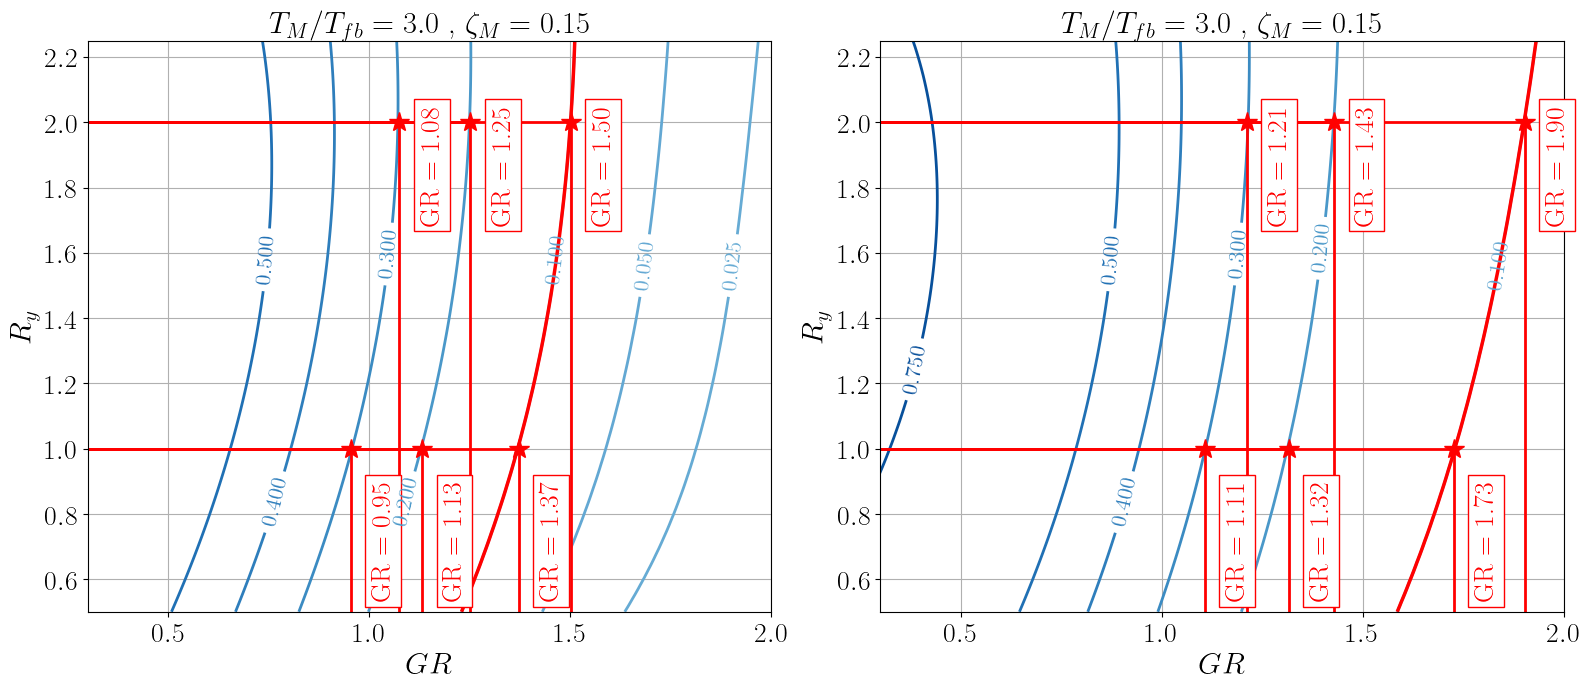

In [28]:


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=22
axis_font = 22
subt_font = 20
label_size = 20
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

fig = plt.figure(figsize=(16, 7))

#################################
xvar = 'gap_ratio'
yvar = 'RI'

lvls = np.array([0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])

res = 100
X_plot = make_2D_plotting_space(mdl_impact_cbf_lrb.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 3.0, fourth_var_set = 0.15)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

ax = fig.add_subplot(1, 2, 1)
plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_repl_cbf_lrb_i.gpr,
                       mdl_repl_cbf_lrb_o.gpr,
                       outcome='replacement_freq_pred')

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-1,
                 levels=lvls)
clabels = ax.clabel(cs, fontsize=clabel_size)
# [txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]

prob_list = [0.3, 0.2, 0.1]
from scipy.interpolate import RegularGridInterpolator
for j, prob_des in enumerate(prob_list):
    xq = np.linspace(0.4, 2.0, 200)
    
    Ry_target = 1.0
    
    interp = RegularGridInterpolator((y_pl, x_pl), Z_cont)
    pts = np.zeros((200,2))
    pts[:,1] = xq
    pts[:,0] = Ry_target
    
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='red',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='red', linewidth=2.0)
    ax.text(theGap+0.05, 0.55, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='red', bbox=dict(facecolor='white', edgecolor='red'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='red')
    
    
    # Ry = 2.0
    Ry_target = 2.0
    pts[:,0] = Ry_target
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='red',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='red', linewidth=2.0)
    ax.text(theGap+0.05, 1.7, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='red', bbox=dict(facecolor='white', edgecolor='red'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='red')
    


ax.contour(xx_pl, yy_pl, Z_cont, levels = [0.1], colors=('red'),
            linestyles=('-'),linewidths=(2.5,))

ax.set_xlim([0.3, 2.0])
ax.set_ylim([0.5, 2.25])

# df_sc = df[(df['T_ratio']<=3.5) & (df['T_ratio']>=2.5) & 
#             (df['zeta_e']<=0.2) & (df['zeta_e']>=0.13)]

# sc = ax.scatter(df_sc[xvar],
#             df_sc[yvar],
#             c=df_sc[cost_var], cmap='Blues',
#             s=20, edgecolors='k', linewidth=0.5)

ax.grid(visible=True)
ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.15$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

# handles, labels = sc.legend_elements(prop="colors")
# legend2 = ax.legend(handles, labels, loc="lower right", title="$c_r$",
#                       fontsize=subt_font, title_fontsize=subt_font)

#################################
xvar = 'gap_ratio'
yvar = 'RI'

lvls = np.array([0.025, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.75, 1.0])

res = 100
X_plot = make_2D_plotting_space(mdl_impact_cbf_lrb.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 3.0, fourth_var_set = 0.15)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

ax = fig.add_subplot(1, 2, 2)
plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_time_cbf_lrb_i.gpr,
                       mdl_time_cbf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-1,
                 levels=lvls)
clabels = ax.clabel(cs, fontsize=clabel_size)
# [txt.set_bbox(dict(facecolor='white', edgecolor='none', pad=0)) for txt in clabels]

prob_list = [0.3, 0.2, 0.1]
from scipy.interpolate import RegularGridInterpolator
for j, prob_des in enumerate(prob_list):
    xq = np.linspace(0.4, 2.0, 200)
    
    Ry_target = 1.0
    
    interp = RegularGridInterpolator((y_pl, x_pl), Z_cont)
    pts = np.zeros((200,2))
    pts[:,1] = xq
    pts[:,0] = Ry_target
    
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='red',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='red', linewidth=2.0)
    ax.text(theGap+0.05, 0.55, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='red', bbox=dict(facecolor='white', edgecolor='red'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='red')
    
    
    # Ry = 2.0
    Ry_target = 2.0
    pts[:,0] = Ry_target
    lq = interp(pts)
    
    the_points = np.vstack((pts[:,0], pts[:,1], lq))
    
    theGapIdx = np.argmin(abs(lq - prob_des))
    
    theGap = xq[theGapIdx]
    ax.vlines(x=theGap, ymin=0.49, ymax=Ry_target, color='red',
                linewidth=2.0)
    ax.hlines(y=Ry_target, xmin=0.3, xmax=theGap, color='red', linewidth=2.0)
    ax.text(theGap+0.05, 1.7, r'GR = '+f'{theGap:,.2f}', rotation=90,
              fontsize=subt_font, color='red', bbox=dict(facecolor='white', edgecolor='red'))
    ax.plot([theGap], [Ry_target], marker='*', markersize=15, color='red')
    


ax.contour(xx_pl, yy_pl, Z_cont, levels = [0.1], colors=('red'),
            linestyles=('-'),linewidths=(2.5,))

ax.set_xlim([0.3, 2.0])
ax.set_ylim([0.5, 2.25])

# df_sc = df[(df['T_ratio']<=3.5) & (df['T_ratio']>=2.5) & 
#            (df['zeta_e']<=0.2) & (df['zeta_e']>=0.13)]

# sc = ax.scatter(df_sc[xvar],
#             df_sc[yvar],
#             c=df_sc[cost_var], cmap='Blues',
#             s=20, edgecolors='k', linewidth=0.5)

ax.grid(visible=True)
ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.15$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

# handles, labels = sc.legend_elements(prop="colors")
# legend2 = ax.legend(handles, labels, loc="lower left", title="$t_r$",
#                       fontsize=subt_font, title_fontsize=subt_font)


fig.tight_layout()
plt.show()

### Secondary contours

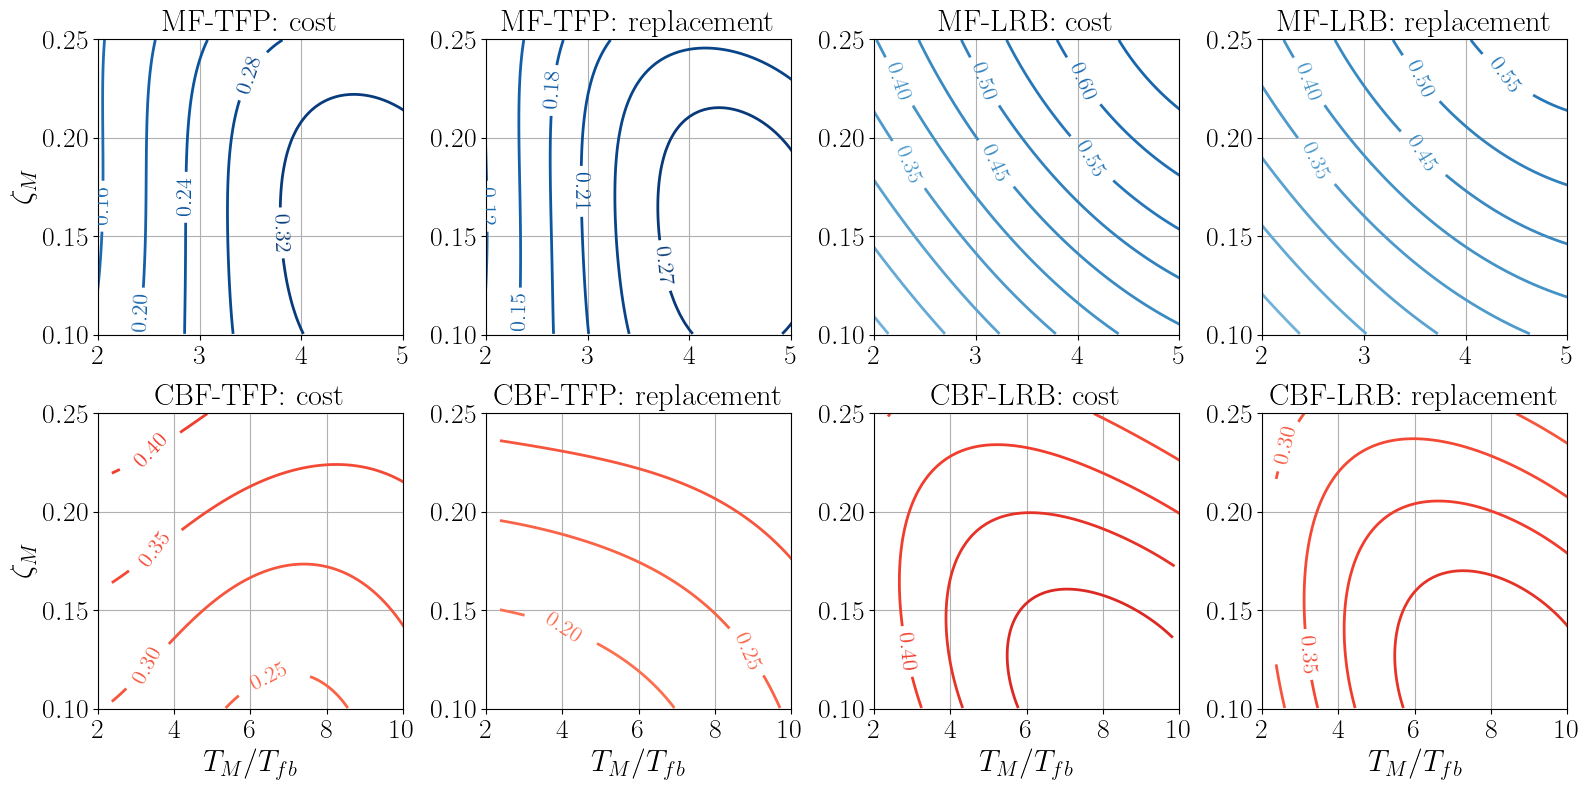

In [29]:
# TODO: contour, add imshow to this

# Figure caption needs to state the fixed variables


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=22
axis_font = 22
subt_font = 20
label_size = 20
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

fig = plt.figure(figsize=(16, 8))

#################################
xvar = 'T_ratio'
yvar = 'zeta_e'

# lvls = np.array([0.2])
lvls = np.arange(0.01, .2, 0.01)


####### MFs
res = 100
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 1.0, fourth_var_set = 2.0)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

## mf-TFP: cost
ax = fig.add_subplot(2, 4, 1)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 5.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'MF-TFP: cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## mf-TFP: repl
ax = fig.add_subplot(2, 4, 2)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 5.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'MF-TFP: replacement', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## mf-LRB: cost
lvls = np.arange(0.05, 1.0, 0.05)
ax = fig.add_subplot(2, 4, 3)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_cost_mf_lrb_i.gpr,
                       mdl_cost_mf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5,
                levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 5.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'MF-LRB: cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## mf-LRB: repl
ax = fig.add_subplot(2, 4, 4)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_repl_mf_lrb_i.gpr,
                       mdl_repl_mf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5,
                 levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 5.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'MF-LRB: replacement', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

####### CBFs
res = 100
X_plot = make_2D_plotting_space(df_cbf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 1.0, fourth_var_set = 2.0)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

## CBF-TFP: cost
ax = fig.add_subplot(2, 4, 5)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=2.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_cost_cbf_tfp_i.gpr,
                       mdl_cost_cbf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Reds', vmin=-0.5,
                 levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 10.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'CBF-TFP: cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## CBF-TFP: repl
ax = fig.add_subplot(2, 4, 6)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=2.0))

grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_repl_cbf_tfp_i.gpr,
                       mdl_repl_cbf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Reds', vmin=-0.5,
                 levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 10.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'CBF-TFP: replacement', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## CBF-LRB: cost
ax = fig.add_subplot(2, 4, 7)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=2.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_cost_cbf_lrb_i.gpr,
                       mdl_cost_cbf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Reds', vmin=-0.5,
                 levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 10.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'CBF-LRB: cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

## CBF-LRB: repl
ax = fig.add_subplot(2, 4, 8)
plt.setp(ax, xticks=np.arange(2.0, 11.0, step=2.0))

grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_repl_cbf_lrb_i.gpr,
                       mdl_repl_cbf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Reds', vmin=-0.5,
                 levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([2.0, 10.0])
ax.set_ylim([0.1, 0.25])

ax.grid(visible=True)
ax.set_title(r'CBF-LRB: replacement', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)


fig.tight_layout()
plt.savefig('./eng_struc_figures/spectracomments/fig_10_target_contours_Tm_zeta_spectracomments.eps')
plt.show()


## Constructability KDE

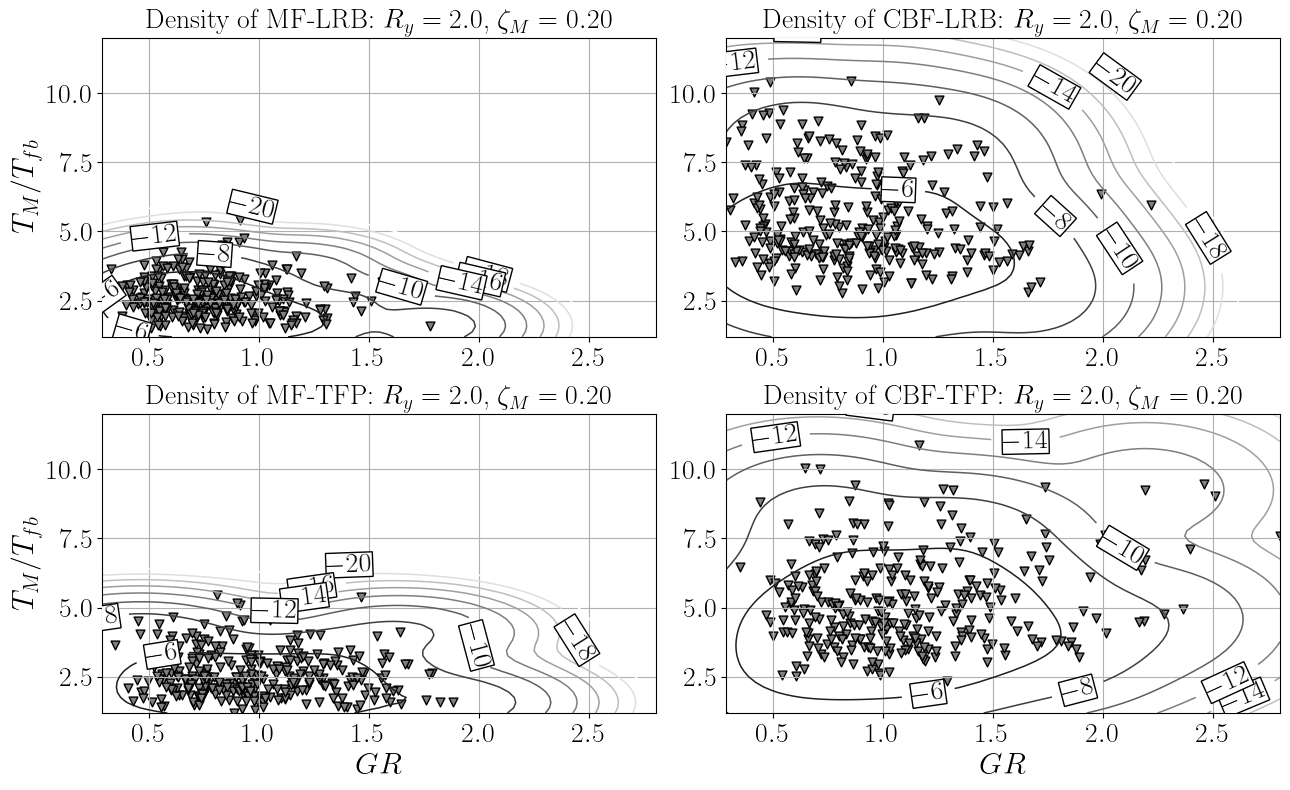

In [30]:
# TODO: KDE

fig = plt.figure(figsize=(13,8))

title_font = 20
ax=fig.add_subplot(2, 2, 1)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

# density estimation
log_dens = mdl_impact_mf_lrb.kde.score_samples(X_plot)


# # kernel logistic impact prediction
# K_space = mdl_impact.get_kernel(X_plot, kernel_name='rbf', gamma=0.25)
# probs_imp = mdl_impact.log_reg_kernel.predict_proba(K_space)
# Z = probs_imp[:,1]

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = log_dens.reshape(xx_pl.shape)

# plt.imshow(
#         Z_dens,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.Blues,
#     )


lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, levels=lvls, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_lrb[xvar],
            df_mf_lrb[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Density of MF-LRB: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=12)
ax.grid()

ax=fig.add_subplot(2, 2, 2)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

# density estimation
log_dens = mdl_impact_cbf_lrb.kde.score_samples(X_plot)


# # kernel logistic impact prediction
# K_space = mdl_impact.get_kernel(X_plot, kernel_name='rbf', gamma=0.25)
# probs_imp = mdl_impact.log_reg_kernel.predict_proba(K_space)
# Z = probs_imp[:,1]

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = log_dens.reshape(xx_pl.shape)

# plt.imshow(
#         Z_dens,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.Blues,
#     )
plt_density = 200

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, levels=lvls, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_lrb[xvar],
            df_cbf_lrb[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Density of CBF-LRB: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=12)
ax.grid()


#### TFPs

ax=fig.add_subplot(2, 2, 3)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

# density estimation
log_dens = mdl_impact_mf_tfp.kde.score_samples(X_plot)


# # kernel logistic impact prediction
# K_space = mdl_impact.get_kernel(X_plot, kernel_name='rbf', gamma=0.25)
# probs_imp = mdl_impact.log_reg_kernel.predict_proba(K_space)
# Z = probs_imp[:,1]

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = log_dens.reshape(xx_pl.shape)

# plt.imshow(
#         Z_dens,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.Blues,
#     )

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, levels=lvls, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_mf_tfp[xvar],
            df_mf_tfp[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Density of MF-TFP: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylim(top=12)
ax.grid()

ax=fig.add_subplot(2, 2, 4)

xvar = 'gap_ratio'
yvar = 'T_ratio'

res = 75
X_plot = make_2D_plotting_space(mdl_all.X, res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.0, fourth_var_set = 0.2)
xx = X_plot[xvar]
yy = X_plot[yvar]

# density estimation
log_dens = mdl_impact_cbf_tfp.kde.score_samples(X_plot)


# # kernel logistic impact prediction
# K_space = mdl_impact.get_kernel(X_plot, kernel_name='rbf', gamma=0.25)
# probs_imp = mdl_impact.log_reg_kernel.predict_proba(K_space)
# Z = probs_imp[:,1]

x_pl = np.unique(xx)
y_pl = np.unique(yy)

# collapse predictions
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

Z_dens = log_dens.reshape(xx_pl.shape)

# plt.imshow(
#         Z_dens,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.Blues,
#     )

lvls = np.arange(-20, -2, 2)
cs = plt.contour(xx_pl, yy_pl, Z_dens, levels=lvls, linewidths=1.1, cmap='binary')
clabels = plt.clabel(cs, fontsize=20, colors='black')
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]

ax.scatter(df_cbf_tfp[xvar],
            df_cbf_tfp[yvar],
            s=40, c='gray', marker='v', edgecolors='black', label='Replacement')

ax.set_title(r'Density of CBF-TFP: $R_y = 2.0$, $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylim(top=12)
# ax.set_ylabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.grid()
fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_12_kde_constructability_spectracomments.pdf')
plt.show()

# Inverse design

## Upfront cost

In [31]:
# calc cost of new point

# TODO: inverse design

def calc_upfront_cost(X, config_dict, steel_cost_dict,
                      land_cost_per_sqft=2837/(3.28**2)):
    
    from scipy.interpolate import interp1d
    zeta_ref = [0.02, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
    Bm_ref = [0.8, 1.0, 1.2, 1.5, 1.7, 1.9, 2.0]
    interp_f = interp1d(zeta_ref, Bm_ref)
    Bm = interp_f(X['zeta_e'])
    
    # estimate Tm
    config_df = pd.DataFrame(config_dict, index=[0])
    from loads import estimate_period, define_gravity_loads
    W_and_loads = config_df.apply(lambda row: define_gravity_loads(row),
                                            axis='columns', result_type='expand')
    
    # order of outputs are below
    # W_seis, W_super, w_on_frame, P_on_leaning_column, all_w_cases, all_plc_cases
    W_seis = W_and_loads.iloc[0][0]
    W_super = W_and_loads.iloc[0][1]
    
    # perform calculation for both MF and CBF
    X_query = X.copy()
    X_query['h_bldg'] = config_dict['num_stories'] * config_dict['h_story']
    
    # estimate periods
    X_mf = X_query.copy()
    X_mf['superstructure_system'] = 'MF'
    X_mf['T_fbe'] = X_mf.apply(lambda row: estimate_period(row),
                                                     axis='columns', result_type='expand')
    
    X_cbf = X_query.copy()
    X_cbf['superstructure_system'] = 'CBF'
    X_cbf['h_bldg'] = config_dict['num_stories'] * config_dict['h_story']
    X_cbf['T_fbe'] = X_cbf.apply(lambda row: estimate_period(row),
                                                     axis='columns', result_type='expand')
    
    
    X_query['T_fbe_mf'] = X_mf['T_fbe']
    X_query['T_fbe_cbf'] = X_cbf['T_fbe']
    
    X_query['T_m_mf'] = X_query['T_fbe_mf'] * X_query['T_ratio']
    X_query['T_m_cbf'] = X_query['T_fbe_cbf'] * X_query['T_ratio']
    
    # calculate moat gap
    pi = 3.14159
    g = 386.4
    SaTm_mf = config_dict['S_1']/X_query['T_m_mf']
    moat_gap_mf = X_query['gap_ratio'] * (g*(SaTm_mf/Bm)*X_query['T_m_mf']**2)/(4*pi**2)
    
    # calculate design base shear
    kM_mf = (1/g)*(2*pi/X_query['T_m_mf'])**2
    Dm_mf = g*config_dict['S_1']*X_query['T_m_mf']/(4*pi**2*Bm)
    Vb_mf = Dm_mf * kM_mf * W_super / 2
    Vst_mf = Vb_mf*(W_super/W_seis)**(1 - 2.5*X_query['zeta_e'])
    Vs_mf = Vst_mf/X_query['RI']
    
    # regression was done for steel cost ~ Vs
    reg_mf = steel_cost_dict['mf']
    try:
        steel_cost_mf = reg_mf.intercept_.item() + reg_mf.coef_.item()*Vs_mf
    except:
        steel_cost_mf = reg_mf.intercept_ + reg_mf.coef_.item()*Vs_mf    
    
    L_bldg = config_dict['L_bay']*config_dict['num_bays']
    land_area_mf = (L_bldg*12.0 + moat_gap_mf)**2
    land_cost_mf = land_cost_per_sqft/144.0 * land_area_mf
    
    # repeat for cbf
    # calculate moat gap
    pi = 3.14159
    g = 386.4
    SaTm_cbf = config_dict['S_1']/X_query['T_m_cbf']
    moat_gap_cbf = X_query['gap_ratio'] * (g*(SaTm_cbf/Bm)*X_query['T_m_cbf']**2)/(4*pi**2)
    
    # calculate design base shear
    kM_cbf = (1/g)*(2*pi/X_query['T_m_cbf'])**2
    Dm_cbf = g*config_dict['S_1']*X_query['T_m_cbf']/(4*pi**2*Bm)
    Vb_cbf = Dm_cbf * kM_cbf * W_super / 2
    Vst_cbf = Vb_cbf*(W_super/W_seis)**(1 - 2.5*X_query['zeta_e'])
    Vs_cbf = Vst_cbf/X_query['RI']
    
    # regression was done for steel cost ~ Vs
    reg_cbf = steel_cost_dict['cbf']
    try:
        steel_cost_cbf = reg_cbf.intercept_.item() + reg_cbf.coef_.item()*Vs_cbf
    except:
        steel_cost_cbf = reg_cbf.intercept_ + reg_cbf.coef_.item()*Vs_cbf
        
    L_bldg = config_dict['L_bay']*config_dict['num_bays']
    land_area_cbf = (L_bldg*12.0 + moat_gap_cbf)**2
    land_cost_cbf = land_cost_per_sqft/144.0 * land_area_cbf
    
    return({'total_mf': steel_cost_mf + land_cost_mf,
            'steel_mf': steel_cost_mf,
            'land_mf': land_cost_mf,
           'total_cbf': steel_cost_cbf + land_cost_cbf,
           'steel_cbf': steel_cost_cbf,
           'land_cbf': land_cost_cbf,
           'Vs_cbf': Vs_cbf,
           'Vs_mf': Vs_mf})


# linear regress cost as f(base shear)
from sklearn.linear_model import LinearRegression
reg_mf = LinearRegression(fit_intercept=True)
reg_mf.fit(X=df_mf[['Vs']], y=df_mf[['steel_cost']])

reg_cbf = LinearRegression(fit_intercept=True)
reg_cbf.fit(X=df_cbf[['Vs']], y=df_cbf[['steel_cost']])

reg_dict = {
    'mf':reg_mf,
    'cbf':reg_cbf
    }

In [32]:
print(reg_cbf.coef_, reg_cbf.intercept_)
print(reg_cbf.score(X=df_cbf[['Vs']], y=df_cbf[['steel_cost']]))

[[427.84047474]] [214546.90454877]
0.7481264430964789


In [33]:
print(reg_mf.coef_, reg_mf.intercept_)
print(reg_mf.score(X=df_mf[['Vs']], y=df_mf[['steel_cost']]))

[[820.34275105]] [158695.85397462]
0.8240976476248516


## Grid search

In [34]:

def grid_search_inverse_design(res, system_name, targets_dict, config_dict,
                               impact_clfs, cost_regs, time_regs, repl_regs,
                               cost_var='cmp_cost_ratio', time_var='cmp_time_ratio'):
    import time
    
    # isolator_system = system_name.split('_')[1]
    # system_X = impact_clfs['mdl_impact_'+system_name].X
    X_space = make_design_space(res)
    
    # identify cost models
    mdl_impact_name = 'mdl_impact_' + system_name
    mdl_cost_hit_name = 'mdl_cost_' + system_name + '_i'
    mdl_cost_miss_name = 'mdl_cost_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_cost_hit = cost_regs[mdl_cost_hit_name]
    mdl_cost_miss = cost_regs[mdl_cost_miss_name]
    
    # identify time models
    mdl_time_hit_name = 'mdl_time_' + system_name + '_i'
    mdl_time_miss_name = 'mdl_time_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_time_hit = time_regs[mdl_time_hit_name]
    mdl_time_miss = time_regs[mdl_time_miss_name]
    
    # identify replacement models
    mdl_repl_hit_name = 'mdl_repl_' + system_name + '_i'
    mdl_repl_miss_name = 'mdl_repl_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_repl_hit = repl_regs[mdl_repl_hit_name]
    mdl_repl_miss = repl_regs[mdl_repl_miss_name]
    
    # first, scan whole range for constructable bounds
    # constructable
    space_constr = mdl_impact.kde.score_samples(X_space)
    constr_thresh = targets_dict['constructability']
    ok_constr = X_space.loc[space_constr >= constr_thresh]
    constr_bounds = ok_constr.agg(['min', 'max'])
    variable_names = list(constr_bounds.columns)
    temp_dict = constr_bounds.to_dict()
    ranges = [tuple(temp_dict[key].values()) for key in variable_names]
    bounds = {k:v for (k,v) in zip(variable_names, ranges)}
    
    
    # then recreate a finer design space within constructable range
    X_space = make_design_space(res, bound_dict=bounds)
    t0 = time.time()
    
    # assumes GPC/GPR, predict the outcome for the design space
    space_repair_cost = predict_DV(X_space, 
                                   mdl_impact.gpc, 
                                   mdl_cost_hit.gpr, 
                                   mdl_cost_miss.gpr, 
                                   outcome=cost_var)
    tp = time.time() - t0
    print("GPC-GPR repair cost prediction for %d inputs in %.3f s" % (X_space.shape[0],
                                                               tp))
    
    t0 = time.time()
    space_downtime = predict_DV(X_space,
                                mdl_impact.gpc,
                                mdl_time_hit.gpr,
                                mdl_time_miss.gpr,
                                outcome=time_var)
    tp = time.time() - t0
    print("GPC-GPR downtime prediction for %d inputs in %.3f s" % (X_space.shape[0],
                                                                   tp))

    t0 = time.time()
    space_repl = predict_DV(X_space,
                            mdl_impact.gpc,
                            mdl_repl_hit.gpr,
                            mdl_repl_miss.gpr,
                            outcome='replacement_freq')
    tp = time.time() - t0
    print("GPC-GPR replacement prediction for %d inputs in %.3f s" % (X_space.shape[0],
                                                                   tp))
    
    t0 = time.time()
    space_constr = mdl_impact.kde.score_samples(X_space)
    tp = time.time() - t0
    print("KDE constructability prediction for %d inputs in %.3f s" % (X_space.shape[0],
                                                                   tp))
    
    # filter cost threshold
    cost_thresh = targets_dict[cost_var]
    ok_cost = X_space.loc[space_repair_cost[cost_var+'_pred']<=cost_thresh]

    # downtime threshold
    dt_thresh = targets_dict[time_var]
    ok_time = X_space.loc[space_downtime[time_var+'_pred']<=dt_thresh]

    # acceptable replacement risk
    repl_thresh = targets_dict['replacement_freq']
    ok_repl = X_space.loc[space_repl['replacement_freq_pred']<=
                          repl_thresh]
    
    # constructable
    constr_thresh = targets_dict['constructability']
    ok_constr = X_space.loc[space_constr >= constr_thresh]

    X_design = X_space[np.logical_and.reduce((
            X_space.index.isin(ok_cost.index), 
            X_space.index.isin(ok_time.index),
            X_space.index.isin(ok_repl.index),
            X_space.index.isin(ok_constr.index)))]

    if X_design.shape[0] < 1:
        print('No suitable design found for system', system_name)
        return None, None
    
    
    # select best viable design
    structural_system = system_name.split('_')[0]
    
    if structural_system.upper() == 'MF':
        upfront_costs = calc_upfront_cost(
            X_design, config_dict=config_dict, steel_cost_dict=reg_dict)
    else:
        upfront_costs = calc_upfront_cost(
            X_design, config_dict=config_dict, steel_cost_dict=reg_dict,
            land_cost_per_sqft=1978/(3.28**2))
        
    # upfront_costs = calc_upfront_cost(
    #     X_design, config_dict=config_dict, steel_cost_dict=reg_dict)
    
    # compare = X_design.copy()
    # compare['cost'] = upfront_costs['total_'+structural_system]
    # compare['repair'] = space_repair_cost[space_repair_cost.index.isin(X_design.index)]
    
    cheapest_idx = upfront_costs['total_'+structural_system].idxmin()
    inv_upfront_cost = upfront_costs['total_'+structural_system].min()

    # least upfront cost of the viable designs
    inv_design = X_design.loc[cheapest_idx]
    inv_downtime = space_downtime.iloc[cheapest_idx].item()
    inv_repair_cost = space_repair_cost.iloc[cheapest_idx].item()
    inv_repl_risk = space_repl.iloc[cheapest_idx].item()
    
    inv_performance = {
        'time': inv_downtime,
        'cost': inv_repair_cost,
        'replacement_freq': inv_repl_risk,
        'upfront_cost': inv_upfront_cost}
    
    bldg_area = (config_dict['num_bays']*config_dict['L_bay'])**2 * (config_dict['num_stories'] + 1)

    # # assume $600/sf replacement
    # n_worker_series = bldg_area/1000
    # n_worker_parallel = n_worker_series/2

    # read out predictions
    print('==================================')
    print('            Predictions           ')
    print('==================================')
    print('======= Targets =======')
    print('System:', system_name)
    print('Repair cost fraction:', f'{cost_thresh*100:,.2f}%')
    print('Repair time fraction:', f'{dt_thresh*100:,.2f}%')
    print('Replacement risk:', f'{repl_thresh*100:,.2f}%')


    print('======= Overall inverse design =======')
    print(inv_design)
    print('Upfront cost of selected design: ',
          f'${inv_upfront_cost:,.2f}')
    print('Predicted median repair cost ratio: ',
          f'{inv_repair_cost*100:,.2f}%')
    print('Predicted repair time ratio: ',
          f'{inv_downtime*100:,.2f}%')
    print('Predicted replacement risk: ',
          f'{inv_repl_risk:.2%}')
    
    return(inv_design, inv_performance, X_design)

In [35]:

'''
def loss_fcn(x, system_name, targets_dict, config_dict,
             impact_clfs, cost_regs, time_regs, repl_regs,
             cost_var='cmp_cost_ratio', time_var='cmp_time_ratio'):
    
    X_trial = pd.DataFrame([x], columns=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'])
    # identify cost models
    mdl_impact_name = 'mdl_impact_' + system_name
    mdl_cost_hit_name = 'mdl_cost_' + system_name + '_i'
    mdl_cost_miss_name = 'mdl_cost_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_cost_hit = cost_regs[mdl_cost_hit_name]
    mdl_cost_miss = cost_regs[mdl_cost_miss_name]
    
    # identify time models
    mdl_time_hit_name = 'mdl_time_' + system_name + '_i'
    mdl_time_miss_name = 'mdl_time_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_time_hit = time_regs[mdl_time_hit_name]
    mdl_time_miss = time_regs[mdl_time_miss_name]
    
    # identify replacement models
    mdl_repl_hit_name = 'mdl_repl_' + system_name + '_i'
    mdl_repl_miss_name = 'mdl_repl_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_repl_hit = repl_regs[mdl_repl_hit_name]
    mdl_repl_miss = repl_regs[mdl_repl_miss_name]
    
    cost_trial = predict_DV(X_trial, 
                                   mdl_impact.gpc, 
                                   mdl_cost_hit.gpr, 
                                   mdl_cost_miss.gpr, 
                                   outcome=cost_var)
    
    time_trial = predict_DV(X_trial,
                                mdl_impact.gpc,
                                mdl_time_hit.gpr,
                                mdl_time_miss.gpr,
                                outcome=time_var)

    repl_trial = predict_DV(X_trial,
                            mdl_impact.gpc,
                            mdl_repl_hit.gpr,
                            mdl_repl_miss.gpr,
                            outcome='replacement_freq')
    
    constr_trial = mdl_impact.kde.score_samples(X_trial)
    
    if cost_trial[cost_var+'_pred'][0] > targets_dict[cost_var]:
        cost_loss = 1e9
    else:
        cost_loss = 0
    
    if time_trial[time_var+'_pred'][0] > targets_dict[time_var]:
        time_loss = 1e9
    else:
        time_loss = 0
    
    if repl_trial[repl_var+'_pred'][0] > targets_dict[repl_var]:
        repl_loss = 1e9
    else:
        repl_loss = 0
        
    if constr_trial[0] < targets_dict['constructability']:
        constr_loss = 1e9
    else:
        constr_loss = 0
    
    # select best viable design
    structural_system = system_name.split('_')[0]
    
    if structural_system.upper() == 'MF':
        upfront_costs = calc_upfront_cost(
            X_trial, config_dict=config_dict, steel_cost_dict=reg_dict)
    else:
        upfront_costs = calc_upfront_cost(
            X_trial, config_dict=config_dict, steel_cost_dict=reg_dict,
            land_cost_per_sqft=1978/(3.28**2))
        
    upfront_loss = upfront_costs['total_'+structural_system]
    
    return(cost_loss + time_loss + repl_loss + + constr_loss + upfront_loss)
    

x1_bounds = (0.6, 2.0)
x2_bounds = (0.5, 2.25)
x3_bounds = (2.0, 10.0)
x4_bounds = (0.1, 0.25)


### regular
ns = 4
hs = 13.
nb = 6
Lb = 30.

config_dict_moderate = {
    'num_stories': ns,
    'h_story': hs,
    'num_bays': nb,
    'num_frames': 2,
    'S_s': 2.2815,
    'L_bay': Lb,
    'S_1': 1.017,
    'h_bldg': hs*ns,
    'L_bldg': Lb*nb
    }


my_targets = {
    cost_var: 0.2,
    time_var: 0.2,
    'replacement_freq': 0.1,
    'constructability': -6.0}

# loss_fcn(a, 'mf_tfp', my_targets, config_dict_moderate, 
#          impact_classification_mdls, cost_regression_mdls, 
#          time_regression_mdls, repl_regression_mdls,
#          cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

my_bounds = (x1_bounds, x2_bounds, x3_bounds, x4_bounds)
x0 = np.array([1.0, 2.0, 5.5, 0.2])
from scipy.optimize import minimize

from scipy.optimize import basinhopping
minimizer_kwargs={'args':('cbf_lrb', my_targets, config_dict_moderate, 
                          impact_classification_mdls, cost_regression_mdls, 
                          time_regression_mdls, repl_regression_mdls, 
                          'cmp_cost_ratio', 'cmp_time_ratio'),'bounds':my_bounds}
res = basinhopping(loss_fcn, x0, minimizer_kwargs=minimizer_kwargs)

# res = minimize(loss_fcn, x0, args=('cbf_lrb', my_targets, config_dict_moderate, 
#                                       impact_classification_mdls, cost_regression_mdls, 
#                                       time_regression_mdls, repl_regression_mdls, 'cmp_cost_ratio', 'cmp_time_ratio'),
#                       bounds=my_bounds, method='L-BFGS-B')
'''

"\ndef loss_fcn(x, system_name, targets_dict, config_dict,\n             impact_clfs, cost_regs, time_regs, repl_regs,\n             cost_var='cmp_cost_ratio', time_var='cmp_time_ratio'):\n    \n    X_trial = pd.DataFrame([x], columns=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'])\n    # identify cost models\n    mdl_impact_name = 'mdl_impact_' + system_name\n    mdl_cost_hit_name = 'mdl_cost_' + system_name + '_i'\n    mdl_cost_miss_name = 'mdl_cost_' + system_name + '_o'\n    \n    mdl_impact = impact_clfs[mdl_impact_name]\n    mdl_cost_hit = cost_regs[mdl_cost_hit_name]\n    mdl_cost_miss = cost_regs[mdl_cost_miss_name]\n    \n    # identify time models\n    mdl_time_hit_name = 'mdl_time_' + system_name + '_i'\n    mdl_time_miss_name = 'mdl_time_' + system_name + '_o'\n    \n    mdl_impact = impact_clfs[mdl_impact_name]\n    mdl_time_hit = time_regs[mdl_time_hit_name]\n    mdl_time_miss = time_regs[mdl_time_miss_name]\n    \n    # identify replacement models\n    mdl_repl_hit_name = 'mdl

## Design space

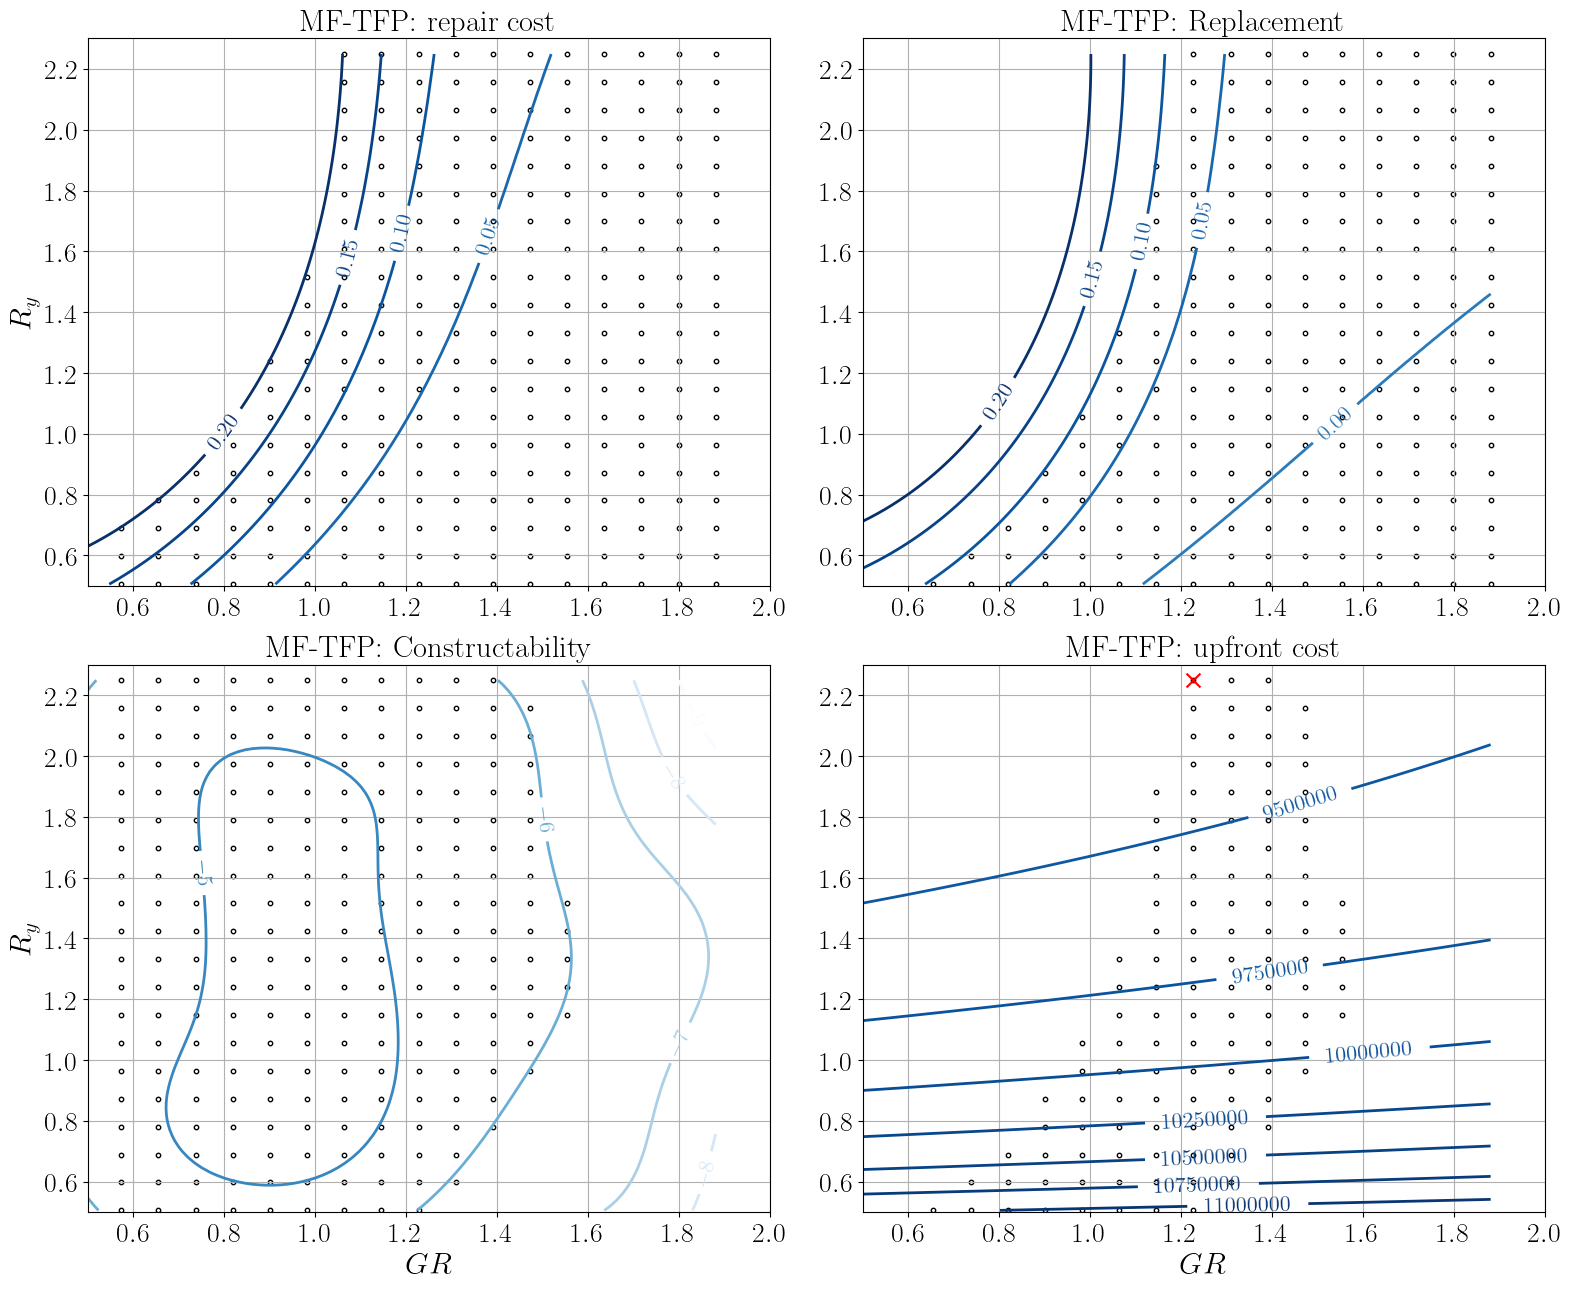

In [36]:

### regular
ns = 4
hs = 13.
nb = 6
Lb = 30.

config_dict_moderate = {
    'num_stories': ns,
    'h_story': hs,
    'num_bays': nb,
    'num_frames': 2,
    'S_s': 2.2815,
    'L_bay': Lb,
    'S_1': 1.017,
    'h_bldg': hs*ns,
    'L_bldg': Lb*nb
    }

my_targets = {
    cost_var: 0.2,
    time_var: 0.2,
    'replacement_freq': 0.1,
    'constructability': -6.0}


plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=22
axis_font = 22
subt_font = 20
label_size = 20
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

fig = plt.figure(figsize=(16, 13))

#################################
xvar = 'gap_ratio'
yvar = 'RI'

# lvls = np.array([0.2])
lvls = np.arange(0.00, .25, 0.05)


####### MFs
res = 100
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.87, fourth_var_set = 0.23)

X_sc = make_2D_plotting_space(df_mf[covariate_list], 20, x_var=xvar, y_var=yvar, 
                            all_vars=covariate_list,
                            third_var_set = 2.87, fourth_var_set = 0.23)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)

## mf-TFP: cost
ax = fig.add_subplot(2, 2, 1)
# plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)

qual_cost = predict_DV(X_sc,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)
X_sc_qual_cost = X_sc[qual_cost[cost_var+'_pred'] < 0.2]
sc = ax.scatter(X_sc_qual_cost[xvar], X_sc_qual_cost[yvar], c='white', edgecolors='black', s=10)

Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5, levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.3])


ax.grid(visible=True)
ax.set_title(r'MF-TFP: repair cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

## mf-TFP: replacement
ax = fig.add_subplot(2, 2, 2)
# plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)


qual_cost = predict_DV(X_sc,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)
X_sc_qual_repl = X_sc[qual_cost[repl_var+'_pred'] < 0.1]
sc = ax.scatter(X_sc_qual_repl[xvar], X_sc_qual_repl[yvar], c='white', edgecolors='black', s=10)


Z = np.array(grid_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5, levels=lvls)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.3])


ax.grid(visible=True)
ax.set_title(r'MF-TFP: Replacement', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


## mf-TFP: constructability
ax = fig.add_subplot(2, 2, 3)
# plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))
lvl_kde = np.arange(-9, -2, 1)
kde_scr = mdl_impact_mf_tfp.kde.score_samples(X_plot)

qual_cost = mdl_impact_mf_tfp.kde.score_samples(X_sc)
X_sc_qual_kde = X_sc[qual_cost > -6.1]
sc = ax.scatter(X_sc_qual_kde[xvar], X_sc_qual_kde[yvar], c='white', edgecolors='black', s=10)

Z = np.array(kde_scr)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', levels=lvl_kde)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.3])


ax.grid(visible=True)
ax.set_title(r'MF-TFP: Constructability', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)


## mf-TFP: cost
ax = fig.add_subplot(2, 2, 4)
# plt.setp(ax, xticks=np.arange(2.0, 11.0, step=1.0))


all_upfront_costs  = calc_upfront_cost(
    X_plot, config_dict=config_dict_moderate, steel_cost_dict=reg_dict)

mf_upfront_cost = all_upfront_costs['total_mf']


X_sc_qual = X_sc[np.logical_and.reduce((
        X_sc.index.isin(X_sc_qual_cost.index), 
        X_sc.index.isin(X_sc_qual_repl.index),
        X_sc.index.isin(X_sc_qual_kde.index)))]
sc = ax.scatter(X_sc_qual[xvar], X_sc_qual[yvar], c='white', edgecolors='black', s=10)

qual_upfront_cost  = calc_upfront_cost(
    X_sc_qual, config_dict=config_dict_moderate, steel_cost_dict=reg_dict)

cheapest_idx = qual_upfront_cost['total_mf'].idxmin()

# least upfront cost of the viable designs
the_design = X_sc_qual.loc[cheapest_idx]

ax.scatter(the_design[xvar], the_design[yvar], marker='x', c='red', s=100)

Z = np.array(mf_upfront_cost)
Z_cont = Z.reshape(xx_pl.shape)

cs = ax.contour(xx_pl, yy_pl, Z_cont, linewidths=2.0, cmap='Blues', vmin=-0.5)

clabels = ax.clabel(cs, fontsize=clabel_size)
ax.set_xlim([0.5, 2.0])
ax.set_ylim([0.5, 2.3])


ax.grid(visible=True)
ax.set_title(r'MF-TFP: upfront cost', fontsize=title_font)
# ax.set_title(r'$T_M/T_{fb}= 3.0$ , $\zeta_M = 0.20$', fontsize=title_font)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)

fig.tight_layout()

## Inv design for targets

### Targets

In [37]:
### regular
ns = 4
hs = 13.
nb = 6
Lb = 30.

config_dict_moderate = {
    'num_stories': ns,
    'h_story': hs,
    'num_bays': nb,
    'num_frames': 2,
    'S_s': 2.2815,
    'L_bay': Lb,
    'S_1': 1.017,
    'h_bldg': hs*ns,
    'L_bldg': Lb*nb
    }


# for hi_constr, switch constructability to -5.0
my_targets = {
    cost_var: 0.2,
    time_var: 0.2,
    'replacement_freq': 0.1,
    'constructability': -6.0}

### strict
ns = 4
hs = 13.
nb = 6
Lb = 30.

config_dict_strict = {
    'num_stories': ns,
    'h_story': hs,
    'num_bays': nb,
    'num_frames': 2,
    'S_s': 2.2815,
    'L_bay': Lb,
    'S_1': 1.017,
    'h_bldg': hs*ns,
    'L_bldg': Lb*nb
    }

### MF-TFP moderate

In [38]:
mf_tfp_inv_design, mf_tfp_inv_performance, mf_tfp_space = grid_search_inverse_design(
    20, 'mf_tfp', my_targets, config_dict_moderate, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

print ('======== designing moderate structures ==========')
my_design = mf_tfp_inv_design.copy()
my_design['superstructure_system'] = 'MF'
my_design['isolator_system'] = 'TFP'
my_design['k_ratio'] = 10

mf_tfp_dict = my_design.to_dict()

# for TFPs, we'll readjust T_ratio by x1/0.9, since the design -> analysis process will
# change T_m by x0.9
# since in the design script, GR is applied on the unadjusted T, we'll need to adjust
# the specified GR by x0.9
mf_tfp_dict['T_ratio'] = mf_tfp_dict['T_ratio']/0.9
mf_tfp_dict['gap_ratio'] = mf_tfp_dict['gap_ratio']*0.9

ida_mf_tfp_df = prepare_ida_util(mf_tfp_dict, db_string='../../resource/',
                                 config_dict=config_dict_moderate)

print('Length of MF-TFP IDA:', len(ida_mf_tfp_df))


# with open('../inputs/mf_tfp_moderate_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(mf_tfp_dict))
#     file.close()
    
# with open('../inputs/mf_tfp_moderate_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_moderate))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 2.033 s
GPC-GPR downtime prediction for 160000 inputs in 2.022 s
GPC-GPR replacement prediction for 160000 inputs in 2.037 s
KDE constructability prediction for 160000 inputs in 1.238 s
            Predictions           
======= Targets =======
System: mf_tfp
Repair cost fraction: 20.00%
Repair time fraction: 20.00%
Replacement risk: 10.00%
======= Overall inverse design =======
gap_ratio    1.239889
RI           2.250000
T_ratio      3.047091
zeta_e       0.234211
Name: 156537, dtype: float64
Upfront cost of selected design:  $9,340,999.02
Predicted median repair cost ratio:  11.79%
Predicted repair time ratio:  12.71%
Predicted replacement risk:  7.77%
======== designing moderate structures ==========
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 moment frames in 0.06 s
Length of MF-TFP IDA: 81


### MF-LRB moderate

In [39]:

mf_lrb_inv_design, mf_lrb_inv_performance, mf_lrb_space = grid_search_inverse_design(
    20, 'mf_lrb', my_targets, config_dict_moderate, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

my_design = mf_lrb_inv_design.copy()
my_design['superstructure_system'] = 'MF'
my_design['isolator_system'] = 'LRB'
my_design['k_ratio'] = 10

mf_lrb_dict = my_design.to_dict()

ida_mf_lrb_df = prepare_ida_util(mf_lrb_dict, db_string='../../resource/',
                                 config_dict=config_dict_moderate)

print('Length of MF-LRB IDA:', len(ida_mf_lrb_df))

# with open('../inputs/mf_lrb_moderate_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(mf_lrb_dict))
#     file.close()
    
# with open('../inputs/mf_lrb_moderate_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_moderate))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 1.979 s
GPC-GPR downtime prediction for 160000 inputs in 2.014 s
GPC-GPR replacement prediction for 160000 inputs in 2.007 s
KDE constructability prediction for 160000 inputs in 1.243 s
            Predictions           
======= Targets =======
System: mf_lrb
Repair cost fraction: 20.00%
Repair time fraction: 20.00%
Replacement risk: 10.00%
======= Overall inverse design =======
gap_ratio    1.298061
RI           1.144737
T_ratio      2.498615
zeta_e       0.197645
Name: 63292, dtype: float64
Upfront cost of selected design:  $10,000,217.62
Predicted median repair cost ratio:  10.67%
Predicted repair time ratio:  12.21%
Predicted replacement risk:  9.71%
Designs completed for 1 LRBs in 0.01 s
Designs completed for 1 moment frames in 0.04 s
Length of MF-LRB IDA: 96


### CBF-TFP moderate

In [40]:

cbf_tfp_inv_design, cbf_tfp_inv_performance, cbf_tfp_space = grid_search_inverse_design(
    20, 'cbf_tfp', my_targets, config_dict_moderate, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

my_design = cbf_tfp_inv_design.copy()
my_design['superstructure_system'] = 'CBF'
my_design['isolator_system'] = 'TFP'
my_design['k_ratio'] = 7

cbf_tfp_dict = my_design.to_dict()

# for TFPs, we'll readjust T_ratio by x1/0.9, since the design -> analysis process will
# change T_m by x0.9
# since in the design script, GR is applied on the unadjusted T, we'll need to adjust
# the specified GR by x0.9
cbf_tfp_dict['T_ratio'] = cbf_tfp_dict['T_ratio']/0.9
cbf_tfp_dict['gap_ratio'] = cbf_tfp_dict['gap_ratio']*0.9
    
ida_cbf_tfp_df = prepare_ida_util(cbf_tfp_dict, db_string='../../resource/',
                                 config_dict=config_dict_moderate)

print('Length of CBF-TFP IDA:', len(ida_cbf_tfp_df))

# with open('../inputs/cbf_tfp_moderate_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(cbf_tfp_dict))
#     file.close()
    
# with open('../inputs/cbf_tfp_moderate_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_moderate))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 1.961 s
GPC-GPR downtime prediction for 160000 inputs in 2.004 s
GPC-GPR replacement prediction for 160000 inputs in 2.004 s
KDE constructability prediction for 160000 inputs in 1.242 s
            Predictions           
======= Targets =======
System: cbf_tfp
Repair cost fraction: 20.00%
Repair time fraction: 20.00%
Replacement risk: 10.00%
======= Overall inverse design =======
gap_ratio    1.484211
RI           2.157895
T_ratio      5.739612
zeta_e       0.202632
Name: 149013, dtype: float64
Upfront cost of selected design:  $6,573,860.29
Predicted median repair cost ratio:  18.03%
Predicted repair time ratio:  18.34%
Predicted replacement risk:  9.77%
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 braced frames in 0.04 s
Length of CBF-TFP IDA: 90


### CBF-LRB moderate

In [41]:
# cbf_lrb_targets_moderate = {
#     cost_var: 0.2,
#     time_var: 0.2,
#     'replacement_freq': 0.1,
#     'constructability': -5.7}

cbf_lrb_inv_design, cbf_lrb_inv_performance, cbf_lrb_space = grid_search_inverse_design(
    20, 'cbf_lrb', my_targets, config_dict_moderate, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

my_design = cbf_lrb_inv_design.copy()
my_design['superstructure_system'] = 'CBF'
my_design['isolator_system'] = 'LRB'
my_design['k_ratio'] = 10

cbf_lrb_dict = my_design.to_dict()

ida_cbf_lrb_df = prepare_ida_util(cbf_lrb_dict, db_string='../../resource/',
                                 config_dict=config_dict_moderate)

# with open('../inputs/cbf_lrb_moderate_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(cbf_lrb_dict))
#     file.close()
    
# with open('../inputs/cbf_lrb_moderate_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_moderate))
#     file.close()
    
print('Length of CBF-LRB IDA:', len(ida_cbf_lrb_df))


GPC-GPR repair cost prediction for 160000 inputs in 2.033 s
GPC-GPR downtime prediction for 160000 inputs in 2.204 s
GPC-GPR replacement prediction for 160000 inputs in 2.141 s
KDE constructability prediction for 160000 inputs in 1.306 s
            Predictions           
======= Targets =======
System: cbf_lrb
Repair cost fraction: 20.00%
Repair time fraction: 20.00%
Replacement risk: 10.00%
======= Overall inverse design =======
gap_ratio    1.468698
RI           2.250000
T_ratio      4.542936
zeta_e       0.242936
Name: 157738, dtype: float64
Upfront cost of selected design:  $6,571,483.33
Predicted median repair cost ratio:  15.39%
Predicted repair time ratio:  15.86%
Predicted replacement risk:  9.71%
Designs completed for 1 LRBs in 0.00 s
Designs completed for 1 braced frames in 0.04 s
Length of CBF-LRB IDA: 99


### MF-TFP enhanced

In [42]:
mf_tfp_targets_enhanced = {
    cost_var: 0.1,
    time_var: 0.1,
    'replacement_freq': 0.05,
    'constructability': -6}

mf_tfp_strict_design, mf_tfp_strict_performance, mf_tfp_strict_space = grid_search_inverse_design(
    20, 'mf_tfp', mf_tfp_targets_enhanced, config_dict_strict, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

print ('======== designing enhanced structures ==========')
my_design = mf_tfp_strict_design.copy()
my_design['superstructure_system'] = 'MF'
my_design['isolator_system'] = 'TFP'
my_design['k_ratio'] = 10

mf_tfp_dict_strict = my_design.to_dict()

# for TFPs, we'll readjust T_ratio by x1/0.9, since the design -> analysis process will
# change T_m by x0.9
# since in the design script, GR is applied on the unadjusted T, we'll need to adjust
# the specified GR by x0.9
mf_tfp_dict_strict['T_ratio'] = mf_tfp_dict_strict['T_ratio']/0.9
mf_tfp_dict_strict['gap_ratio'] = mf_tfp_dict_strict['gap_ratio']*0.9

ida_mf_tfp_df_strict = prepare_ida_util(mf_tfp_dict_strict, db_string='../../resource/',
                                 config_dict=config_dict_strict)

print('Length of MF-TFP IDA:', len(ida_mf_tfp_df_strict))

# with open('../inputs/mf_tfp_enhanced_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(mf_tfp_dict_strict))
#     file.close()
    
# with open('../inputs/mf_tfp_enhanced_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_strict))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 2.110 s
GPC-GPR downtime prediction for 160000 inputs in 2.125 s
GPC-GPR replacement prediction for 160000 inputs in 2.190 s
KDE constructability prediction for 160000 inputs in 1.354 s
            Predictions           
======= Targets =======
System: mf_tfp
Repair cost fraction: 10.00%
Repair time fraction: 10.00%
Replacement risk: 5.00%
======= Overall inverse design =======
gap_ratio    1.356233
RI           2.250000
T_ratio      3.047091
zeta_e       0.226316
Name: 157336, dtype: float64
Upfront cost of selected design:  $9,362,137.90
Predicted median repair cost ratio:  7.78%
Predicted repair time ratio:  8.71%
Predicted replacement risk:  3.97%
======== designing enhanced structures ==========
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 moment frames in 0.05 s
Length of MF-TFP IDA: 81


### MF-LRB enhanced

In [43]:
mf_lrb_targets_enhanced = {
    cost_var: 0.1,
    time_var: 0.1,
    'replacement_freq': 0.05,
    'constructability': -6.5}

mf_lrb_strict_design, mf_lrb_strict_performance, mf_lrb_strict_space = grid_search_inverse_design(
    20, 'mf_lrb', mf_lrb_targets_enhanced, config_dict_strict, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')


GPC-GPR repair cost prediction for 160000 inputs in 2.207 s
GPC-GPR downtime prediction for 160000 inputs in 2.191 s
GPC-GPR replacement prediction for 160000 inputs in 2.165 s
KDE constructability prediction for 160000 inputs in 1.311 s
            Predictions           
======= Targets =======
System: mf_lrb
Repair cost fraction: 10.00%
Repair time fraction: 10.00%
Replacement risk: 5.00%
======= Overall inverse design =======
gap_ratio    1.592798
RI           1.144737
T_ratio      2.872576
zeta_e       0.186842
Name: 62511, dtype: float64
Upfront cost of selected design:  $9,938,247.15
Predicted median repair cost ratio:  6.10%
Predicted repair time ratio:  7.25%
Predicted replacement risk:  4.91%


In [44]:

from db import prepare_ida_util
import json

my_design = mf_lrb_strict_design.copy()
my_design['superstructure_system'] = 'MF'
my_design['isolator_system'] = 'LRB'
my_design['k_ratio'] = 10

mf_lrb_dict_strict = my_design.to_dict()

ida_mf_lrb_df_strict = prepare_ida_util(mf_lrb_dict_strict, db_string='../../resource/',
                                 config_dict=config_dict_strict)

print('Length of MF-LRB IDA:', len(ida_mf_lrb_df_strict))

# with open('../inputs/mf_lrb_enhanced_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(mf_lrb_dict_strict))
#     file.close()
    

# with open('../inputs/mf_lrb_enhanced_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_strict))
#     file.close()   

Designs completed for 1 LRBs in 0.00 s
Designs completed for 1 LRBs in 0.01 s
Designs completed for 1 moment frames in 0.05 s
Length of MF-LRB IDA: 87


### CBF-TFP enhanced

In [45]:
cbf_tfp_targets_enhanced = {
    cost_var: 0.1,
    time_var: 0.1,
    'replacement_freq': 0.05,
    'constructability': -7.0}

cbf_tfp_strict_design, cbf_tfp_strict_performance, cbf_tfp_strict_space = grid_search_inverse_design(
    20, 'cbf_tfp', cbf_tfp_targets_enhanced, config_dict_strict, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

my_design = cbf_tfp_strict_design.copy()
my_design['superstructure_system'] = 'CBF'
my_design['isolator_system'] = 'TFP'
my_design['k_ratio'] = 10

cbf_tfp_dict_strict = my_design.to_dict()

# for TFPs, we'll readjust T_ratio by x1/0.9, since the design -> analysis process will
# change T_m by x0.9
# since in the design script, GR is applied on the unadjusted T, we'll need to adjust
# the specified GR by x0.9
cbf_tfp_dict_strict['T_ratio'] = cbf_tfp_dict_strict['T_ratio']/0.9
cbf_tfp_dict_strict['gap_ratio'] = cbf_tfp_dict_strict['gap_ratio']*0.9
    
ida_cbf_tfp_df_strict = prepare_ida_util(cbf_tfp_dict_strict, db_string='../../resource/',
                                 config_dict=config_dict_strict)

print('Length of CBF-TFP IDA:', len(ida_cbf_tfp_df_strict))

# with open('../inputs/cbf_tfp_enhanced_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(cbf_tfp_dict_strict))
#     file.close()

# with open('../inputs/cbf_tfp_enhanced_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_strict))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 2.085 s
GPC-GPR downtime prediction for 160000 inputs in 2.165 s
GPC-GPR replacement prediction for 160000 inputs in 2.156 s
KDE constructability prediction for 160000 inputs in 1.330 s
            Predictions           
======= Targets =======
System: cbf_tfp
Repair cost fraction: 10.00%
Repair time fraction: 10.00%
Replacement risk: 5.00%
======= Overall inverse design =======
gap_ratio    1.705263
RI           2.157895
T_ratio      6.487535
zeta_e       0.163158
Name: 150208, dtype: float64
Upfront cost of selected design:  $6,628,759.26
Predicted median repair cost ratio:  9.29%
Predicted repair time ratio:  9.65%
Predicted replacement risk:  4.72%
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 TFPs in 0.00 s
Designs completed for 1 braced frames in 0.04 s
Length of CBF-TFP IDA: 81


### CBF-LRB enhanced

In [46]:

cbf_lrb_targets_enhanced = {
    cost_var: 0.1,
    time_var: 0.1,
    'replacement_freq': 0.05,
    'constructability': -5.7}

cbf_lrb_strict_design, cbf_lrb_strict_performance, cbf_lrb_strict_space = grid_search_inverse_design(
    20, 'cbf_lrb', cbf_lrb_targets_enhanced, config_dict_strict, 
    impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls,
    cost_var='cmp_cost_ratio', time_var='cmp_time_ratio')

from db import prepare_ida_util
import json

my_design = cbf_lrb_strict_design.copy()
my_design['superstructure_system'] = 'CBF'
my_design['isolator_system'] = 'LRB'
my_design['k_ratio'] = 10

cbf_lrb_dict_strict = my_design.to_dict()

ida_cbf_lrb_df_strict = prepare_ida_util(cbf_lrb_dict_strict, db_string='../../resource/',
                                 config_dict=config_dict_strict)

print('Length of CBF-LRB IDA:', len(ida_cbf_lrb_df_strict))

# with open('../inputs/cbf_lrb_enhanced_spectracomments_fixededp.in', 'w') as file:
#     file.write(json.dumps(cbf_lrb_dict_strict))
#     file.close()
    

# with open('../inputs/cbf_lrb_enhanced_spectracomments_fixededp.cfg', 'w') as file:
#     file.write(json.dumps(config_dict_strict))
#     file.close()

GPC-GPR repair cost prediction for 160000 inputs in 2.096 s
GPC-GPR downtime prediction for 160000 inputs in 2.238 s
GPC-GPR replacement prediction for 160000 inputs in 2.211 s
KDE constructability prediction for 160000 inputs in 1.340 s
            Predictions           
======= Targets =======
System: cbf_lrb
Repair cost fraction: 10.00%
Repair time fraction: 10.00%
Replacement risk: 5.00%
======= Overall inverse design =======
gap_ratio    1.647091
RI           1.236842
T_ratio      4.343490
zeta_e       0.223407
Name: 71315, dtype: float64
Upfront cost of selected design:  $6,838,504.83
Predicted median repair cost ratio:  9.26%
Predicted repair time ratio:  9.96%
Predicted replacement risk:  4.37%
Designs completed for 1 LRBs in 0.00 s
Designs completed for 1 braced frames in 0.04 s
Length of CBF-LRB IDA: 99


# Validation

## Load and process

In [47]:

def process_results(run_case):
    
    import numpy as np
    # load in validation and max run
    val_dir = '../../data/validation/'+run_case+'/'
    
    loss_file = run_case+'_loss.pickle'
    max_loss_file = run_case+'_max_loss.pickle'
    
    val_obj = pd.read_pickle(val_dir+loss_file)
    ida_results_df = val_obj.ida_results.reset_index(drop=True)
    loss_results_df = val_obj.loss_data.reset_index(drop=True)
    
    val_max_obj = pd.read_pickle(val_dir+max_loss_file)
    max_loss_results_df = val_max_obj.max_loss.reset_index(drop=True)
    
    # calculate loss ratios
    ida_results_df = loss_percentages(
        ida_results_df, loss_results_df, max_loss_results_df)
    
    # print out the results
    ida_levels = [1.0, 1.5, 2.0]

    val_cost  = np.zeros((3,))
    val_replacement = np.zeros((3,))
    val_cost_ratio = np.zeros((3,))
    val_downtime_ratio = np.zeros((3,))
    val_downtime = np.zeros((3,))
    impact_freq = np.zeros((3,))
    struct_cost = np.zeros((3,))
    nsc_cost = np.zeros((3,))
    gap_ratios = np.zeros((3,))
    T_ratios = np.zeros((3,))
    
    GR_adjs = np.zeros((3,))
    
    isolator_system = run_case.split('_')[1]
    
    # collect variable: currently working with means of medians
    cost_var_ida = 'cost_50%'
    time_var_ida = 'time_l_50%'
    
    cost_var = 'cmp_cost_ratio'
    time_var = 'cmp_time_ratio'
    
    for i, lvl in enumerate(ida_levels):
        val_ida = ida_results_df[ida_results_df['ida_level']==lvl]
        # print(val_ida.shape)
        loss_ida = loss_results_df[ida_results_df['ida_level']==lvl]
        
        val_replacement[i] = val_ida['replacement_freq'].mean()
        val_cost[i] = loss_ida[cost_var_ida].mean()
        val_cost_ratio[i] = val_ida[cost_var].mean()
        val_downtime[i] = loss_ida[time_var_ida].mean()
        val_downtime_ratio[i] = val_ida[time_var].mean()
        impact_freq[i] = val_ida['impacted'].mean()
        struct_cost[i] = val_ida['B_50%'].mean()
        nsc_cost[i] = val_ida['C_50%'].mean() + val_ida['D_50%'].mean() + val_ida['E_50%'].mean() 
            
        
        zetaRef = [0.02, 0.05, 0.10, 0.20, 0.30, 0.40, 0.50]
        BmRef   = [0.8, 1.0, 1.2, 1.5, 1.7, 1.9, 2.0]
        Bm = np.interp(val_ida['zeta_e'], zetaRef, BmRef)
        
        if isolator_system == 'tfp':
            T_shifted = np.mean(val_ida['T_m']*0.9)
        else:
            T_shifted = np.mean(val_ida['T_m'])
            
        sa_tm_adj = val_ida.apply(
            lambda x: get_ST(x, T_shifted,
                              db_dir='../../resource/ground_motions/gm_db.csv',
                              spec_dir='../../resource/ground_motions/gm_spectra.csv'), 
            axis=1)
        
        gap_ratios_all = (val_ida['constructed_moat']*4*pi**2)/ \
            (g*(val_ida['sa_tm']/Bm)*val_ida['T_m']**2)
        gap_ratios[i] = gap_ratios_all.mean()
        
        GR_adj = (val_ida['constructed_moat']*4*pi**2)/ \
            (g*(sa_tm_adj/Bm)*T_shifted**2)
        GR_adjs[i] = GR_adj.mean()
            
        T_ratio_adj = T_shifted / val_ida['T_fbe'].mean()
        
        T_ratios[i] = T_shifted / val_ida['T_fb'].mean()
        
    # print(T_shifted)
    # print(GR_adjs)
    # print(T_ratio_adj)
    # print(T_ratios)
    
    
    design_list = []
    ss_sys = ida_results_df['superstructure_system'].iloc[0]
    iso_sys = ida_results_df['isolator_system'].iloc[0]
    if ss_sys == 'CBF':
        design_list.extend(['beam', 'column', 'brace'])
    else:
        design_list.extend(['beam', 'column'])
    if iso_sys == 'LRB':
        design_list.extend(['d_bearing', 'd_lead', 't_r', 'n_layers'])
    else:
        design_list.extend(['mu_1', 'mu_2', 'R_1', 'R_2'])
        
    
    sys_name = ss_sys+'-'+iso_sys
    
    # design_tested = ida_results_df[['moat_ampli', 'RI', 'T_ratio' , 'zeta_e']].iloc[0]
    # design_specifics = ida_results_df[design_list].iloc[0]
    # print('==================================')
    # print('   Validation results  (1.0 MCE)  ')
    # print('==================================')
    
    # print('System:', ss_sys+'-'+iso_sys)
    # print('Average median repair cost: ',
    #       f'${val_cost[0]:,.2f}')
    # print('Repair cost ratio: ', 
    #       f'{val_cost_ratio[0]:,.3f}')
    # print('Repair time ratio: ',
    #       f'{val_downtime_ratio[0]:,.3f}')
    # print('Estimated replacement frequency: ',
    #       f'{val_replacement[0]:.2%}')
    # print(design_tested)
    # print(design_specifics)
    
    latex_string = f"& {sys_name} & {val_cost_ratio[0]:.3f} & {val_cost_ratio[1]:.3f} & {val_cost_ratio[2]:.3f} \
        & {val_downtime_ratio[0]:.3f} & {val_downtime_ratio[1]:.3f} & {val_downtime_ratio[2]:.3f} \
            & {val_replacement[0]:.3f} & {val_replacement[1]:.3f} & {val_replacement[2]:.3f} \\\\"
    
    print(latex_string)  
    
    
    # n_workers = (ida_results_df['bldg_area']/1000).mean()

    # print('Cost total:', ida_results_df['total_cmp_cost'].mean()/1e6)
    # print('Time total:', ida_results_df['total_cmp_time'].mean()/n_workers)
    
    # print('GR:', gap_ratios)
    # print('TR:', T_ratios)
    # print('Impact:', impact_freq)
    # print('Structural cost:', struct_cost/1e6)
    # print('Non-structural cost:', nsc_cost/1e6)
    
    
    # latex_string = f"& {sys_name} & {mce_cost_ratio:.3f} & {mce_time_ratio:.3f} & {mce_repl_ratio:.3f} \
    #     & {val_cost_ratio[0]:.2f} & {GP_time_ratio:.2f} & {GP_repl_risk:.2f} &  \${upfront_cost/1e6:.2f} M \\\\"
    
    return(ida_results_df, val_replacement, val_cost, 
           val_cost_ratio, val_downtime, val_downtime_ratio)

(mf_tfp_val_results, mf_tfp_val_repl, mf_tfp_val_cost, mf_tfp_val_cost_ratio, 
 mf_tfp_val_downtime, mf_tfp_val_downtime_ratio) = process_results('mf_tfp_moderate_spectracomments_fixededp')
(mf_lrb_val_results, mf_lrb_val_repl, mf_lrb_val_cost, mf_lrb_val_cost_ratio, 
 mf_lrb_val_downtime, mf_lrb_val_downtime_ratio) = process_results('mf_lrb_moderate_spectracomments_fixededp')
(cbf_tfp_val_results, cbf_tfp_val_repl, cbf_tfp_val_cost, cbf_tfp_val_cost_ratio, 
 cbf_tfp_val_downtime, cbf_tfp_val_downtime_ratio) = process_results('cbf_tfp_moderate_spectracomments_fixededp')
(cbf_lrb_val_results, cbf_lrb_val_repl, cbf_lrb_val_cost, cbf_lrb_val_cost_ratio, 
 cbf_lrb_val_downtime, cbf_lrb_val_downtime_ratio) = process_results('cbf_lrb_moderate_spectracomments_fixededp')

(mf_tfp_strict_results, mf_tfp_strict_repl, mf_tfp_strict_cost, mf_tfp_strict_cost_ratio, 
 mf_tfp_strict_downtime, mf_tfp_strict_downtime_ratio) = process_results('mf_tfp_enhanced_spectracomments_fixededp')
(mf_lrb_strict_results, mf_lrb_strict_repl, mf_lrb_strict_cost, mf_lrb_strict_cost_ratio, 
 mf_lrb_strict_downtime, mf_lrb_strict_downtime_ratio) = process_results('mf_lrb_enhanced_spectracomments_fixededp')
(cbf_tfp_strict_results, cbf_tfp_strict_repl, cbf_tfp_strict_cost, cbf_tfp_strict_cost_ratio, 
 cbf_tfp_strict_downtime, cbf_tfp_strict_downtime_ratio) = process_results('cbf_tfp_enhanced_spectracomments_fixededp')
(cbf_lrb_strict_results, cbf_lrb_strict_repl, cbf_lrb_strict_cost, cbf_lrb_strict_cost_ratio, 
 cbf_lrb_strict_downtime, cbf_lrb_strict_downtime_ratio) = process_results('cbf_lrb_enhanced_spectracomments_fixededp')

& MF-TFP & 0.037 & 0.509 & 0.930         & 0.051 & 0.517 & 0.931             & 0.004 & 0.480 & 0.927 \\
& MF-LRB & 0.108 & 0.443 & 0.827         & 0.115 & 0.480 & 0.834             & 0.102 & 0.430 & 0.808 \\
& CBF-TFP & 0.167 & 0.755 & 0.948         & 0.168 & 0.756 & 0.946             & 0.104 & 0.718 & 0.936 \\
& CBF-LRB & 0.211 & 0.645 & 0.904         & 0.215 & 0.650 & 0.917             & 0.148 & 0.575 & 0.895 \\
& MF-TFP & 0.037 & 0.474 & 0.895         & 0.050 & 0.483 & 0.896             & 0.002 & 0.460 & 0.889 \\
& MF-LRB & 0.048 & 0.326 & 0.665         & 0.056 & 0.336 & 0.672             & 0.034 & 0.312 & 0.654 \\
& CBF-TFP & 0.086 & 0.641 & 0.845         & 0.091 & 0.640 & 0.843             & 0.042 & 0.593 & 0.836 \\
& CBF-LRB & 0.105 & 0.406 & 0.865         & 0.108 & 0.405 & 0.864             & 0.091 & 0.359 & 0.828 \\


In [48]:
print(cbf_tfp_strict_results.shape)
print(cbf_lrb_strict_results.shape)

(81, 78)
(99, 82)


In [49]:

def print_latex_inverse_table(sys_name, design_dict, performance_dict):

    
    GR = design_dict['gap_ratio']
    Ry = design_dict['RI']
    T_ratio = design_dict['T_ratio'] # this is the "designed" value
    zeta = design_dict['zeta_e']
    GP_cost_ratio = performance_dict['cost']
    GP_time_ratio = performance_dict['time']
    GP_repl_risk = performance_dict['replacement_freq']
    upfront_cost = performance_dict['upfront_cost']
    
    
    latex_string = f"& {sys_name} & {GR:.2f} & {Ry:.2f} & {T_ratio:.2f} & {zeta:.2f} \
        & {GP_cost_ratio:.3f} & {GP_time_ratio:.3f} & {GP_repl_risk:.3f} &  \${upfront_cost/1e6:.2f} M \\\\"
    print(latex_string)
    return

print_latex_inverse_table('MF-TFP', mf_tfp_inv_design, mf_tfp_inv_performance)   
print_latex_inverse_table('MF-LRB', mf_lrb_inv_design, mf_lrb_inv_performance)   
print_latex_inverse_table('CBF-TFP', cbf_tfp_inv_design, cbf_tfp_inv_performance)   
print_latex_inverse_table('CBF-LRB', cbf_lrb_inv_design, cbf_lrb_inv_performance)   

print_latex_inverse_table('MF-TFP', mf_tfp_strict_design, mf_tfp_strict_performance)   
print_latex_inverse_table('MF-LRB', mf_lrb_strict_design, mf_lrb_strict_performance)   
print_latex_inverse_table('CBF-TFP', cbf_tfp_strict_design, cbf_tfp_strict_performance)   
print_latex_inverse_table('CBF-LRB', cbf_lrb_strict_design, cbf_lrb_strict_performance)   

print()

def print_latex_design_table(sys_name, val_results):

    typ_design = val_results.iloc[0]
    
    # moat in cm
    moat = typ_design['constructed_moat']*2.54
    largest_beam = typ_design['beam'][0]
    largest_column = typ_design['column'][0]
    try:
        largest_brace = typ_design['brace'][0]
    except:
        largest_brace = 'n/a'
    
    # d bearings in cm, R curvature in mm
    try:
        bearing_param_1 = typ_design['mu_1']
    except:
        bearing_param_1 = typ_design['d_lead']*2.54
        
    try:
        bearing_param_2 = typ_design['mu_2']
    except:
        bearing_param_2 = typ_design['d_bearing'] *2.54
        
    try:
        bearing_param_3 = typ_design['R_1']*25.4
    except:
        bearing_param_3 = typ_design['t_r']* 2.54
        
    # print as either TFP or LRB
    try:
        bearing_param_4 = typ_design['R_2']*25.4
        latex_string = f"& {sys_name} & {moat:.1f} cm & {largest_beam} & {largest_column} & {largest_brace} \
            & {bearing_param_1:.3f} & {bearing_param_2:.3f} & {bearing_param_3:.0f} mm &  {bearing_param_4:.0f} mm \\\\"
    except:
        bearing_param_4 = typ_design['n_layers'] 
        latex_string = f"& {sys_name} & {moat:.1f} cm & {largest_beam} & {largest_column} & {largest_brace} \
            & {bearing_param_1:.1f} cm & {bearing_param_2:.1f} cm & {bearing_param_3:.1f} cm &  {bearing_param_4:.0f}  \\\\"
    
    # print('Average median repair cost: ',
    #       f'${val_cost[0]:,.2f}')
    # print('Repair cost ratio: ', 
    #       f'{val_cost_ratio[0]:,.3f}')
    # print('Repair time ratio: ',
    #       f'{val_downtime_ratio[0]:,.3f}')
    # print('Estimated replacement frequency: ',
    #       f'{val_replacement[0]:.2%}')
    
    
    print(latex_string)
    return

print_latex_design_table('MF-TFP', mf_tfp_val_results)
print_latex_design_table('CBF-TFP', cbf_tfp_val_results)
print_latex_design_table('MF-TFP', mf_tfp_strict_results)
print_latex_design_table('CBF-TFP', cbf_tfp_strict_results)

print_latex_design_table('MF-LRB', mf_lrb_val_results)
print_latex_design_table('CBF-LRB', cbf_lrb_val_results)
print_latex_design_table('MF-LRB', mf_lrb_strict_results)
print_latex_design_table('CBF-LRB', cbf_lrb_strict_results)

& MF-TFP & 1.24 & 2.25 & 3.05 & 0.23         & 0.118 & 0.127 & 0.078 &  \$9.34 M \\
& MF-LRB & 1.30 & 1.14 & 2.50 & 0.20         & 0.107 & 0.122 & 0.097 &  \$10.00 M \\
& CBF-TFP & 1.48 & 2.16 & 5.74 & 0.20         & 0.180 & 0.183 & 0.098 &  \$6.57 M \\
& CBF-LRB & 1.47 & 2.25 & 4.54 & 0.24         & 0.154 & 0.159 & 0.097 &  \$6.57 M \\
& MF-TFP & 1.36 & 2.25 & 3.05 & 0.23         & 0.078 & 0.087 & 0.040 &  \$9.36 M \\
& MF-LRB & 1.59 & 1.14 & 2.87 & 0.19         & 0.061 & 0.073 & 0.049 &  \$9.94 M \\
& CBF-TFP & 1.71 & 2.16 & 6.49 & 0.16         & 0.093 & 0.096 & 0.047 &  \$6.63 M \\
& CBF-LRB & 1.65 & 1.24 & 4.34 & 0.22         & 0.093 & 0.100 & 0.044 &  \$6.84 M \\

& MF-TFP & 72.4 cm & W24X84 & W14X233 & n/a             & 0.036 & 0.068 & 699 mm &  3241 mm \\
& CBF-TFP & 77.6 cm & W33X141 & W12X106 & HSS8X8X1/4             & 0.030 & 0.076 & 527 mm &  2229 mm \\
& MF-TFP & 80.0 cm & W24X84 & W14X233 & n/a             & 0.029 & 0.066 & 572 mm &  3186 mm \\
& CBF-TFP & 109.1 cm & W33X1

## One time predictions

In [50]:
# two values differ
# GR should be different because real ground motion suite has different Sa than design spectrum
# T ratio should be different because actual T_fb is not perfectly equal to Tfbe

def one_time_pred(X_built, system_name, 
                        impact_clfs, cost_regs, time_regs, repl_regs):
    
    cost_var = 'cmp_cost_ratio'
    time_var = 'cmp_time_ratio'
    
    # identify cost models
    mdl_impact_name = 'mdl_impact_' + system_name
    mdl_cost_hit_name = 'mdl_cost_' + system_name + '_i'
    mdl_cost_miss_name = 'mdl_cost_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_cost_hit = cost_regs[mdl_cost_hit_name]
    mdl_cost_miss = cost_regs[mdl_cost_miss_name]
    
    # identify time models
    mdl_time_hit_name = 'mdl_time_' + system_name + '_i'
    mdl_time_miss_name = 'mdl_time_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_time_hit = time_regs[mdl_time_hit_name]
    mdl_time_miss = time_regs[mdl_time_miss_name]
    
    # identify replacement models
    mdl_repl_hit_name = 'mdl_repl_' + system_name + '_i'
    mdl_repl_miss_name = 'mdl_repl_' + system_name + '_o'
    
    mdl_impact = impact_clfs[mdl_impact_name]
    mdl_repl_hit = repl_regs[mdl_repl_hit_name]
    mdl_repl_miss = repl_regs[mdl_repl_miss_name]
    
    # assumes GPC/GPR, predict the outcome for the design space
    ab_repair_cost, ab_repair_cost_var = predict_DV(
        X_built, mdl_impact.gpc, mdl_cost_hit.gpr, mdl_cost_miss.gpr, 
        outcome=cost_var, return_var=True)
    
    ab_downtime, ab_downtime_var = predict_DV(
        X_built, mdl_impact.gpc, mdl_time_hit.gpr, mdl_time_miss.gpr, 
        outcome=time_var, return_var=True)
    
    ab_repl, ab_repl_var = predict_DV(
        X_built, mdl_impact.gpc, mdl_repl_hit.gpr, mdl_repl_miss.gpr,
        outcome='replacement_freq', return_var=True)
    try:
        ab_performance = {
            'time': ab_downtime.iloc[0][time_var+'_pred'],
            'cost': ab_repair_cost.iloc[0][cost_var+'_pred'],
            'replacement_freq': ab_repl.iloc[0]['replacement_freq'+'_pred'],
            'time_var': ab_downtime_var[0],
            'cost_var': ab_repair_cost_var[0],
            'replacement_freq_var': ab_repl_var[0]}
    except:
        ab_performance = {
            'time': ab_downtime.iloc[0][time_var+'_pred'],
            'cost': ab_repair_cost.iloc[0][cost_var+'_pred'],
            'replacement_freq': ab_repl.iloc[0]['replacement_freq'+'_pred'],
            'time_var': ab_downtime_var.iloc[0][time_var+'_pred'],
            'cost_var': ab_repair_cost_var.iloc[0][cost_var+'_pred'],
            'replacement_freq_var': ab_repl_var.iloc[0]['replacement_freq'+'_pred']}

    return(ab_performance)


mf_tfp_inv_pred = one_time_pred(
    pd.DataFrame(mf_tfp_inv_design).T, 'mf_tfp', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

mf_lrb_inv_pred = one_time_pred(
    pd.DataFrame(mf_lrb_inv_design).T, 'mf_lrb', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

cbf_tfp_inv_pred = one_time_pred(
    pd.DataFrame(cbf_tfp_inv_design).T, 'cbf_tfp', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)
 
cbf_lrb_inv_pred = one_time_pred(
    pd.DataFrame(cbf_lrb_inv_design).T, 'cbf_lrb', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

mf_tfp_strict_pred = one_time_pred(
    pd.DataFrame(mf_tfp_strict_design).T, 'mf_tfp', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

mf_lrb_strict_pred = one_time_pred(
    pd.DataFrame(mf_lrb_strict_design).T, 'mf_lrb', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

cbf_tfp_strict_pred = one_time_pred(
    pd.DataFrame(cbf_tfp_strict_design).T, 'cbf_tfp', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)
 
cbf_lrb_strict_pred = one_time_pred(
    pd.DataFrame(cbf_lrb_strict_design).T, 'cbf_lrb', impact_classification_mdls, cost_regression_mdls, 
    time_regression_mdls, repl_regression_mdls)

## MLE fragility curves

C:\Users\giraf\AppData\Local\Temp\ipykernel_27596\443972342.py:8: RuntimeWarning: divide by zero encountered in log
  log_likelihood = np.log(likelihood)


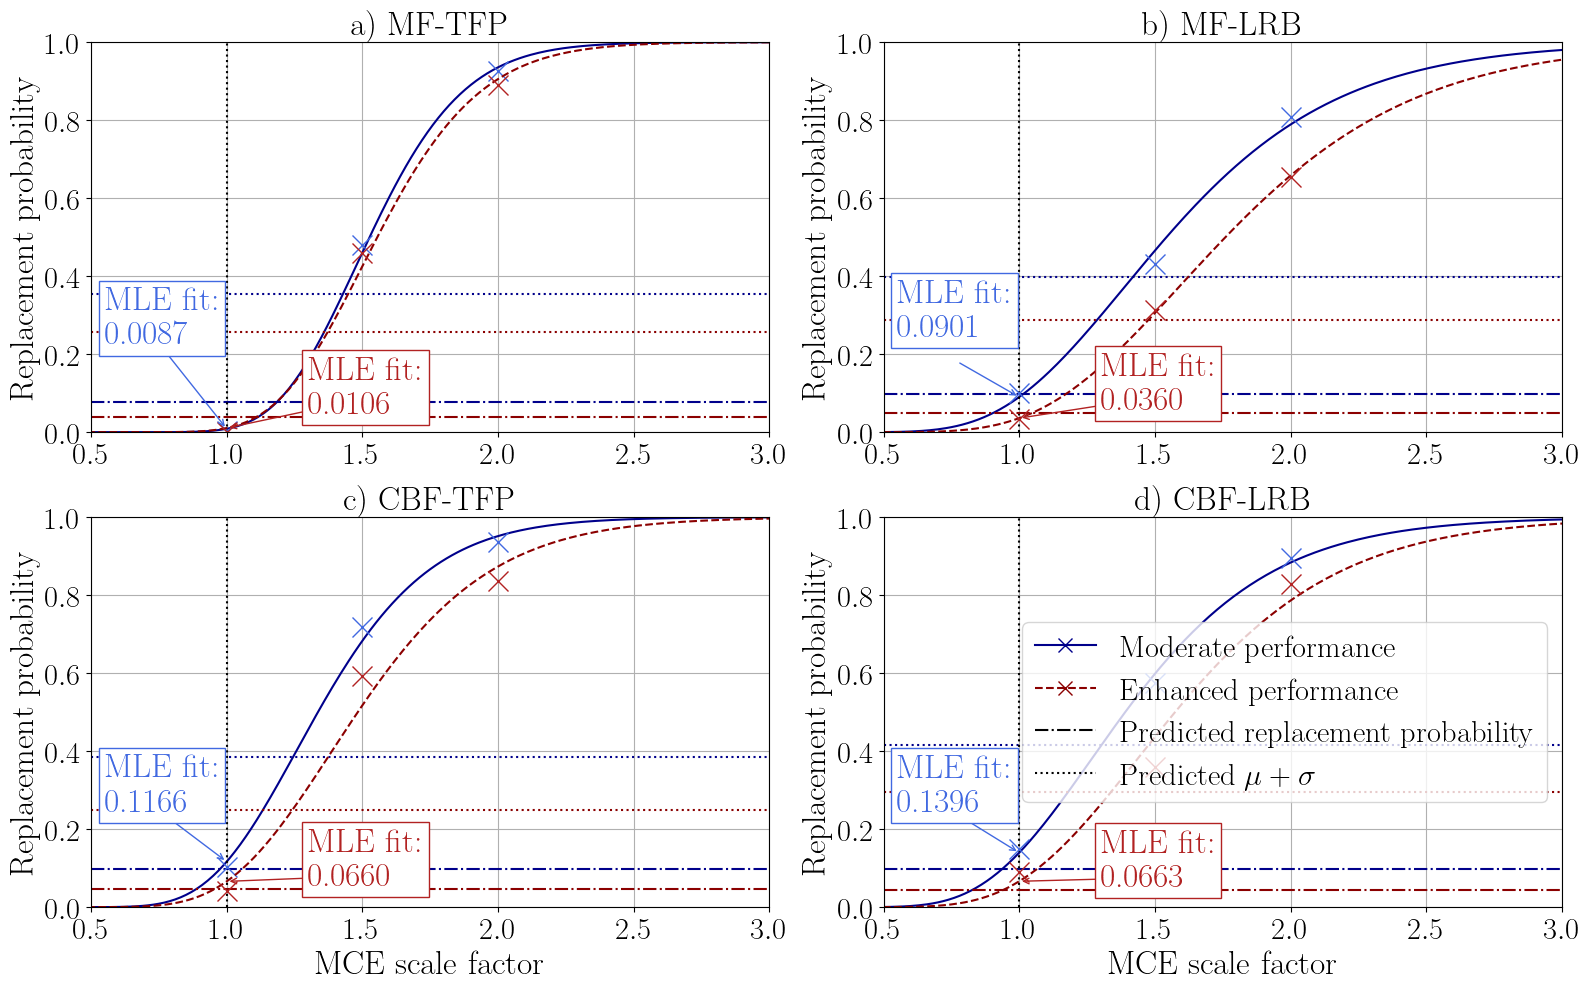

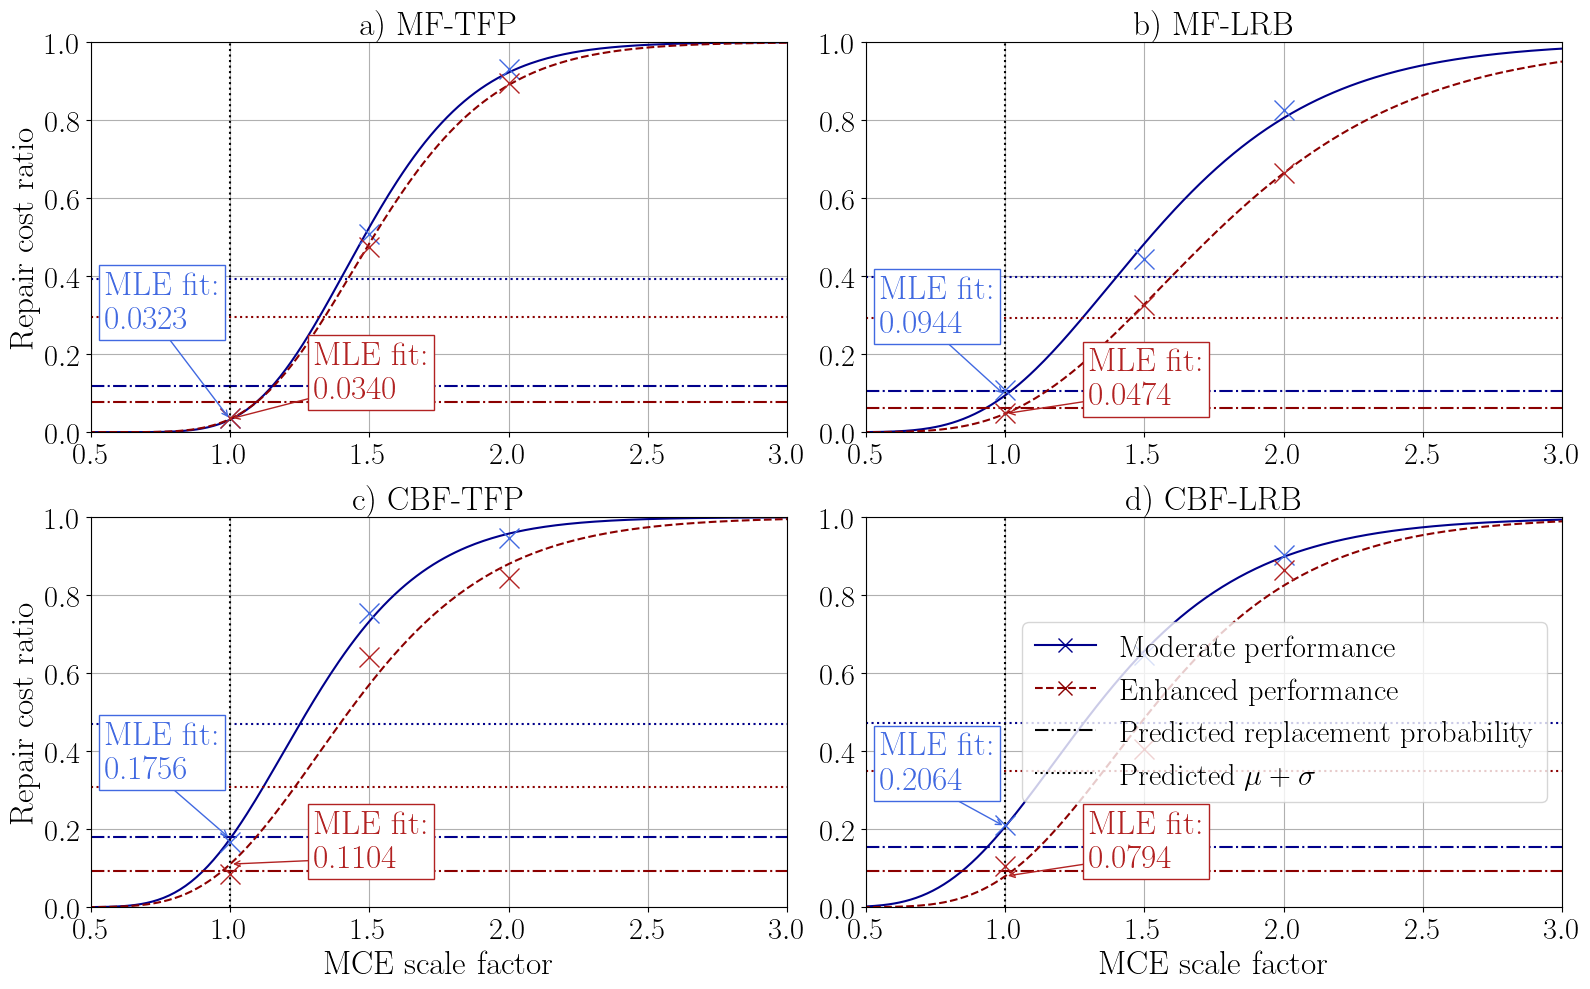

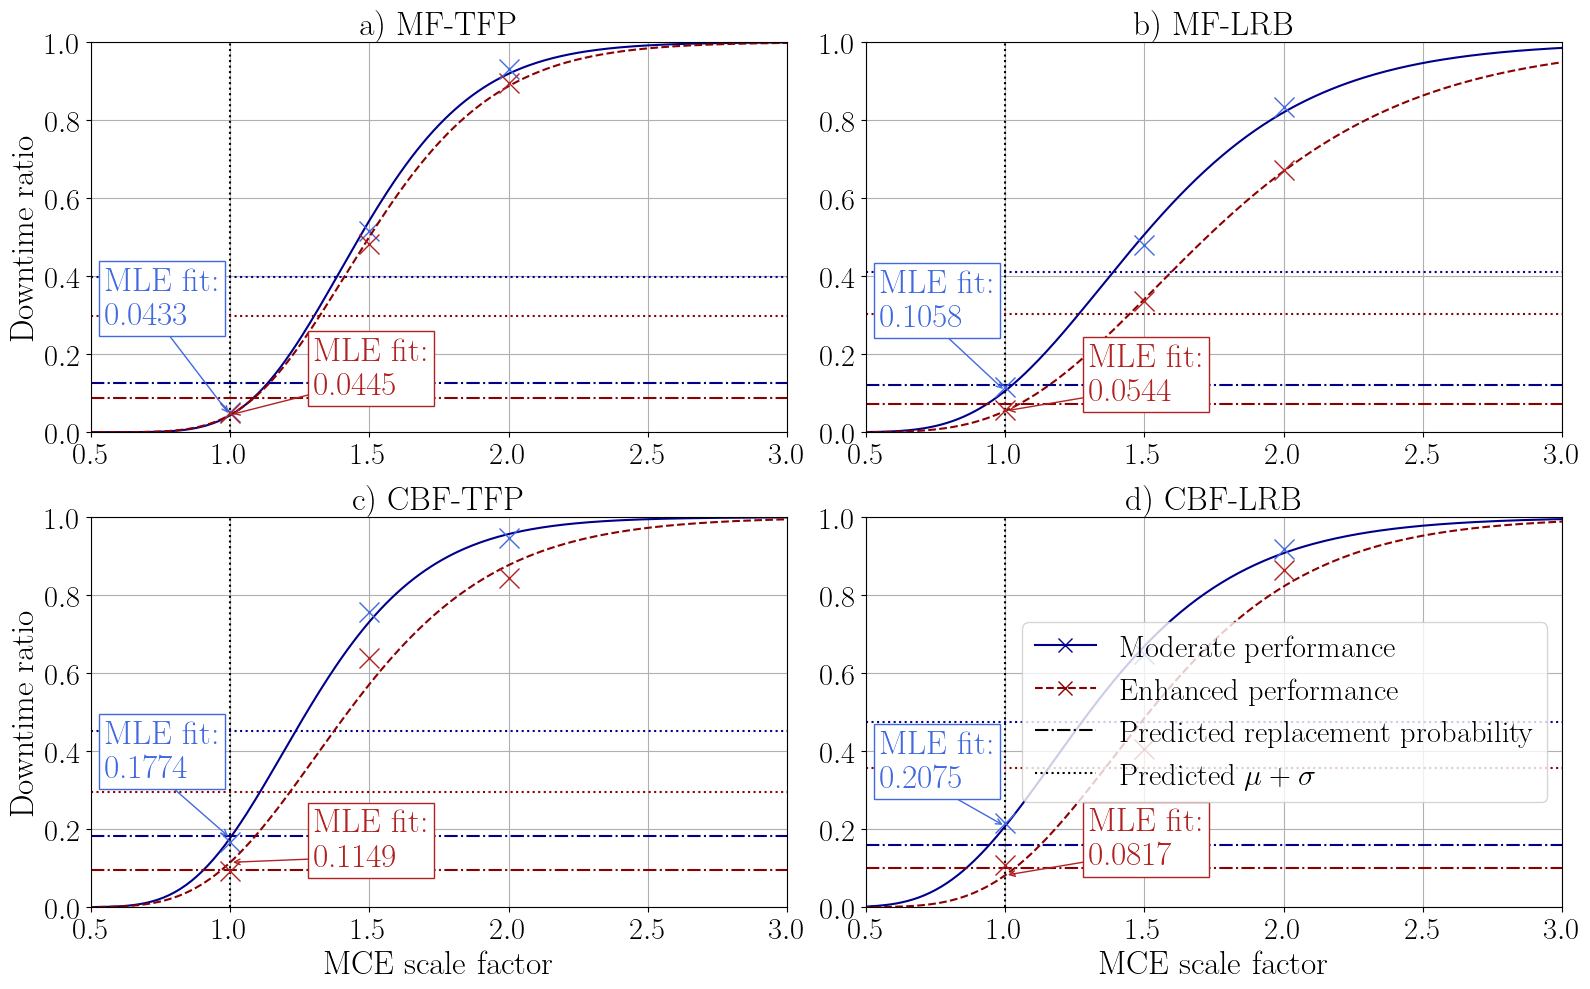

In [51]:
# TODO: replacement frag curves
def neg_log_likelihood_sum(params, im_l, no_a, no_c):
    from scipy import stats
    import numpy as np
    sigma, beta = params
    theoretical_fragility_function = stats.norm(np.log(sigma), beta).cdf(im_l)
    likelihood = stats.binom.pmf(no_c, no_a, theoretical_fragility_function)
    log_likelihood = np.log(likelihood)
    log_likelihood_sum = np.sum(log_likelihood)

    return -log_likelihood_sum

def mle_fit_collapse(ida_levels, pr_collapse):
    from functools import partial
    import numpy as np
    from scipy import optimize
    
    im_log = np.log(ida_levels)
    number_of_analyses = np.array([1000, 1000, 1000 ])
    number_of_collapses = np.round(1000*pr_collapse)
    
    neg_log_likelihood_sum_partial = partial(
        neg_log_likelihood_sum, im_l=im_log, no_a=number_of_analyses, no_c=number_of_collapses)
    
    
    res = optimize.minimize(neg_log_likelihood_sum_partial, (1, 1), method="Nelder-Mead")
    return res.x[0], res.x[1]

inverse_color = 'darkblue'
inverse_color_2 = 'royalblue'
strict_color = 'darkred'
strict_color_2 = 'firebrick'



# print out the results
ida_levels = [1.0, 1.5, 2.0]

from scipy.stats import norm
f = lambda x,theta,beta: norm(np.log(theta), beta).cdf(np.log(x))

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 24
label_size = 22
title_font=24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib.lines import Line2D
# plt.close('all')

fig = plt.figure(figsize=(16, 10))

## MF-TFP

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_val_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_repl_risk = mf_tfp_inv_pred['replacement_freq']
mf_tfp_repl_risk_var = mf_tfp_inv_pred['replacement_freq_var']
upper = mf_tfp_repl_risk+mf_tfp_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 1)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_tfp_repl_risk, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')

# ax1.text(1.5,mf_tfp_repl_risk+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_tfp_repl_risk+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_tfp_repl_risk+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

# ax1.set_ylabel('Replacement probability', fontsize=axis_font)
# ax1.set_title('MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_val_repl[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_strict_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_repl_risk = mf_tfp_strict_pred['replacement_freq']
mf_tfp_repl_risk_var = mf_tfp_strict_pred['replacement_freq_var']
upper = mf_tfp_repl_risk+mf_tfp_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_tfp_repl_risk, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_tfp_repl_risk+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_tfp_repl_risk+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

ax1.set_ylabel('Replacement probability', fontsize=axis_font)
ax1.set_title('a) MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_strict_repl[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])


####

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_val_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_repl_risk = mf_lrb_inv_pred['replacement_freq']
mf_lrb_repl_risk_var = mf_lrb_inv_pred['replacement_freq_var']
upper = mf_lrb_repl_risk+mf_lrb_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 2)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_lrb_repl_risk, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,mf_lrb_repl_risk+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)


bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_tfp_repl_risk+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_lrb_repl_risk+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

# ax1.set_ylabel('Replacement probability', fontsize=axis_font)
# ax1.set_title('MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_val_repl[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_strict_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_repl_risk = mf_lrb_strict_pred['replacement_freq']
mf_lrb_repl_risk_var = mf_lrb_strict_pred['replacement_freq_var']
upper = mf_lrb_repl_risk+mf_lrb_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_lrb_repl_risk, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_lrb_repl_risk+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_lrb_repl_risk+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


ax1.set_ylabel('Replacement probability', fontsize=axis_font)
ax1.set_title('b) MF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_strict_repl[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_val_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_repl_risk = cbf_tfp_inv_pred['replacement_freq']
cbf_tfp_repl_risk_var = cbf_tfp_inv_pred['replacement_freq_var']
upper = cbf_tfp_repl_risk+cbf_tfp_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 3)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_tfp_repl_risk, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_tfp_repl_risk+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_tfp_repl_risk+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_tfp_repl_risk+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

# ax1.set_ylabel('Replacement probability', fontsize=axis_font)
# ax1.set_title('MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_val_repl[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_strict_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_repl_risk = cbf_tfp_strict_pred['replacement_freq']
cbf_tfp_repl_risk_var = cbf_tfp_strict_pred['replacement_freq_var']
upper = cbf_tfp_repl_risk+cbf_tfp_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_tfp_repl_risk, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)


bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_tfp_repl_risk+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_tfp_repl_risk+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


ax1.set_ylabel('Replacement probability', fontsize=axis_font)
ax1.set_title('c) CBF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_strict_repl[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_val_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_repl_risk = cbf_lrb_inv_pred['replacement_freq']
cbf_lrb_repl_risk_var = cbf_lrb_inv_pred['replacement_freq_var']
upper = cbf_lrb_repl_risk+cbf_lrb_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 4)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_lrb_repl_risk, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_lrb_repl_risk+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_lrb_repl_risk+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_lrb_repl_risk+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)


# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

# ax1.set_ylabel('Replacement probability', fontsize=axis_font)
# ax1.set_title('MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_val_repl[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_strict_repl)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_repl_risk = cbf_lrb_strict_pred['replacement_freq']
cbf_lrb_repl_risk_var = cbf_lrb_strict_pred['replacement_freq_var']
upper = cbf_lrb_repl_risk+cbf_lrb_repl_risk_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_lrb_repl_risk, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)


bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_lrb_repl_risk+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_lrb_repl_risk+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


ax1.set_ylabel('Replacement probability', fontsize=axis_font)
ax1.set_title('d) CBF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_strict_repl[i]], 
              marker='x', markersize=15, color=strict_color_2)
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])
ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
fig.tight_layout()

    
custom_lines = [
                Line2D([-1], [-1], color=inverse_color, linestyle='-', marker='x', markersize=10),
                Line2D([-1], [-1], color=strict_color, linestyle='--', marker='x', markersize=10),
                Line2D([-1], [-1], color='black', linestyle='-.'),
                Line2D([-1], [-1], color='black', linestyle=':'),
                ]

ax1.legend(custom_lines, ['Moderate performance', 'Enhanced performance', 
                          'Predicted replacement probability', r'Predicted $\mu+\sigma$'], 
           fontsize=subt_font-2, loc='center right')

plt.savefig('./eng_struc_figures/spectracomments/fig_15_inverse_repl_frag_spectracomments.pdf')
plt.show()

#%% cost validation frag

# print out the results
ida_levels = [1.0, 1.5, 2.0]

from scipy.stats import norm
f = lambda x,theta,beta: norm(np.log(theta), beta).cdf(np.log(x))

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 24
label_size = 22
title_font=24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib.lines import Line2D
# plt.close('all')

fig = plt.figure(figsize=(16, 10))


## MF-TFP

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_val_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_cost_ratio = mf_tfp_inv_pred['cost']
mf_tfp_cost_ratio_var = mf_tfp_inv_pred['cost_var']
upper = mf_tfp_cost_ratio+mf_tfp_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 1)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_tfp_cost_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,mf_tfp_cost_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_tfp_cost_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_tfp_cost_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_val_cost_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_strict_cost_ratio)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_cost_ratio = mf_tfp_strict_pred['cost']
mf_tfp_cost_ratio_var = mf_tfp_strict_pred['cost_var']
upper = mf_tfp_cost_ratio+mf_tfp_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_tfp_cost_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_tfp_cost_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_tfp_cost_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


ax1.set_ylabel('Repair cost ratio', fontsize=axis_font)
ax1.set_title('a) MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_strict_cost_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])


####

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_val_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_cost_ratio = mf_lrb_inv_pred['cost']
mf_lrb_cost_ratio_var = mf_lrb_inv_pred['cost_var']
upper = mf_lrb_cost_ratio+mf_lrb_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 2)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_lrb_cost_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,mf_lrb_cost_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_lrb_cost_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_lrb_cost_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_val_cost_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_strict_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_cost_ratio = mf_lrb_strict_pred['cost']
mf_lrb_cost_ratio_var = mf_lrb_strict_pred['cost_var']
upper = mf_lrb_cost_ratio+mf_lrb_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_lrb_cost_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_lrb_cost_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_lrb_cost_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


# ax1.set_ylabel('Repair cost ratio', fontsize=axis_font)
ax1.set_title('b) MF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_strict_cost_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_val_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_cost_ratio = cbf_tfp_inv_pred['cost']
cbf_tfp_cost_ratio_var = cbf_tfp_inv_pred['cost_var']
upper = cbf_tfp_cost_ratio+cbf_tfp_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 3)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_tfp_cost_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_tfp_cost_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)


bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_tfp_cost_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_tfp_cost_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_val_cost_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_strict_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_cost_ratio = cbf_tfp_strict_pred['cost']
cbf_tfp_cost_ratio_var = cbf_tfp_strict_pred['cost_var']
upper = cbf_tfp_cost_ratio+cbf_tfp_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_tfp_cost_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_tfp_cost_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_tfp_cost_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)


ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
ax1.set_ylabel('Repair cost ratio', fontsize=axis_font)
ax1.set_title('c) CBF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_strict_cost_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_val_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_cost_ratio = cbf_lrb_inv_pred['cost']
cbf_lrb_cost_ratio_var = cbf_lrb_inv_pred['cost_var']
upper = cbf_lrb_cost_ratio+cbf_lrb_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 4)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_lrb_cost_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_lrb_cost_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)


bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_lrb_cost_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_lrb_cost_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_val_cost_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_strict_cost_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_cost_ratio = cbf_lrb_strict_pred['cost']
cbf_lrb_cost_ratio_var = cbf_lrb_strict_pred['cost_var']
upper = cbf_lrb_cost_ratio+cbf_lrb_cost_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_lrb_cost_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_lrb_cost_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_lrb_cost_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
ax1.set_title('d) CBF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_strict_cost_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

fig.tight_layout()

    
custom_lines = [
                Line2D([-1], [-1], color=inverse_color, linestyle='-', marker='x', markersize=10),
                Line2D([-1], [-1], color=strict_color, linestyle='--', marker='x', markersize=10),
                Line2D([-1], [-1], color='black', linestyle='-.'),
                Line2D([-1], [-1], color='black', linestyle=':'),
                ]

ax1.legend(custom_lines, ['Moderate performance', 'Enhanced performance', 
                          'Predicted replacement probability', r'Predicted $\mu+\sigma$'], 
           fontsize=subt_font-2, loc='center right')

plt.savefig('./eng_struc_figures/spectracomments/fig_13_inverse_cost_frag_spectracomments.pdf')

plt.show()

#%% time validation frag

# print out the results
ida_levels = [1.0, 1.5, 2.0]

from scipy.stats import norm
f = lambda x,theta,beta: norm(np.log(theta), beta).cdf(np.log(x))

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 24
label_size = 22
title_font=24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
from matplotlib.lines import Line2D
# plt.close('all')

fig = plt.figure(figsize=(16, 10))


## MF-TFP

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_val_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_downtime_ratio = mf_tfp_inv_pred['time']
mf_tfp_downtime_ratio_var = mf_tfp_inv_pred['time_var']
upper = mf_tfp_downtime_ratio+mf_tfp_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 1)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_tfp_downtime_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,mf_tfp_downtime_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_tfp_downtime_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_tfp_downtime_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_val_downtime_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_tfp_strict_downtime_ratio)
p = f(xx_pr, theta_inv, beta_inv)

mf_tfp_downtime_ratio = mf_tfp_strict_pred['time']
mf_tfp_downtime_ratio_var = mf_tfp_strict_pred['time_var']
upper = mf_tfp_downtime_ratio+mf_tfp_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_tfp_downtime_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_tfp_downtime_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_tfp_downtime_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

ax1.set_ylabel('Downtime ratio', fontsize=axis_font)
ax1.set_title('a) MF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_tfp_strict_downtime_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])


####

# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_val_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_downtime_ratio = mf_lrb_inv_pred['time']
mf_lrb_downtime_ratio_var = mf_lrb_inv_pred['time_var']
upper = mf_lrb_downtime_ratio+mf_lrb_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 2)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(mf_lrb_downtime_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,mf_lrb_downtime_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, mf_lrb_downtime_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, mf_lrb_downtime_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_val_downtime_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,mf_lrb_strict_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

mf_lrb_downtime_ratio = mf_lrb_strict_pred['time']
mf_lrb_downtime_ratio_var = mf_lrb_strict_pred['time_var']
upper = mf_lrb_downtime_ratio+mf_lrb_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(mf_lrb_downtime_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, mf_lrb_downtime_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, mf_lrb_downtime_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

# ax1.set_ylabel('Repair time ratio', fontsize=axis_font)
ax1.set_title('b) MF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [mf_lrb_strict_downtime_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_val_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_downtime_ratio = cbf_tfp_inv_pred['time']
cbf_tfp_downtime_ratio_var = cbf_tfp_inv_pred['time_var']
upper = cbf_tfp_downtime_ratio+cbf_tfp_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 3)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_tfp_downtime_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_tfp_downtime_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_tfp_downtime_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_tfp_downtime_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_val_downtime_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_tfp_strict_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_tfp_downtime_ratio = cbf_tfp_strict_pred['time']
cbf_tfp_downtime_ratio_var = cbf_tfp_strict_pred['time_var']
upper = cbf_tfp_downtime_ratio+cbf_tfp_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_tfp_downtime_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_tfp_downtime_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_tfp_downtime_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
ax1.set_ylabel('Downtime ratio', fontsize=axis_font)
ax1.set_title('c) CBF-TFP', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_tfp_strict_downtime_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
    
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

######
# regular
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_val_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_downtime_ratio = cbf_lrb_inv_pred['time']
cbf_lrb_downtime_ratio_var = cbf_lrb_inv_pred['time_var']
upper = cbf_lrb_downtime_ratio+cbf_lrb_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1=fig.add_subplot(2, 2, 4)
ax1.plot(xx_pr, p, color=inverse_color)
ax1.axhline(cbf_lrb_downtime_ratio, linestyle='-.', color=inverse_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=inverse_color, linewidth=1.5)
ax1.axvline(1.0, linestyle=':', color='black')
# ax1.text(1.5,cbf_lrb_downtime_ratio+0.02, r'Predicted replacement risk',
#           fontsize=subt_font, color=inverse_color)
# ax1.text(1.5,upper+0.02, r'$+1\sigma$',
#           fontsize=subt_font, color=inverse_color)

bbox_props = dict(facecolor='white', edgecolor=inverse_color_2)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(0.75, cbf_lrb_downtime_ratio+0.15), 
             arrowprops=dict(arrowstyle='->', color=inverse_color_2),
             bbox=bbox_props)
ax1.text(0.55, cbf_lrb_downtime_ratio+0.15, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=inverse_color_2, bbox=bbox_props, zorder=5)

# ax1.text(0.85, 0.55, r'$MCE_R$ scale factor', rotation=90,
#           fontsize=subt_font, color='black')

for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_val_downtime_ratio[i]], 
              marker='x', markersize=15, color=inverse_color_2)

# strict
theta_inv, beta_inv = mle_fit_collapse(ida_levels,cbf_lrb_strict_downtime_ratio)
xx_pr = np.arange(0.01, 4.0, 0.01)
p = f(xx_pr, theta_inv, beta_inv)

cbf_lrb_downtime_ratio = cbf_lrb_strict_pred['time']
cbf_lrb_downtime_ratio_var = cbf_lrb_strict_pred['time_var']
upper = cbf_lrb_downtime_ratio+cbf_lrb_downtime_ratio_var**0.5

MCE_level = float(p[xx_pr==1.0])
ax1.plot(xx_pr, p, color=strict_color, linestyle='--')
ax1.axhline(cbf_lrb_downtime_ratio, linestyle='-.', color=strict_color, linewidth=1.5)
ax1.axhline(upper, linestyle=':', color=strict_color, linewidth=1.5)

bbox_props = dict(facecolor='white', edgecolor=strict_color_2)
ax1.text(1.3, cbf_lrb_downtime_ratio+0.01, f'MLE fit: \n {MCE_level:,.4f}',
          fontsize=subt_font, color=strict_color_2, bbox=bbox_props, zorder=5)
ax1.annotate(text='', xy=(1.0,MCE_level), xytext=(1.4, cbf_lrb_downtime_ratio+0.03), 
             arrowprops=dict(arrowstyle='->', color=strict_color_2),
             bbox=bbox_props)

ax1.set_xlabel('MCE scale factor', fontsize=axis_font)
ax1.set_title('d) CBF-LRB', fontsize=title_font)
for i, lvl in enumerate(ida_levels):
    ax1.plot([lvl], [cbf_lrb_strict_downtime_ratio[i]], 
              marker='x', markersize=15, color=strict_color_2)
ax1.grid(True)
ax1.set_xlim([0.5, 3.0])
ax1.set_ylim([0, 1.0])

fig.tight_layout()

    
custom_lines = [
                Line2D([-1], [-1], color=inverse_color, linestyle='-', marker='x', markersize=10),
                Line2D([-1], [-1], color=strict_color, linestyle='--', marker='x', markersize=10),
                Line2D([-1], [-1], color='black', linestyle='-.'),
                Line2D([-1], [-1], color='black', linestyle=':'),
                ]

ax1.legend(custom_lines, ['Moderate performance', 'Enhanced performance', 
                          'Predicted replacement probability', r'Predicted $\mu+\sigma$'], 
           fontsize=subt_font-2, loc='center right')

plt.savefig('./eng_struc_figures/spectracomments/fig_14_inverse_time_frag_spectracomments.pdf')
plt.show()


## Distributions

MF-TFP runs requiring replacement: 0
MF-LRB runs requiring replacement: 2
CBF-TFP runs requiring replacement: 3
CBF-LRB runs requiring replacement: 4
MF-TFP runs requiring replacement: 0
MF-LRB runs requiring replacement: 1
CBF-TFP runs requiring replacement: 1
CBF-LRB runs requiring replacement: 3
MF-TFP runs requiring replacement: 0
MF-LRB runs requiring replacement: 2
CBF-TFP runs requiring replacement: 3
CBF-LRB runs requiring replacement: 4
MF-TFP runs requiring replacement: 0
MF-LRB runs requiring replacement: 1
CBF-TFP runs requiring replacement: 1
CBF-LRB runs requiring replacement: 3


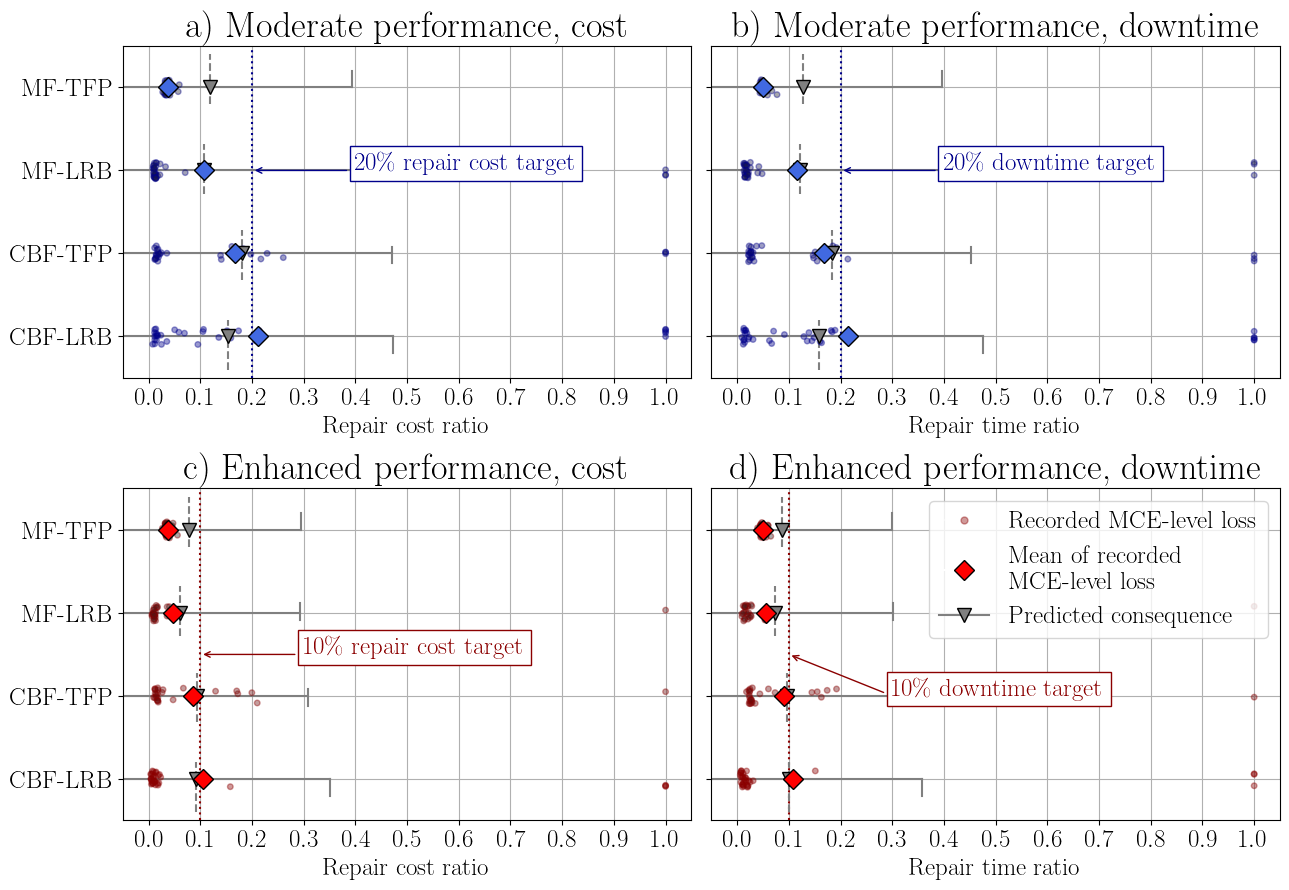

In [59]:
#%% cost validation distr

def plot_predictions(mean, var, y_middle, y_bar, color):
    middle = mean
    upper = mean + var**0.5
    lower = mean - var**0.5
    
    ax.plot(middle, y_bar, 'v', ms=10, markeredgecolor='black', markerfacecolor=color, zorder=5)
    ax.plot([lower, upper], 
            [y_bar,y_bar], color=color)
    
    ax.axvline(middle, ymin=y_middle-0.075, ymax=y_middle+0.075, linestyle='--', color=color)
    ax.axvline(lower, ymin=y_middle-0.025, ymax=y_middle+0.025, color=color)
    ax.axvline(upper, ymin=y_middle-0.025, ymax=y_middle+0.025, color=color)
    
plt.close('all')
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 18
subt_font = 18
label_size = 18
import matplotlib as mpl
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

PROPS = {
    'boxprops':{'facecolor':'none', 'edgecolor':'None'},
    'medianprops':{'color':'None'},
    'whiskerprops':{'color':'None'},
    'capprops':{'color':'None'}
}

# fig, axes = plt.subplots(1, 1, 
#                          figsize=(10, 6))

inverse_color = 'darkblue'
inverse_color_2 = 'royalblue'
strict_color = 'darkred'
strict_color_2 = 'red'

fig = plt.figure(figsize=(13, 9))

### regular
cbf_tfp_ida = cbf_tfp_val_results[cbf_tfp_val_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_val_results[mf_tfp_val_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_val_results[cbf_lrb_val_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_val_results[mf_lrb_val_results['ida_level']==1.0]

mf_tfp_repl_cases = mf_tfp_ida[mf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
cbf_tfp_repl_cases = cbf_tfp_ida[cbf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
mf_lrb_repl_cases = mf_lrb_ida[mf_lrb_ida['replacement_freq'] >= 0.99].shape[0]
cbf_lrb_repl_cases = cbf_lrb_ida[cbf_lrb_ida['replacement_freq'] >= 0.99].shape[0]

print('MF-TFP runs requiring replacement:', mf_tfp_repl_cases)
print('MF-LRB runs requiring replacement:', mf_lrb_repl_cases)
print('CBF-TFP runs requiring replacement:', cbf_tfp_repl_cases)
print('CBF-LRB runs requiring replacement:', cbf_lrb_repl_cases)


df_dt = pd.DataFrame.from_dict(
    data=dict([('MF-TFP', mf_tfp_ida[cost_var]),
               ('MF-LRB', mf_lrb_ida[cost_var]),
               ('CBF-TFP', cbf_tfp_ida[cost_var]),
               ('CBF-LRB', cbf_lrb_ida[cost_var]),]),
    orient='index',
).T

import seaborn as sns

cbf_tfp_repair_cost = cbf_tfp_inv_pred['cost']
mf_tfp_repair_cost = mf_tfp_inv_pred['cost']
cbf_lrb_repair_cost = cbf_lrb_inv_pred['cost']
mf_lrb_repair_cost = mf_lrb_inv_pred['cost']

cbf_tfp_repair_cost_var = cbf_tfp_inv_pred['cost_var']
mf_tfp_repair_cost_var = mf_tfp_inv_pred['cost_var']
cbf_lrb_repair_cost_var = cbf_lrb_inv_pred['cost_var']
mf_lrb_repair_cost_var = mf_lrb_inv_pred['cost_var']


ax=fig.add_subplot(2, 2, 1)
plt.setp(ax, xticks=np.arange(0.0, 1.1, step=0.1))
ax = sns.stripplot(data=df_dt, orient='h', color=inverse_color, alpha=0.4, size=4,
                   edgecolor=inverse_color, linewidth=1.0)
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=10,
                      markerfacecolor=inverse_color_2, zorder=20)
ax.axvline(0.2, color=inverse_color, linestyle=':')
sns.boxplot(data=df_dt, saturation=0.0, ax=ax, orient='h',
            width=0.4, showmeans=True, meanprops=meanpointprops, meanline=False, showfliers=False,
            **PROPS)
ax.set_xlabel(r'Repair cost ratio', fontsize=axis_font)




plot_predictions(mf_tfp_repair_cost, mf_tfp_repair_cost_var, 0.90, 0,  'gray')
plot_predictions(mf_lrb_repair_cost, mf_lrb_repair_cost_var, 0.63, 1, 'gray')
plot_predictions(cbf_tfp_repair_cost, cbf_tfp_repair_cost_var, 0.37, 2, 'gray')
plot_predictions(cbf_lrb_repair_cost, cbf_lrb_repair_cost_var, 0.10, 3, 'gray')
ax.set_xlim([-0.05, 1.05])

bbox_props = dict(facecolor='white', edgecolor=inverse_color)
ax.text(0.4, 1, r'20\% repair cost target',
          fontsize=subt_font, color=inverse_color, bbox=bbox_props, zorder=5)
ax.annotate(text='', xy=(0.2, 1), xytext=(0.4, 1), 
             arrowprops=dict(arrowstyle='->', color=inverse_color),
             bbox=bbox_props)

ax.grid(visible=True)
ax.set_title('a) Moderate performance, cost', fontsize=title_font)
### strict
ax=fig.add_subplot(2, 2, 3)
plt.setp(ax, xticks=np.arange(0.0, 1.1, step=0.1))
cbf_tfp_ida = cbf_tfp_strict_results[cbf_tfp_strict_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_strict_results[mf_tfp_strict_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_strict_results[cbf_lrb_strict_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_strict_results[mf_lrb_strict_results['ida_level']==1.0]

mf_tfp_repl_cases = mf_tfp_ida[mf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
cbf_tfp_repl_cases = cbf_tfp_ida[cbf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
mf_lrb_repl_cases = mf_lrb_ida[mf_lrb_ida['replacement_freq'] >= 0.99].shape[0]
cbf_lrb_repl_cases = cbf_lrb_ida[cbf_lrb_ida['replacement_freq'] >= 0.99].shape[0]

print('MF-TFP runs requiring replacement:', mf_tfp_repl_cases)
print('MF-LRB runs requiring replacement:', mf_lrb_repl_cases)
print('CBF-TFP runs requiring replacement:', cbf_tfp_repl_cases)
print('CBF-LRB runs requiring replacement:', cbf_lrb_repl_cases)


df_dt = pd.DataFrame.from_dict(
    data=dict([('MF-TFP', mf_tfp_ida[cost_var]),
                ('MF-LRB', mf_lrb_ida[cost_var]),
                ('CBF-TFP', cbf_tfp_ida[cost_var]),
                ('CBF-LRB', cbf_lrb_ida[cost_var]),]),
    orient='index',
).T

import seaborn as sns

cbf_tfp_repair_cost = cbf_tfp_strict_pred['cost']
mf_tfp_repair_cost = mf_tfp_strict_pred['cost']
cbf_lrb_repair_cost = cbf_lrb_strict_pred['cost']
mf_lrb_repair_cost = mf_lrb_strict_pred['cost']

cbf_tfp_repair_cost_var = cbf_tfp_strict_pred['cost_var']
mf_tfp_repair_cost_var = mf_tfp_strict_pred['cost_var']
cbf_lrb_repair_cost_var = cbf_lrb_strict_pred['cost_var']
mf_lrb_repair_cost_var = mf_lrb_strict_pred['cost_var']

ax = sns.stripplot(data=df_dt, orient='h', color=strict_color, alpha=0.4, size=4,
                    edgecolor=strict_color, linewidth=1.0)
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=10,
                      markerfacecolor=strict_color_2, zorder=20)

sns.boxplot(data=df_dt, saturation=0.0, ax=ax, orient='h',
            width=0.4, showmeans=True, meanprops=meanpointprops, meanline=False, showfliers=False,
            **PROPS)
ax.set_xlabel(r'Repair cost ratio', fontsize=axis_font)
ax.axvline(0.1, color=strict_color, linestyle=':')

bbox_props = dict(facecolor='white', edgecolor=strict_color)
ax.text(0.3, 1.5, r'10\% repair cost target',
          fontsize=subt_font, color=strict_color, bbox=bbox_props, zorder=5)
ax.annotate(text='', xy=(0.1, 1.5), xytext=(0.3, 1.5), 
             arrowprops=dict(arrowstyle='->', color=strict_color),
             bbox=bbox_props)

plot_predictions(mf_tfp_repair_cost, mf_tfp_repair_cost_var, 0.90, 0,  'gray')
plot_predictions(mf_lrb_repair_cost, mf_lrb_repair_cost_var, 0.63, 1, 'gray')
plot_predictions(cbf_tfp_repair_cost, cbf_tfp_repair_cost_var, 0.37, 2, 'gray')
plot_predictions(cbf_lrb_repair_cost, cbf_lrb_repair_cost_var, 0.10, 3, 'gray')
ax.set_xlim([-0.05, 1.05])
ax.grid(visible=True)
ax.set_title('c) Enhanced performance, cost', fontsize=title_font)

###### time

### regular
cbf_tfp_ida = cbf_tfp_val_results[cbf_tfp_val_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_val_results[mf_tfp_val_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_val_results[cbf_lrb_val_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_val_results[mf_lrb_val_results['ida_level']==1.0]

mf_tfp_repl_cases = mf_tfp_ida[mf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
cbf_tfp_repl_cases = cbf_tfp_ida[cbf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
mf_lrb_repl_cases = mf_lrb_ida[mf_lrb_ida['replacement_freq'] >= 0.99].shape[0]
cbf_lrb_repl_cases = cbf_lrb_ida[cbf_lrb_ida['replacement_freq'] >= 0.99].shape[0]

print('MF-TFP runs requiring replacement:', mf_tfp_repl_cases)
print('MF-LRB runs requiring replacement:', mf_lrb_repl_cases)
print('CBF-TFP runs requiring replacement:', cbf_tfp_repl_cases)
print('CBF-LRB runs requiring replacement:', cbf_lrb_repl_cases)


df_dt = pd.DataFrame.from_dict(
    data=dict([('MF-TFP', mf_tfp_ida[time_var]),
               ('MF-LRB', mf_lrb_ida[time_var]),
               ('CBF-TFP', cbf_tfp_ida[time_var]),
               ('CBF-LRB', cbf_lrb_ida[time_var]),]),
    orient='index',
).T

import seaborn as sns

cbf_tfp_repair_time = cbf_tfp_inv_pred['time']
mf_tfp_repair_time = mf_tfp_inv_pred['time']
cbf_lrb_repair_time = cbf_lrb_inv_pred['time']
mf_lrb_repair_time = mf_lrb_inv_pred['time']

cbf_tfp_repair_time_var = cbf_tfp_inv_pred['time_var']
mf_tfp_repair_time_var = mf_tfp_inv_pred['time_var']
cbf_lrb_repair_time_var = cbf_lrb_inv_pred['time_var']
mf_lrb_repair_time_var = mf_lrb_inv_pred['time_var']


ax=fig.add_subplot(2, 2, 2)
plt.setp(ax, xticks=np.arange(0.0, 1.1, step=0.1))
ax = sns.stripplot(data=df_dt, orient='h', color=inverse_color, alpha=0.4, size=4,
                   edgecolor=inverse_color, linewidth=1.0)
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=10,
                      markerfacecolor=inverse_color_2, zorder=20)

sns.boxplot(data=df_dt, saturation=0.0, ax=ax, orient='h',
            width=0.4, showmeans=True, meanprops=meanpointprops, meanline=False, showfliers=False,
            **PROPS)
ax.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax.axvline(0.2, color=inverse_color, linestyle=':')

plot_predictions(mf_tfp_repair_time, mf_tfp_repair_time_var, 0.90, 0,  'gray')
plot_predictions(mf_lrb_repair_time, mf_lrb_repair_time_var, 0.63, 1, 'gray')
plot_predictions(cbf_tfp_repair_time, cbf_tfp_repair_time_var, 0.37, 2, 'gray')
plot_predictions(cbf_lrb_repair_time, cbf_lrb_repair_time_var, 0.10, 3, 'gray')

bbox_props = dict(facecolor='white', edgecolor=inverse_color)
ax.text(0.4, 1, r'20\% downtime target',
          fontsize=subt_font, color=inverse_color, bbox=bbox_props, zorder=5)
ax.annotate(text='', xy=(0.2, 1), xytext=(0.4, 1), 
             arrowprops=dict(arrowstyle='->', color=inverse_color),
             bbox=bbox_props)

ax.grid(visible=True)
ax.axes.yaxis.set_ticklabels([])
ax.set_xlim([-0.05, 1.05])
ax.set_title('b) Moderate performance, downtime', fontsize=title_font)
### strict
ax=fig.add_subplot(2, 2, 4)
plt.setp(ax, xticks=np.arange(0.0, 1.1, step=0.1))
cbf_tfp_ida = cbf_tfp_strict_results[cbf_tfp_strict_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_strict_results[mf_tfp_strict_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_strict_results[cbf_lrb_strict_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_strict_results[mf_lrb_strict_results['ida_level']==1.0]

mf_tfp_repl_cases = mf_tfp_ida[mf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
cbf_tfp_repl_cases = cbf_tfp_ida[cbf_tfp_ida['replacement_freq'] >= 0.99].shape[0]
mf_lrb_repl_cases = mf_lrb_ida[mf_lrb_ida['replacement_freq'] >= 0.99].shape[0]
cbf_lrb_repl_cases = cbf_lrb_ida[cbf_lrb_ida['replacement_freq'] >= 0.99].shape[0]

print('MF-TFP runs requiring replacement:', mf_tfp_repl_cases)
print('MF-LRB runs requiring replacement:', mf_lrb_repl_cases)
print('CBF-TFP runs requiring replacement:', cbf_tfp_repl_cases)
print('CBF-LRB runs requiring replacement:', cbf_lrb_repl_cases)


df_dt = pd.DataFrame.from_dict(
    data=dict([('MF-TFP', mf_tfp_ida[time_var]),
                ('MF-LRB', mf_lrb_ida[time_var]),
                ('CBF-TFP', cbf_tfp_ida[time_var]),
                ('CBF-LRB', cbf_lrb_ida[time_var]),]),
    orient='index',
).T

import seaborn as sns

cbf_tfp_repair_time = cbf_tfp_strict_pred['time']
mf_tfp_repair_time = mf_tfp_strict_pred['time']
cbf_lrb_repair_time = cbf_lrb_strict_pred['time']
mf_lrb_repair_time = mf_lrb_strict_pred['time']

cbf_tfp_repair_time_var = cbf_tfp_strict_pred['time_var']
mf_tfp_repair_time_var = mf_tfp_strict_pred['time_var']
cbf_lrb_repair_time_var = cbf_lrb_strict_pred['time_var']
mf_lrb_repair_time_var = mf_lrb_strict_pred['time_var']

ax = sns.stripplot(data=df_dt, orient='h', color=strict_color, alpha=0.4, size=4,
                    edgecolor=strict_color, linewidth=1.0)
meanpointprops = dict(marker='D', markeredgecolor='black', markersize=10,
                      markerfacecolor=strict_color_2, zorder=20)

sns.boxplot(data=df_dt, saturation=0.0, ax=ax, orient='h',
            width=0.4, showmeans=True, meanprops=meanpointprops, meanline=False, showfliers=False,
            **PROPS)
ax.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax.axvline(0.1, color=strict_color, linestyle=':')

bbox_props = dict(facecolor='white', edgecolor=strict_color)
ax.text(0.3, 2.0, r'10\% downtime target',
          fontsize=subt_font, color=strict_color, bbox=bbox_props, zorder=5)
ax.annotate(text='', xy=(0.1, 1.5), xytext=(0.3, 2.0), 
             arrowprops=dict(arrowstyle='->', color=strict_color),
             bbox=bbox_props)

plot_predictions(mf_tfp_repair_time, mf_tfp_repair_time_var, 0.90, 0,  'gray')
plot_predictions(mf_lrb_repair_time, mf_lrb_repair_time_var, 0.63, 1, 'gray')
plot_predictions(cbf_tfp_repair_time, cbf_tfp_repair_time_var, 0.37, 2, 'gray')
plot_predictions(cbf_lrb_repair_time, cbf_lrb_repair_time_var, 0.10, 3, 'gray')

ax.grid(visible=True)
ax.axes.yaxis.set_ticklabels([])
ax.set_title('d) Enhanced performance, downtime', fontsize=title_font)

import matplotlib.patches as mpatches
custom_lines = [
                Line2D([-1], [-1], color='white', marker='o', markeredgecolor=strict_color,
                       alpha=0.4, markerfacecolor=strict_color, markersize=5),
                Line2D([-1], [-1], color='white', marker='D', markeredgecolor='black'
                       , markerfacecolor=strict_color_2, markersize=10),
                Line2D([0, 0], [-1, 1], color='gray', marker='v', markeredgecolor='black',
                       markerfacecolor='gray', markersize=10)
                ]

ax.legend(custom_lines, ['Recorded MCE-level loss', 'Mean of recorded \n MCE-level loss', 
                         'Predicted consequence'], 
           fontsize=subt_font)

ax.set_xlim([-0.05, 1.05])
fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_16_inverse_dv_distro_spectracomments.pdf')
plt.show()

# Additional figures/analyses

## Filter design graphic

'\n# TODO: filter, secondary variables\n\nplt.rcParams["font.family"] = "serif"\nplt.rcParams["mathtext.fontset"] = "dejavuserif"\ntitle_font=22\naxis_font = 22\nsubt_font = 20\nlabel_size = 20\nclabel_size = 16\nmpl.rcParams[\'xtick.labelsize\'] = label_size \nmpl.rcParams[\'ytick.labelsize\'] = label_size \n# plt.close(\'all\')\n\nfrom matplotlib.lines import Line2D\nfig = plt.figure(figsize=(13, 11))\n\n#################################\nxvar = \'T_ratio\'\nyvar = \'zeta_e\'\n\n# lvls_cost = np.array([0.2])\n# lvls_time = np.array([0.2])\n# lvls_repl = np.array([0.1])\n\nres = 100\nX_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, \n                            all_vars=[\'gap_ratio\', \'RI\', \'T_ratio\', \'zeta_e\'],\n                            third_var_set = 0.88, fourth_var_set = 2.25)\n\nxx = X_plot[xvar]\nyy = X_plot[yvar]\n\nx_pl = np.unique(xx)\ny_pl = np.unique(yy)\nxx_pl, yy_pl = np.meshgrid(x_pl, y_pl)\n\n\n#### MF-TFP\n\nax = fig.add_su

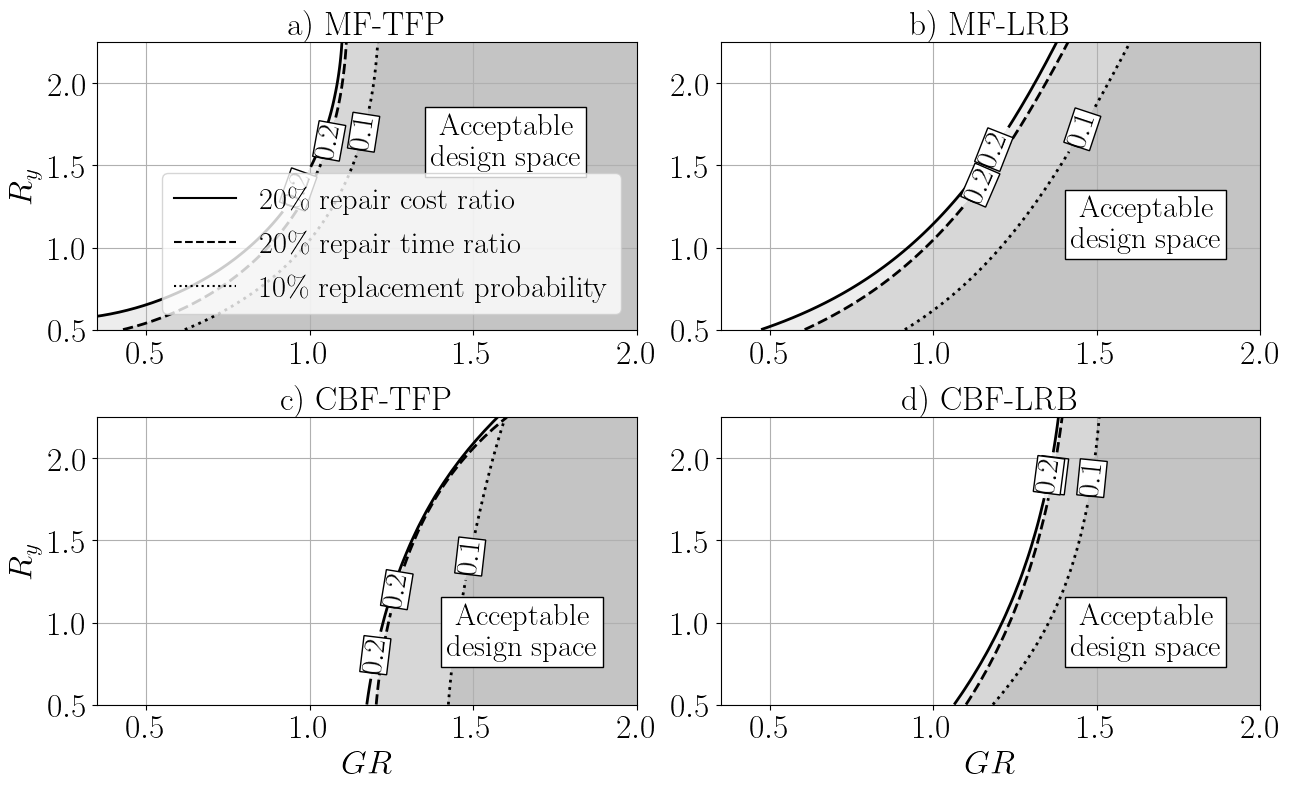

In [53]:
#%% filter design graphic

# TODO: filter

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=24
axis_font = 24
subt_font = 22
label_size = 24
clabel_size = 22
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

from matplotlib.lines import Line2D
fig = plt.figure(figsize=(13, 8))

#################################
xvar = 'gap_ratio'
yvar = 'RI'

# lvls_cost = np.array([0.2])
# lvls_time = np.array([0.2])
# lvls_repl = np.array([0.1])

# lvls_cost_enhanced = np.array([0.1])
# lvls_time_enhanced = np.array([0.1])
# lvls_repl_enhanced = np.array([0.05])

lvls_cost = 0.2
lvls_time = 0.2
lvls_repl = 0.1

lvls_cost_enhanced = 0.1
lvls_time_enhanced = 0.1
lvls_repl_enhanced = 0.05

res = 100
X_plot = make_2D_plotting_space(df[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 3.2, fourth_var_set = 0.24)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)


#### MF-TFP

ax = fig.add_subplot(2, 2, 1)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_time_mf_tfp_i.gpr,
                       mdl_time_mf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)



cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[-1.0, lvls_repl])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[-1.0, lvls_time])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
clabels = ax.clabel(cs, fontsize=clabel_size, manual=[(.6, 1.5)])
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[-1.0, lvls_cost])

ax.text(1.6, 1.5, 'Acceptable \n design space', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))

# cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
#                 colors='black', linestyles='dotted', levels=lvls_repl_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='lightcyan', alpha=0.2, levels=[lvls_repl_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
#                 colors='black', linestyles='dashed', levels=lvls_time_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='powderblue', alpha=0.2, levels=[lvls_time_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=lvls_cost_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='lightskyblue', alpha=0.2, levels=[lvls_cost_enhanced, 1.0])

ax.grid(visible=True)



ax.set_title('a) MF-TFP', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


ax.set_xlim([0.35, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

custom_lines = [Line2D([-1], [-1], color='black', 
                       linestyle='-' ),
                Line2D([-1], [-1], color='black', 
                                       linestyle='--' ),
                Line2D([-1], [-1], color='black', 
                                       linestyle=':' ),
                ]

ax.legend(custom_lines, ['20\% repair cost ratio', '20\% repair time ratio', '10\% replacement probability'], 
           fontsize=subt_font, loc='lower right')

#### MF-LRB
X_plot = make_2D_plotting_space(df[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 2.35, fourth_var_set = 0.20)

ax = fig.add_subplot(2, 2, 2)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_cost_mf_lrb_i.gpr,
                       mdl_cost_mf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_time_mf_lrb_i.gpr,
                       mdl_time_mf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_repl_mf_lrb_i.gpr,
                       mdl_repl_mf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[-1.0, lvls_repl])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
clabels = ax.clabel(cs, fontsize=clabel_size, manual=[(0.9, 1.5)])
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[-1.0, lvls_time])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[-1.0, lvls_cost])

ax.text(1.65, 1.0, 'Acceptable \n design space', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))

# cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
#                 colors='black', linestyles='dotted', levels=lvls_repl_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='lightcyan', alpha=0.2, levels=[lvls_repl_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
#                 colors='black', linestyles='dashed', levels=lvls_time_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='powderblue', alpha=0.2, levels=[lvls_time_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=lvls_cost_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='lightskyblue', alpha=0.2, levels=[lvls_cost_enhanced, 1.0])

ax.grid(visible=True)


ax.set_title('b) MF-LRB', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


ax.set_xlim([0.35, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
# ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)

#### CBF-TFP
X_plot = make_2D_plotting_space(df[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 5.79, fourth_var_set = 0.23)
ax = fig.add_subplot(2, 2, 3)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_cost_cbf_tfp_i.gpr,
                       mdl_cost_cbf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_time_cbf_tfp_i.gpr,
                       mdl_time_cbf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_repl_cbf_tfp_i.gpr,
                       mdl_repl_cbf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[-1.0, lvls_repl])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
clabels = ax.clabel(cs, fontsize=clabel_size, manual=[(1.0, 1.25)])
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[-1.0, lvls_time])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[-1.0, lvls_cost])

ax.text(1.65, 0.8, 'Acceptable \n design space', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))

# cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
#                 colors='black', linestyles='dotted', levels=lvls_repl_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='lightcyan', alpha=0.2, levels=[lvls_repl_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
#                 colors='black', linestyles='dashed', levels=lvls_time_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='powderblue', alpha=0.2, levels=[lvls_time_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=lvls_cost_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='lightskyblue', alpha=0.2, levels=[lvls_cost_enhanced, 1.0])

ax.grid(visible=True)

ax.set_title('c) CBF-TFP', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


ax.set_xlim([0.35, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
ax.set_ylabel(r'$R_y$', fontsize=axis_font)

fig.tight_layout()

#### CBF-LRB
X_plot = make_2D_plotting_space(df[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 4.79, fourth_var_set = 0.21)
ax = fig.add_subplot(2, 2, 4)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_cost_cbf_lrb_i.gpr,
                       mdl_cost_cbf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_time_cbf_lrb_i.gpr,
                       mdl_time_cbf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_repl_cbf_lrb_i.gpr,
                       mdl_repl_cbf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[-1.0, lvls_repl])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[-1.0, lvls_time])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
clabels = ax.clabel(cs, fontsize=clabel_size)
[txt.set_bbox(dict(facecolor='white', edgecolor='black', pad=0)) for txt in clabels]
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[-1.0, lvls_cost])

ax.text(1.65, 0.8, 'Acceptable \n design space', horizontalalignment='center',
          fontsize=subt_font, color='black', bbox=dict(facecolor='white', edgecolor='black'))

# cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
#                 colors='black', linestyles='dotted', levels=lvls_repl_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='lightcyan', alpha=0.2, levels=[lvls_repl_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
#                 colors='black', linestyles='dashed', levels=lvls_time_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='powderblue', alpha=0.2, levels=[lvls_time_enhanced, 1.0])

# cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=lvls_cost_enhanced)
# ax.clabel(cs, fontsize=clabel_size)
# cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='lightskyblue', alpha=0.2, levels=[lvls_cost_enhanced, 1.0])

ax.grid(visible=True)


ax.set_title('d) CBF-LRB', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


ax.set_xlim([0.35, 2.0])
ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_xlabel(r'$GR$', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)

fig.tight_layout()
plt.savefig('./eng_struc_figures/spectracomments/fig_11_filter_design_spectracomments.pdf')
# ax.text(1.2, 1.00, 'OK space',
#           fontsize=axis_font, color='green')
#%% filter design graphic


'''
# TODO: filter, secondary variables

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
title_font=22
axis_font = 22
subt_font = 20
label_size = 20
clabel_size = 16
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 
# plt.close('all')

from matplotlib.lines import Line2D
fig = plt.figure(figsize=(13, 11))

#################################
xvar = 'T_ratio'
yvar = 'zeta_e'

# lvls_cost = np.array([0.2])
# lvls_time = np.array([0.2])
# lvls_repl = np.array([0.1])

res = 100
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 0.88, fourth_var_set = 2.25)

xx = X_plot[xvar]
yy = X_plot[yvar]

x_pl = np.unique(xx)
y_pl = np.unique(yy)
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)


#### MF-TFP

ax = fig.add_subplot(2, 2, 1)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_cost_mf_tfp_i.gpr,
                       mdl_cost_mf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_time_mf_tfp_i.gpr,
                       mdl_time_mf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_tfp.gpc,
                       mdl_repl_mf_tfp_i.gpr,
                       mdl_repl_mf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[lvls_repl, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[lvls_time, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[lvls_cost, 1.0])

ax.grid(visible=True)

custom_lines = [Line2D([-1], [-1], color='black', 
                       linestyle='-' ),
                Line2D([-1], [-1], color='black', 
                                       linestyle='--' ),
                Line2D([-1], [-1], color='black', 
                                       linestyle=':' ),
                ]

ax.legend(custom_lines, ['Repair cost ratio', 'Repair time ratio', 'Replacement probability'], 
           fontsize=subt_font)

ax.set_title('a) MF-TFP', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


# ax.set_xlim([0.35, 2.0])
# ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

#### MF-LRB
X_plot = make_2D_plotting_space(df_mf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 1.19, fourth_var_set = 2.25)

ax = fig.add_subplot(2, 2, 2)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_cost_mf_lrb_i.gpr,
                       mdl_cost_mf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_time_mf_lrb_i.gpr,
                       mdl_time_mf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_mf_lrb.gpc,
                       mdl_repl_mf_lrb_i.gpr,
                       mdl_repl_mf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[lvls_repl, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[lvls_time, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[lvls_cost, 1.0])

ax.grid(visible=True)


ax.set_title('b) MF-LRB', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)


# ax.set_xlim([0.35, 2.0])
# ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
# ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

#### CBF-TFP
X_plot = make_2D_plotting_space(df_cbf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 1.26, fourth_var_set = 2.16)
ax = fig.add_subplot(2, 2, 3)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_cost_cbf_tfp_i.gpr,
                       mdl_cost_cbf_tfp_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_time_cbf_tfp_i.gpr,
                       mdl_time_cbf_tfp_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_tfp.gpc,
                       mdl_repl_cbf_tfp_i.gpr,
                       mdl_repl_cbf_tfp_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[lvls_repl, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[lvls_time, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[lvls_cost, 1.0])

ax.grid(visible=True)


ax.set_title('c) CBF-TFP', fontsize=title_font)
# ax.set_xlabel(r'Gap ratio (GR)', fontsize=axis_font)
# ax.set_ylabel(r'$R_y$', fontsize=axis_font)



# ax.set_xlim([0.35, 2.0])
# ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)

fig.tight_layout()

#### CBF-LRB
X_plot = make_2D_plotting_space(df_cbf[covariate_list], res, x_var=xvar, y_var=yvar, 
                            all_vars=['gap_ratio', 'RI', 'T_ratio', 'zeta_e'],
                            third_var_set = 1.52, fourth_var_set = 1.97)
ax = fig.add_subplot(2, 2, 4)
# plt.setp(ax, xticks=np.arange(0.5, 5.0, step=0.5))

# cs = ax1.contour(xx, yy, Z, linewidths=1.1, cmap='Blues', vmin=-1,
#                  levels=lvls)

grid_cost = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_cost_cbf_lrb_i.gpr,
                       mdl_cost_cbf_lrb_o.gpr,
                       outcome=cost_var)

Z = np.array(grid_cost)
Z_cost = Z.reshape(xx_pl.shape)

# clabels = ax.clabel(cs, fontsize=clabel_size)

grid_time = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_time_cbf_lrb_i.gpr,
                       mdl_time_cbf_lrb_o.gpr,
                       outcome=time_var)

Z = np.array(grid_time)
Z_time = Z.reshape(xx_pl.shape)

lvls = 0.1
grid_repl = predict_DV(X_plot,
                       mdl_impact_cbf_lrb.gpc,
                       mdl_repl_cbf_lrb_i.gpr,
                       mdl_repl_cbf_lrb_o.gpr,
                       outcome=repl_var)

Z = np.array(grid_repl)
Z_repl = Z.reshape(xx_pl.shape)





cs = ax.contour(xx_pl, yy_pl, Z_repl, linewidths=2.0, 
                colors='black', linestyles='dotted', levels=[lvls_repl])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_repl, colors='dimgray', alpha=0.5, levels=[lvls_repl, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_time, linewidths=2.0, 
                colors='black', linestyles='dashed', levels=[lvls_time])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_time, colors='darkgray', alpha=0.5, levels=[lvls_time, 1.0])

cs = ax.contour(xx_pl, yy_pl, Z_cost, linewidths=2.0, colors='black', levels=[lvls_cost])
ax.clabel(cs, fontsize=clabel_size)
cs = ax.contourf(xx_pl, yy_pl, Z_cost, colors='gainsboro', alpha=0.5, levels=[lvls_cost, 1.0])

ax.grid(visible=True)


ax.set_title('d) CBF-LRB', fontsize=title_font)
ax.set_xlabel(r'$T_M/T_{fb}$', fontsize=axis_font)
# ax.set_ylabel(r'$\zeta_M$', fontsize=axis_font)


# ax.set_xlim([0.35, 2.0])
# ax.set_ylim([0.5, 2.25])

ax.grid(visible=True)

fig.tight_layout()
'''

## Generalized MLE curves and ECDFs

In [54]:
#%% generalized curve fitting for cost and time

# TODO: should this be real values ($)
'''
def nlls(params, log_x, no_a, no_c):
    from scipy import stats
    import numpy as np
    sigma, beta = params
    theoretical_fragility_function = stats.norm(np.log(sigma), beta).cdf(log_x)
    likelihood = stats.binom.pmf(no_c, no_a, theoretical_fragility_function)
    log_likelihood = np.log(likelihood)
    log_likelihood_sum = np.sum(log_likelihood)

    return -log_likelihood_sum

def mle_fit_general(x_values, probs, x_init=None):
    from functools import partial
    import numpy as np
    from scipy.optimize import basinhopping
    
    log_x = np.log(x_values)
    number_of_analyses = 1000*np.ones(len(x_values))
    number_of_collapses = np.round(1000*probs)
    
    neg_log_likelihood_sum_partial = partial(
        nlls, log_x=log_x, no_a=number_of_analyses, no_c=number_of_collapses)
    
    if x_init is None:
        x0 = (1, 1)
    else:
        x0 = x_init
    
    bnds = ((1e-6, 0.2), (0.5, 1.5))
    
    # use basin hopping to avoid local minima
    minimizer_kwargs={'bounds':bnds}
    res = basinhopping(neg_log_likelihood_sum_partial, x0, minimizer_kwargs=minimizer_kwargs,
                       niter=10, seed=985)
    
    return res.x[0], res.x[1]

from scipy.stats import ecdf
f = lambda x,theta,beta: norm(np.log(theta), beta).cdf(np.log(x))
# plt.close('all')

# moderate designs
cbf_tfp_ida = cbf_tfp_val_results[cbf_tfp_val_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_val_results[mf_tfp_val_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_val_results[cbf_lrb_val_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_val_results[mf_lrb_val_results['ida_level']==1.0]

my_y_var = mf_tfp_ida[cost_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 18
subt_font = 18
label_size = 16
title_font=20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

fig = plt.figure(figsize=(13, 9))

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),0.5))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 1)
ax1.plot(xx_pr, p)

ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
# ax1.set_xlabel(r'Repair cost ratio', fontsize=axis_font)
ax1.set_title('MF-TFP', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = mf_lrb_ida[cost_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),0.25))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 2)
ax1.plot(xx_pr, p)

# ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
# ax1.set_xlabel(r'Repair cost ratio', fontsize=axis_font)
ax1.set_title('MF-LRB', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = cbf_tfp_ida[cost_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),1))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 3)
ax1.plot(xx_pr, p)

ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
ax1.set_xlabel(r'Repair cost ratio', fontsize=axis_font)
ax1.set_title('CBF-TFP', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = cbf_lrb_ida[cost_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),1))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 4)
ax1.plot(xx_pr, p)

# ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
ax1.set_xlabel(r'Repair cost ratio', fontsize=axis_font)
ax1.set_title('CBF-LRB', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

fig.tight_layout()
plt.show()

#%%

# plt.close('all')
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 18
subt_font = 18
label_size = 16
title_font=20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

my_y_var = mf_tfp_ida[time_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

fig = plt.figure(figsize=(16, 13))

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),0.5))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 1)
ax1.plot(xx_pr, p)

ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
# ax1.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax1.set_title('MF-TFP', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = mf_lrb_ida[time_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles


# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),0.5))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 2)
ax1.plot(xx_pr, p)

# ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
# ax1.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax1.set_title('MF-LRB', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = cbf_tfp_ida[time_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles


# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),1))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 3)
ax1.plot(xx_pr, p)

ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
ax1.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax1.set_title('CBF-TFP', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

####

my_y_var = cbf_lrb_ida[time_var]
res = ecdf(my_y_var)
ecdf_prob = res.cdf.probabilities
ecdf_values = res.cdf.quantiles

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 18
subt_font = 18
label_size = 16
title_font=20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

# theta_inv, beta_inv = mle_fit_general(
#     ecdf_values,ecdf_prob, x_init=(np.median(ecdf_values),1))

theta_inv = np.exp(np.log(my_y_var).mean())
beta_inv = np.log(my_y_var).var()

xx_pr = np.linspace(1e-4, 1.0, 400)
p = f(xx_pr, theta_inv, beta_inv)

ax1=fig.add_subplot(2, 2, 4)
ax1.plot(xx_pr, p)

# ax1.set_ylabel(r'$P(X \leq x)$', fontsize=axis_font)
ax1.set_xlabel(r'Repair time ratio', fontsize=axis_font)
ax1.set_title('CBF-LRB', fontsize=title_font)
ax1.plot([ecdf_values], [ecdf_prob], 
          marker='x', markersize=5, color="red")
ax1.grid(True)
# ax1.set_xlim([0, 1.0])
# ax1.set_ylim([0, 1.0])

fig.tight_layout()
'''

'\ndef nlls(params, log_x, no_a, no_c):\n    from scipy import stats\n    import numpy as np\n    sigma, beta = params\n    theoretical_fragility_function = stats.norm(np.log(sigma), beta).cdf(log_x)\n    likelihood = stats.binom.pmf(no_c, no_a, theoretical_fragility_function)\n    log_likelihood = np.log(likelihood)\n    log_likelihood_sum = np.sum(log_likelihood)\n\n    return -log_likelihood_sum\n\ndef mle_fit_general(x_values, probs, x_init=None):\n    from functools import partial\n    import numpy as np\n    from scipy.optimize import basinhopping\n    \n    log_x = np.log(x_values)\n    number_of_analyses = 1000*np.ones(len(x_values))\n    number_of_collapses = np.round(1000*probs)\n    \n    neg_log_likelihood_sum_partial = partial(\n        nlls, log_x=log_x, no_a=number_of_analyses, no_c=number_of_collapses)\n    \n    if x_init is None:\n        x0 = (1, 1)\n    else:\n        x0 = x_init\n    \n    bnds = ((1e-6, 0.2), (0.5, 1.5))\n    \n    # use basin hopping to avoid loc

## Cost breakdown

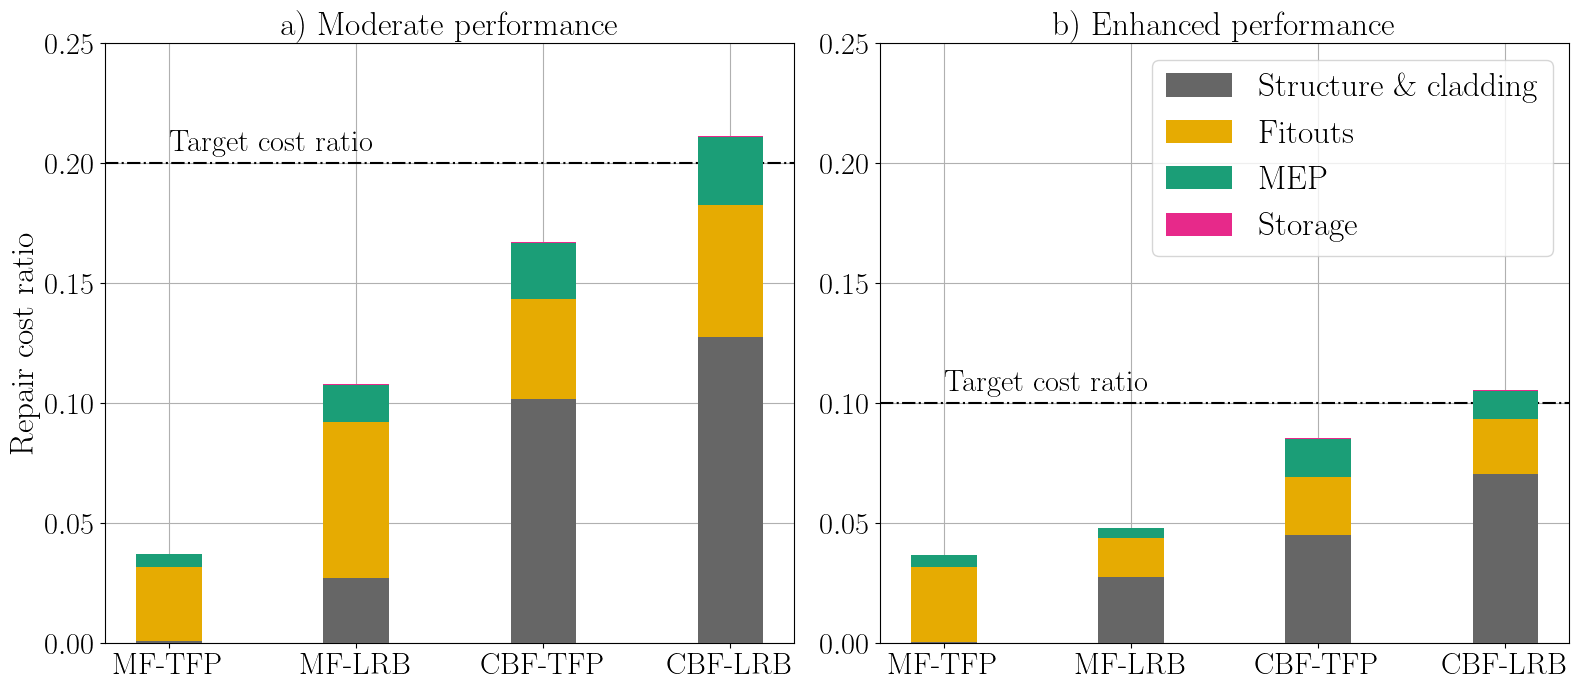

In [55]:

# TODO: component breakdown
def component_fractions(loss_df):
    
    loss_df['cost_50%'] = loss_df['cmp_cost_ratio'] * loss_df['total_cmp_cost']
    loss_df['cost_compare'] = loss_df['B_50%'] + loss_df['C_50%'] + loss_df['D_50%'] + loss_df['E_50%'] 
    loss_df['difference'] = loss_df['cost_50%'] / loss_df['cost_compare']
    
    
    loss_df['B_frac'] = loss_df['B_50%']*loss_df['difference'] / loss_df['total_cmp_cost']
    loss_df['C_frac'] = loss_df['C_50%']*loss_df['difference'] / loss_df['total_cmp_cost']
    loss_df['D_frac'] = loss_df['D_50%']*loss_df['difference'] / loss_df['total_cmp_cost']
    loss_df['E_frac'] = loss_df['E_50%']*loss_df['difference'] / loss_df['total_cmp_cost']
    
    # loss_df['B_frac'] = loss_df['B_50%'] / loss_df['total_cmp_cost']
    # loss_df['C_frac'] = loss_df['C_50%'] / loss_df['total_cmp_cost']
    # loss_df['D_frac'] = loss_df['D_50%'] / loss_df['total_cmp_cost']
    # loss_df['E_frac'] = loss_df['E_50%'] / loss_df['total_cmp_cost']
    
    df_stack_bars = loss_df[['B_frac', 'C_frac', 'D_frac', 'E_frac']].mean()
    
    # df['cmp_cost_ratio'].mean()
    
    return df_stack_bars
# labels=['<10\%', '10-90%', '>90\%']
# bins = pd.IntervalIndex.from_tuples([(-0.001, 0.1), (0.1, 0.9), (0.9, 1.0)])
# df['bin'] = pd.cut(df['replacement_freq'], bins=bins, labels=labels)

# df['B_frac'] = df['B_50%'] / df['total_cmp_cost']
# df['C_frac'] = df['C_50%'] / df['total_cmp_cost']
# df['D_frac'] = df['D_50%'] / df['total_cmp_cost']
# df['E_frac'] = df['E_50%'] / df['total_cmp_cost']

# df_stack_bars = df.groupby('bin')[[
#     'B_frac', 'C_frac', 'D_frac', 'E_frac']].mean()

##### moderate designs
cbf_tfp_ida = cbf_tfp_val_results[cbf_tfp_val_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_val_results[mf_tfp_val_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_val_results[cbf_lrb_val_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_val_results[mf_lrb_val_results['ida_level']==1.0]

mf_tfp_components = component_fractions(mf_tfp_ida)
mf_lrb_components = component_fractions(mf_lrb_ida)
cbf_tfp_components = component_fractions(cbf_tfp_ida)
cbf_lrb_components = component_fractions(cbf_lrb_ida)

df_stack = pd.DataFrame({'MF-TFP':mf_tfp_components, 'MF-LRB':mf_lrb_components,
                        'CBF-TFP':cbf_tfp_components, 'CBF-LRB':cbf_lrb_components}).T


# plt.close('all')

plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 22
label_size = 22
title_font=24
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


fig = plt.figure(figsize=(16, 7))
ax = fig.add_subplot(1, 2, 1)
systems = ['MF-TFP', 'MF-LRB', 'CBF-TFP', 'CBF-LRB']
category_name = ['Structure \& cladding',
                 'Fitouts',
                 'MEP',
                 'Storage']
colorlist = [7, 5, 0, 3]
ax.grid(visible=True, zorder=0)
cmap = plt.cm.Dark2

bottom = np.zeros(4)
i = 0
for boolean, category in df_stack.items():
    p = ax.bar(systems, category, width=0.35, label=category_name[i], bottom=bottom,
               zorder=3, color=cmap(colorlist[i]))
    bottom += category
    i += 1
    
ax.axhline(0.2, linestyle='-.', color='black', linewidth=1.5)
ax.text(0.0, 0.205, r'Target cost ratio', fontsize=subt_font, color='black')
ax.set_ylabel("Repair cost ratio", fontsize=axis_font)
# ax.set_xlabel('System', fontsize=axis_font)
ax.set_title('a) Moderate performance', fontsize=title_font)
ax.set_ylim([0, 0.25])


#### enhanced designs
cbf_tfp_ida = cbf_tfp_strict_results[cbf_tfp_strict_results['ida_level']==1.0]
mf_tfp_ida = mf_tfp_strict_results[mf_tfp_strict_results['ida_level']==1.0]
cbf_lrb_ida = cbf_lrb_strict_results[cbf_lrb_strict_results['ida_level']==1.0]
mf_lrb_ida = mf_lrb_strict_results[mf_lrb_strict_results['ida_level']==1.0]

a = cbf_lrb_ida['PFA']

a1 = cbf_lrb_ida['sa_tm'].mean()
a2 = cbf_tfp_ida['sa_tm'].mean()

mf_tfp_components = component_fractions(mf_tfp_ida)
mf_lrb_components = component_fractions(mf_lrb_ida)
cbf_tfp_components = component_fractions(cbf_tfp_ida)
cbf_lrb_components = component_fractions(cbf_lrb_ida)

df_stack = pd.DataFrame({'MF-TFP':mf_tfp_components, 'MF-LRB':mf_lrb_components,
                        'CBF-TFP':cbf_tfp_components, 'CBF-LRB':cbf_lrb_components}).T

ax = fig.add_subplot(1, 2, 2)
# risks = ['$<10\%$', '$10-90\%$', '$>90\%$']
ax.grid(visible=True, zorder=0)
bottom = np.zeros(4)
i = 0
for boolean, category in df_stack.items():
    p = ax.bar(systems, category, width=0.35, label=category_name[i], bottom=bottom,
               zorder=3, color=cmap(colorlist[i]))
    bottom += category
    i += 1
# ax.set_ylabel("Repair cost ratio", fontsize=axis_font)
ax.axhline(0.1, linestyle='-.', color='black', linewidth=1.5)
ax.text(0.0, 0.105, r'Target cost ratio', fontsize=subt_font, color='black')
ax.set_ylim([0, 0.25])
# ax.set_xlabel('System', fontsize=axis_font)
ax.set_title('b) Enhanced performance', fontsize=title_font)

ax.legend(fontsize=axis_font)

fig.tight_layout()

# plt.savefig('./eng_struc_figures/spectracomments/cost_breakdown_jse.pdf')
plt.show()

## System selection

In [56]:

# consider: replacement freq, num_stories, num_bays, repair cost
covariate_list_sys = ['cmp_cost_ratio', 'steel_cost_per_sf']
clf_struct = GP(df)
clf_struct.set_covariates(covariate_list_sys)
clf_struct.set_outcome('superstructure_system', use_ravel=False)
clf_struct.test_train_split(0.2)
clf_struct.fit_ensemble()
# clf_struct.fit_svc(neg_wt=False)
clf_struct.fit_gpc(kernel_name='rbf_iso')
# clf_struct.fit_kernel_logistic(kernel_name='rbf', neg_wt=False)
# clf_struct.fit_dt()

# clf_isol = GP(df)
# clf_isol.set_covariates(covariate_list_sys)
# clf_isol.set_outcome('isolator_system', use_ravel=False)
# clf_isol.test_train_split(0.2)
# clf_isol.fit_ensemble()
# clf_isol.fit_svc(neg_wt=False)
# clf_isol.fit_gpc(kernel_name='rbf_iso')
# clf_isol.fit_kernel_logistic(kernel_name='rbf', neg_wt=False)


Current ensembling method is RandomForestClassifier'>
The ensemble training score is 0.990
The ensemble testing score is 0.667
The GP training score is 0.710
The GP testing score is 0.675


### plot

The GP training score is 0.780
The GP testing score is 0.771
The GP training score is 0.689
The GP testing score is 0.671


'\n#%%\n\ndef scatter_hist(x, y, c, alpha, ax, ax_histx, ax_histy, label=None):\n    # no labels\n    ax_histx.tick_params(axis="x", labelbottom=False)\n    ax_histy.tick_params(axis="y", labelleft=False)\n    # ax_histx.grid(True)\n    # ax_histy.grid(True)\n    \n    # the scatter plot:\n    ax.grid(True, alpha=0.5)\n    ax.scatter(x, y, alpha=alpha, edgecolors=\'black\', s=25, facecolors=c,\n                label=label)\n\n    n_bins = 10\n    ax_histx.hist(x, bins=n_bins, alpha = alpha, weights=np.ones(len(x)) / len(x),\n                  facecolor = c, edgecolor=\'black\', linewidth=0.5)\n    \n    ax_histy.hist(y, bins=n_bins, orientation=\'horizontal\', alpha = alpha, weights=np.ones(len(x)) / len(x),\n                  facecolor = c, edgecolor=\'black\', linewidth=0.5)\n  \n    \nxvar = \'steel_cost_per_sf\'\nyvar = \'S_1\'\n\ndf_a1 = df_mf[df_mf[\'S_1\'] > 1.1]\ndf_a2 = df_cbf[df_cbf[\'S_1\'] > 1.1]\n\n# TODO: simpler scatter\nplt.rcParams["font.family"] = "serif"\nplt.rcParam

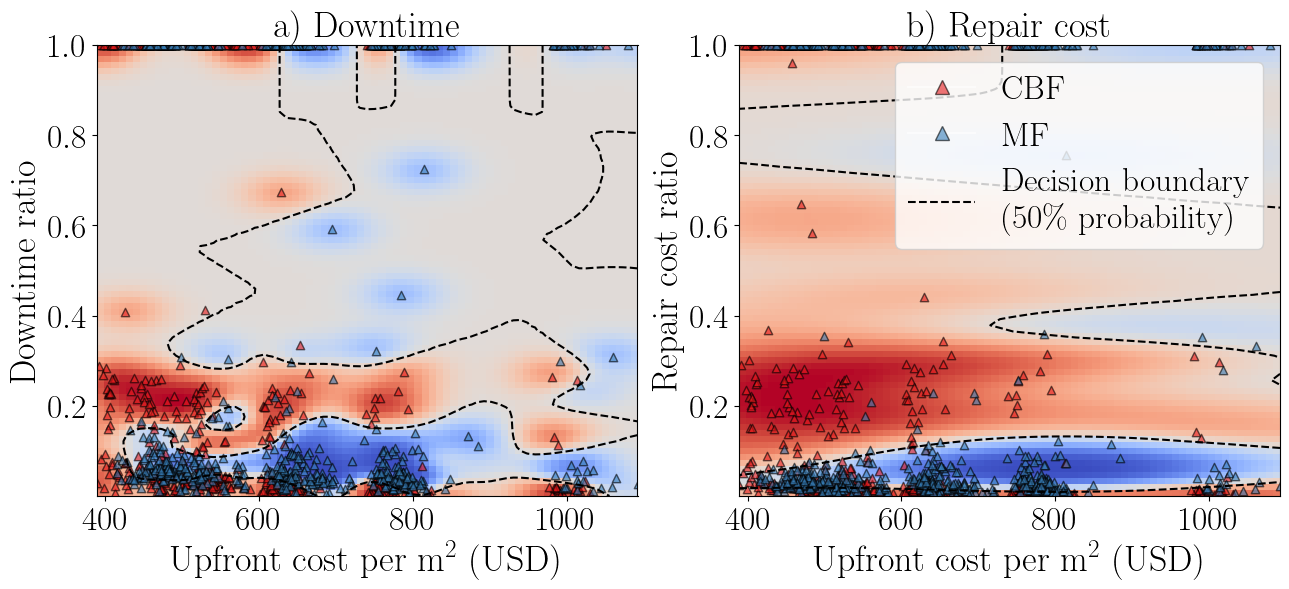

In [57]:

#%%
plt.close('all')
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 26
subt_font = 24
label_size = 24
title_font = 26
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 


kernel_name = 'rbf_ard'

fig = plt.figure(figsize=(13, 6))

color = plt.cm.Set1(np.linspace(0, 1, 10))



#################################
# # xvar = 'cmp_cost_ratio'
# # yvar = 'replacement_freq'

# yvar = 'replacement_freq'
# xvar = 'steel_cost_per_sf'

# # fit
# covariate_list_sys = [yvar, xvar]
# clf_struct = GP(df)
# clf_struct.set_covariates(covariate_list_sys)
# clf_struct.set_outcome('superstructure_system', use_ravel=False)
# clf_struct.test_train_split(0.2)
# clf_struct.fit_gpc(kernel_name=kernel_name)


# res = 75

# x_min = min(clf_struct.X[xvar])
# x_max = max(clf_struct.X[xvar])

# y_min = min(clf_struct.X[yvar])
# y_max = max(clf_struct.X[yvar])


# xx, yy = np.meshgrid(np.linspace(x_min,
#                                  x_max,
#                                  res),
#                      np.linspace(y_min,
#                                  y_max,
#                                  res))

# X_pl = pd.DataFrame({xvar:xx.ravel(),
#                      yvar:yy.ravel()})
# X_plot = X_pl[covariate_list_sys]

# # X_plot = make_2D_plotting_space(clf_struct.X, res, x_var=xvar, y_var=yvar,
# #                                 all_vars=covariate_list_sys,
# #                                 third_var_set = 0.2, fourth_var_set = 0.2)






# xx = X_plot[xvar]
# yy = X_plot[yvar]
# Z = clf_struct.gpc.predict(X_plot)

# lookup_table, Z_numbered = np.unique(Z, return_inverse=True)
# x_pl = np.unique(xx)
# y_pl = np.unique(yy)

# Z_numbered = clf_struct.gpc.predict_proba(X_plot)[:,1]
# xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)
# Z_classif = Z_numbered.reshape(xx_pl.shape)

# plt.contour(xx_pl, yy_pl, Z_classif, levels=[0.5], linestyles='dashed',
#             colors='black', linewidths=1.5)

# plt.imshow(
#         Z_classif,
#         interpolation="nearest",
#         extent=(xx.min(), xx.max(),
#                 yy.min(), yy.max()),
#         aspect="auto",
#         origin="lower",
#         cmap=plt.cm.coolwarm_r,
#     )

# ax.scatter(df_cbf[xvar], df_cbf[yvar], color=color[0],
#             edgecolors='k', alpha = 0.6, label='CBF', marker='^')
# ax.scatter(df_mf[xvar], df_mf[yvar], color=color[1],
#             edgecolors='k', alpha = 0.6, label='MF', marker='^')
# plt.legend(fontsize=axis_font)

# ax.set_title(r'a) Replacement', fontsize=title_font)
# ax.set_ylabel(r'Replacement probability', fontsize=axis_font)
# ax.set_xlabel(r'Steel cost per ft$^2$', fontsize=axis_font)

#################################


yvar = 'cmp_time_ratio'
xvar = 'upfront_cost_per_sm'

# fit
covariate_list_sys = [yvar, xvar]
clf_struct = GP(df)
clf_struct.set_covariates(covariate_list_sys)
clf_struct.set_outcome('superstructure_system', use_ravel=False)
clf_struct.test_train_split(0.2)
clf_struct.fit_gpc(kernel_name=kernel_name)


res = 75

x_min = min(clf_struct.X[xvar])
x_max = max(clf_struct.X[xvar])

y_min = min(clf_struct.X[yvar])
y_max = max(clf_struct.X[yvar])


xx, yy = np.meshgrid(np.linspace(x_min,
                                 x_max,
                                 res),
                     np.linspace(y_min,
                                 y_max,
                                 res))

X_pl = pd.DataFrame({xvar:xx.ravel(),
                     yvar:yy.ravel()})
X_plot = X_pl[covariate_list_sys]

# X_plot = make_2D_plotting_space(clf_struct.X, res, x_var=xvar, y_var=yvar,
#                                 all_vars=covariate_list_sys,
#                                 third_var_set = 0.2, fourth_var_set = 0.2)



ax=fig.add_subplot(1, 2, 1)



xx = X_plot[xvar]
yy = X_plot[yvar]
Z = clf_struct.gpc.predict(X_plot)

lookup_table, Z_numbered = np.unique(Z, return_inverse=True)
x_pl = np.unique(xx)
y_pl = np.unique(yy)

Z_numbered = clf_struct.gpc.predict_proba(X_plot)[:,1]
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)
Z_classif = Z_numbered.reshape(xx_pl.shape)

plt.contour(xx_pl, yy_pl, Z_classif, levels=[0.5], linestyles='dashed',
            colors='black', linewidths=1.5)

plt.imshow(
        Z_classif,
        interpolation="nearest",
        extent=(xx.min(), xx.max(),
                yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.coolwarm_r,
    )

ax.scatter(df_cbf[xvar], df_cbf[yvar], color=color[0],
            edgecolors='k', alpha = 0.6, label='CBF', marker='^')
ax.scatter(df_mf[xvar], df_mf[yvar], color=color[1],
            edgecolors='k', alpha = 0.6, label='MF', marker='^')

# ax.scatter(df_cbf_i[xvar], df_cbf_i[yvar], color=color[0],
#             edgecolors='k', alpha = 0.6, label='CBF', marker='^')
# ax.scatter(df_mf_i[xvar], df_mf_i[yvar], color=color[1],
#             edgecolors='k', alpha = 0.6, label='MF', marker='^')

# ax.scatter(df_cbf_o[xvar], df_cbf_o[yvar], color=color[0],
#             edgecolors='k', alpha = 0.6, label='CBF', marker='o')
# ax.scatter(df_mf_o[xvar], df_mf_o[yvar], color=color[1],
#             edgecolors='k', alpha = 0.6, label='MF', marker='o')
# plt.legend(fontsize=axis_font)

ax.set_title(r'a) Downtime', fontsize=title_font)
ax.set_xlabel(r'Upfront cost per m$^2$ (USD)', fontsize=axis_font)
ax.set_ylabel(r'Downtime ratio', fontsize=axis_font)


#################################
yvar = 'cmp_cost_ratio'
xvar = 'upfront_cost_per_sm'


# fit
covariate_list_sys = [yvar, xvar]
clf_struct = GP(df)
clf_struct.set_covariates(covariate_list_sys)
clf_struct.set_outcome('superstructure_system', use_ravel=False)
clf_struct.test_train_split(0.2)
clf_struct.fit_gpc(kernel_name=kernel_name)


res = 75

x_min = min(clf_struct.X[xvar])
x_max = max(clf_struct.X[xvar])

y_min = min(clf_struct.X[yvar])
y_max = max(clf_struct.X[yvar])


xx, yy = np.meshgrid(np.linspace(x_min,
                                 x_max,
                                 res),
                     np.linspace(y_min,
                                 y_max,
                                 res))

X_pl = pd.DataFrame({xvar:xx.ravel(),
                     yvar:yy.ravel()})
X_plot = X_pl[covariate_list_sys]

# X_plot = make_2D_plotting_space(clf_struct.X, res, x_var=xvar, y_var=yvar,
#                                 all_vars=covariate_list_sys,
#                                 third_var_set = 0.2, fourth_var_set = 0.2)



ax=fig.add_subplot(1, 2, 2)



xx = X_plot[xvar]
yy = X_plot[yvar]
Z = clf_struct.gpc.predict(X_plot)

lookup_table, Z_numbered = np.unique(Z, return_inverse=True)
x_pl = np.unique(xx)
y_pl = np.unique(yy)

Z_numbered = clf_struct.gpc.predict_proba(X_plot)[:,1]
xx_pl, yy_pl = np.meshgrid(x_pl, y_pl)
Z_classif = Z_numbered.reshape(xx_pl.shape)

plt.contour(xx_pl, yy_pl, Z_classif, levels=[0.5], linestyles='dashed',
            colors='black', linewidths=1.5)

plt.imshow(
        Z_classif,
        interpolation="nearest",
        extent=(xx.min(), xx.max(),
                yy.min(), yy.max()),
        aspect="auto",
        origin="lower",
        cmap=plt.cm.coolwarm_r,
    )


ax.scatter(df_cbf[xvar], df_cbf[yvar], color=color[0],
            edgecolors='k', alpha = 0.6, label='CBF', marker='^')
ax.scatter(df_mf[xvar], df_mf[yvar], color=color[1],
            edgecolors='k', alpha = 0.6, label='MF', marker='^')

# ax.scatter(df_cbf_i[xvar], df_cbf_i[yvar], color=color[0],
#             edgecolors='k', alpha = 0.6, label='CBF', marker='^')
# ax.scatter(df_mf_i[xvar], df_mf_i[yvar], color=color[1],
#             edgecolors='k', alpha = 0.6, label='MF', marker='^')

# ax.scatter(df_cbf_o[xvar], df_cbf_o[yvar], color=color[0],
#             edgecolors='k', alpha = 0.6, label='CBF', marker='o')
# ax.scatter(df_mf_o[xvar], df_mf_o[yvar], color=color[1],
#             edgecolors='k', alpha = 0.6, label='MF', marker='o')

# plt.legend(fontsize=axis_font)

ax.set_title(r'b) Repair cost', fontsize=title_font)
ax.set_xlabel(r'Upfront cost per m$^2$ (USD)', fontsize=axis_font)
ax.set_ylabel(r'Repair cost ratio', fontsize=axis_font)

from matplotlib.lines import Line2D
custom_lines = [Line2D([-1], [-1], color='white', marker='^', markeredgecolor='k',
                       alpha=0.6, markerfacecolor=color[0], markersize=10),
                Line2D([-1], [-1], color='white', marker='^', markeredgecolor='k',
                                       alpha=0.6, markerfacecolor=color[1], markersize=10),
                Line2D([-1], [-1], color='black', linestyle='--' ),
                ]

ax.legend(custom_lines, ['CBF','MF','Decision boundary\n (50\% probability)'], 
           fontsize=subt_font)

fig.tight_layout()

plt.savefig('./eng_struc_figures/spectracomments/fig_17_system_selection_upfront_spectracomments.pdf')

# plt.close('all')
'''
#%%

def scatter_hist(x, y, c, alpha, ax, ax_histx, ax_histy, label=None):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)
    # ax_histx.grid(True)
    # ax_histy.grid(True)
    
    # the scatter plot:
    ax.grid(True, alpha=0.5)
    ax.scatter(x, y, alpha=alpha, edgecolors='black', s=25, facecolors=c,
                label=label)

    n_bins = 10
    ax_histx.hist(x, bins=n_bins, alpha = alpha, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='black', linewidth=0.5)
    
    ax_histy.hist(y, bins=n_bins, orientation='horizontal', alpha = alpha, weights=np.ones(len(x)) / len(x),
                  facecolor = c, edgecolor='black', linewidth=0.5)
  
    
xvar = 'steel_cost_per_sf'
yvar = 'S_1'

df_a1 = df_mf[df_mf['S_1'] > 1.1]
df_a2 = df_cbf[df_cbf['S_1'] > 1.1]

# TODO: simpler scatter
plt.rcParams["font.family"] = "serif"
plt.rcParams["mathtext.fontset"] = "dejavuserif"
axis_font = 24
subt_font = 22
import matplotlib as mpl
label_size = 20
mpl.rcParams['xtick.labelsize'] = label_size 
mpl.rcParams['ytick.labelsize'] = label_size 

plt.close('all')
# Start with a square Figure.
fig = plt.figure(figsize=(13, 6), layout='constrained')

# Add a gridspec with two rows and two columns and a ratio of 1 to 4 between
# the size of the marginal axes and the main axes in both directions.
# Also adjust the subplot parameters for a square plot.
gs = fig.add_gridspec(2, 4,  width_ratios=(5, 1, 5, 1), height_ratios=(1, 5),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0., hspace=0.)
# # Create the Axes.
# fig = plt.figure(figsize=(13, 10))
# ax1=fig.add_subplot(2, 2, 1)

ax = fig.add_subplot(gs[1, 0])
ax_histx = fig.add_subplot(gs[0, 0], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 1], sharey=ax)

# Draw the scatter plot and marginals.
scatter_hist(df_mf_tfp[xvar], df_mf_tfp[yvar], 'lightskyblue', 0.8, ax, ax_histx, ax_histy,
             label='TFP')
scatter_hist(df_mf_lrb[xvar], df_mf_lrb[yvar], 'darkred', 0.4, ax, ax_histx, ax_histy,
             label='LRB')
# ax.legend(fontsize=axis_font)

ax.set_title(r'MF', fontsize=title_font)

ax.set_xlabel(xvar, fontsize=axis_font)
ax.set_ylabel(yvar, fontsize=axis_font)
ax.set_xlim([df[xvar].min(), df[xvar].max()])
ax.set_ylim([df[yvar].min(), df[yvar].max()])

ax = fig.add_subplot(gs[1, 2])
ax_histx = fig.add_subplot(gs[0, 2], sharex=ax)
ax_histy = fig.add_subplot(gs[1, 3], sharey=ax)

# Draw the scatter plot and marginals.

scatter_hist(df_cbf_tfp[xvar], df_cbf_tfp[yvar], 'lightskyblue', 0.8, ax, ax_histx, ax_histy,
              label='TFP')
scatter_hist(df_cbf_lrb[xvar], df_cbf_lrb[yvar], 'darkred', 0.4, ax, ax_histx, ax_histy,
              label='LRB')

ax.set_xlim([df[xvar].min(), df[xvar].max()])
ax.set_ylim([df[yvar].min(), df[yvar].max()])

ax.set_title(r'CBF', fontsize=title_font)
ax.set_xlabel(xvar, fontsize=axis_font)

ax.legend(fontsize=axis_font)
'''